# Heart Disease Prediction - Classfication

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Heart Disease Data.csv")
data=df.copy()
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [5]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


# EXPLORATORY DATA ANALYSIS

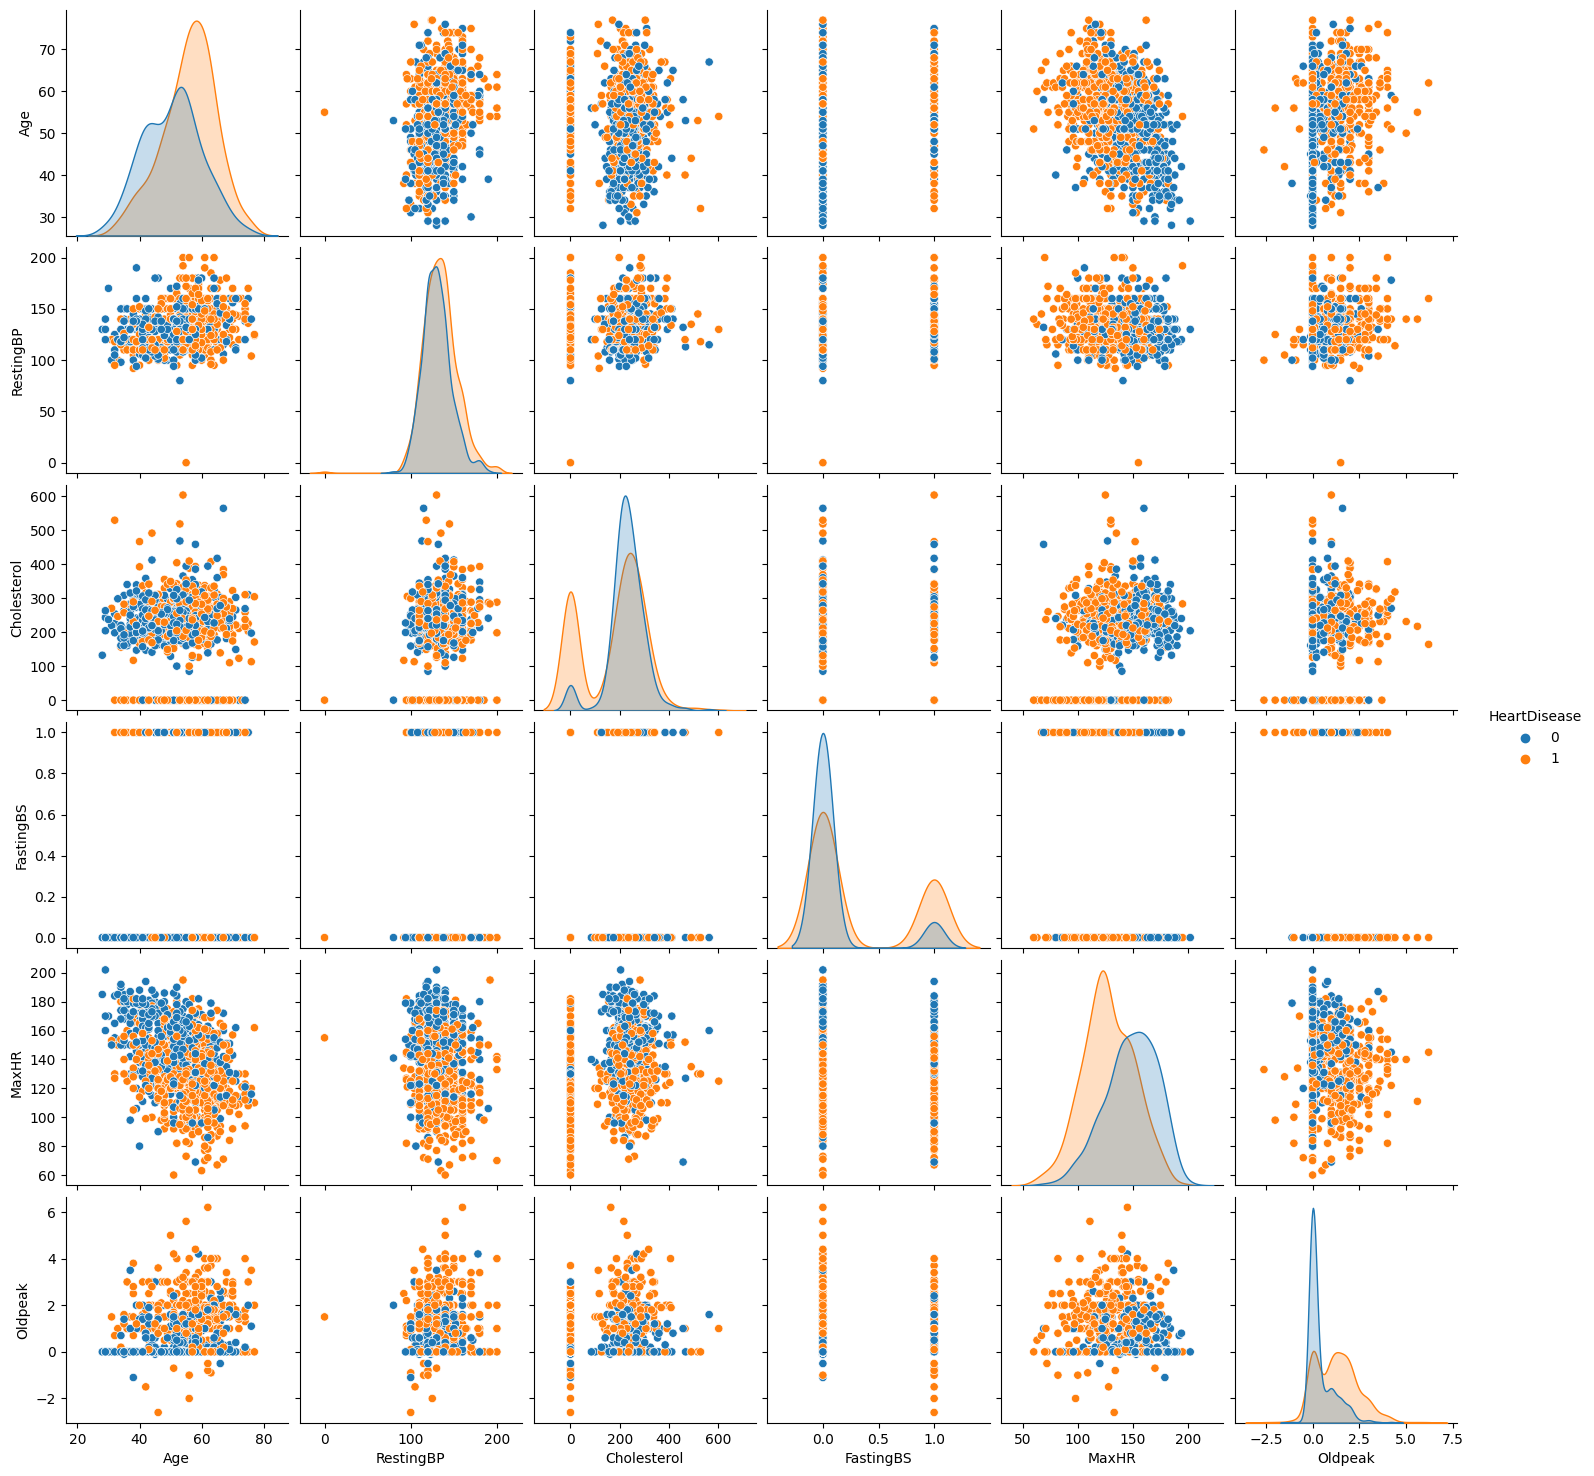

In [6]:
sns.pairplot(df, hue="HeartDisease")

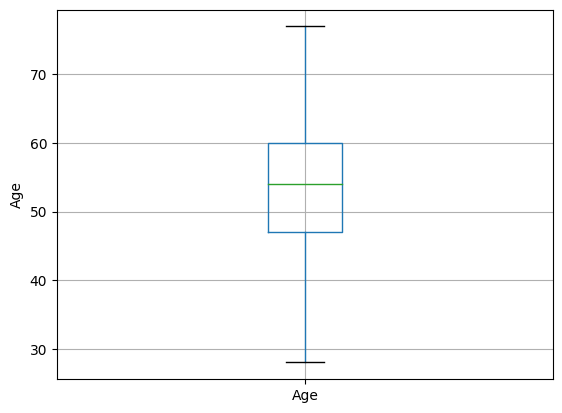

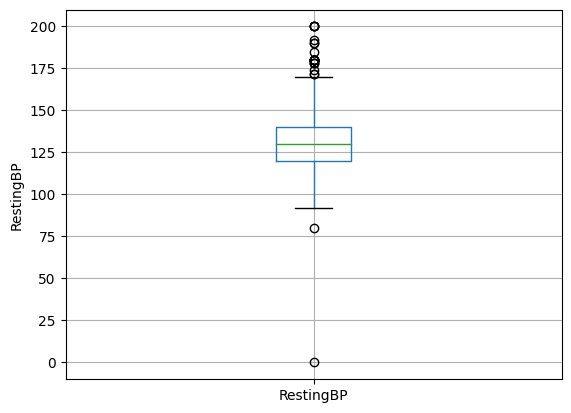

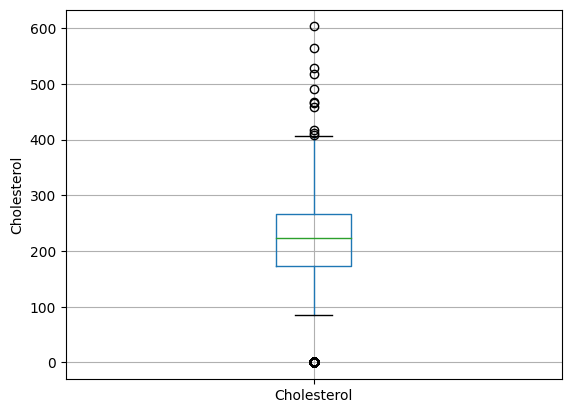

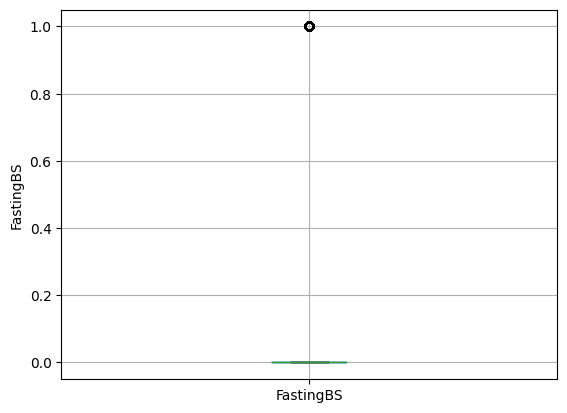

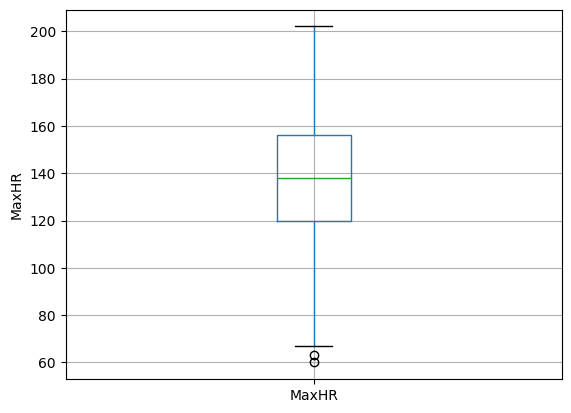

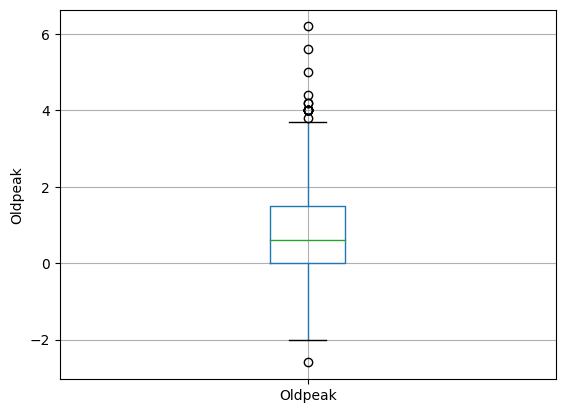

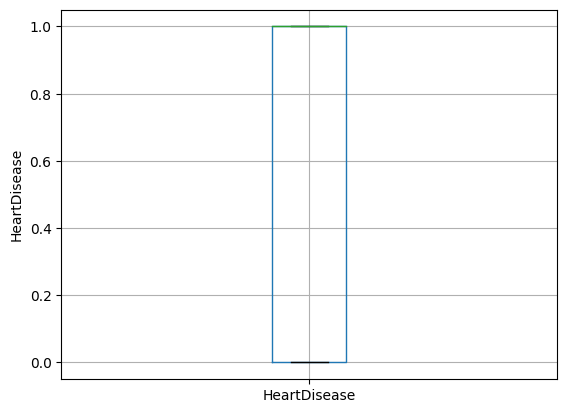

In [7]:
for i in df.select_dtypes(include="number"):
    df.select_dtypes(include="number").boxplot(column=i)
    plt.ylabel(i)
    plt.show()

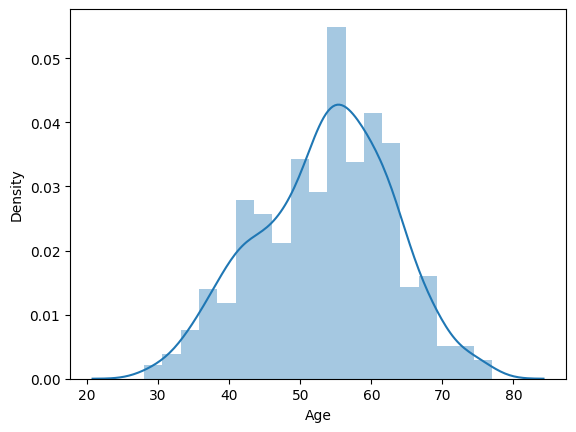

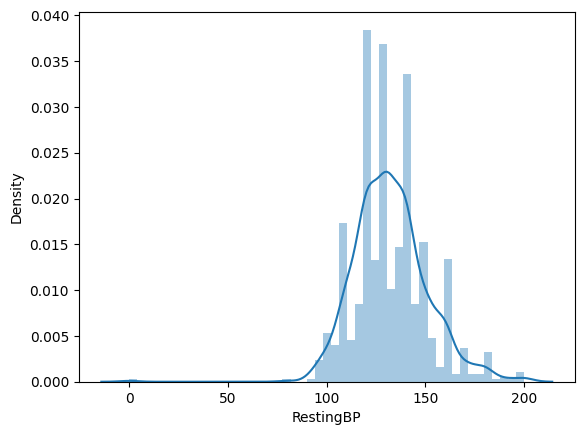

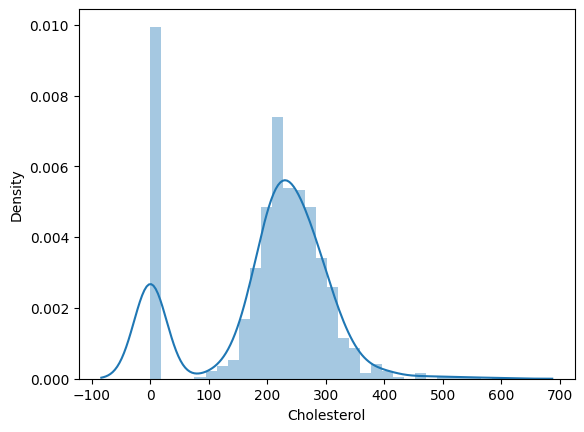

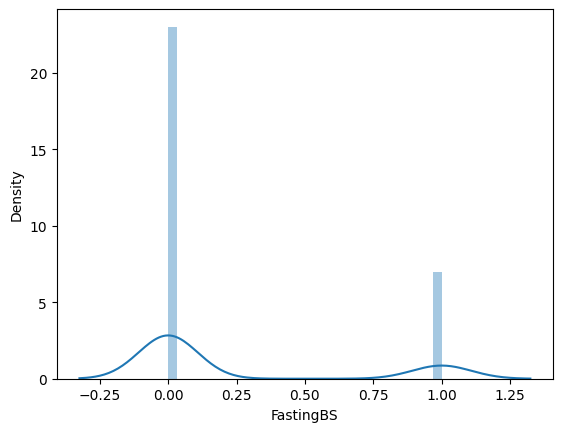

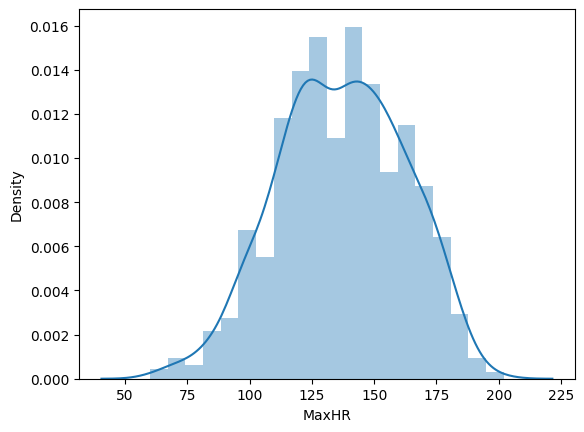

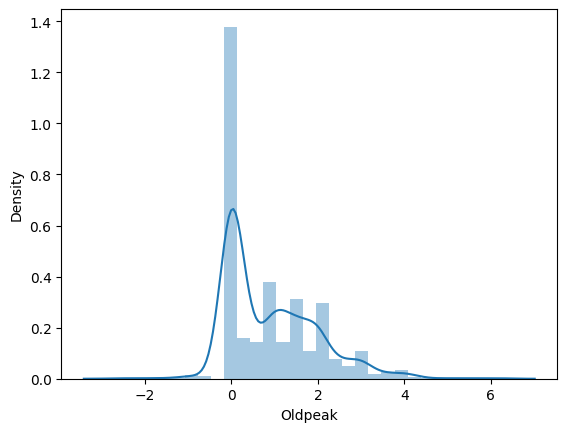

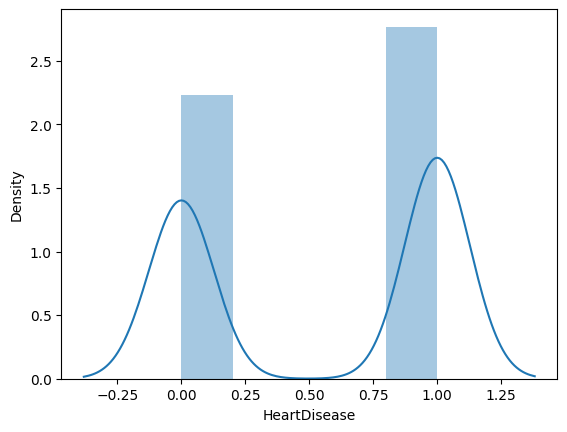

In [8]:
for i in df.select_dtypes(include="number"):
    sns.distplot(df, x=df[i], kde=True)
    plt.xlabel(i)
    plt.show()

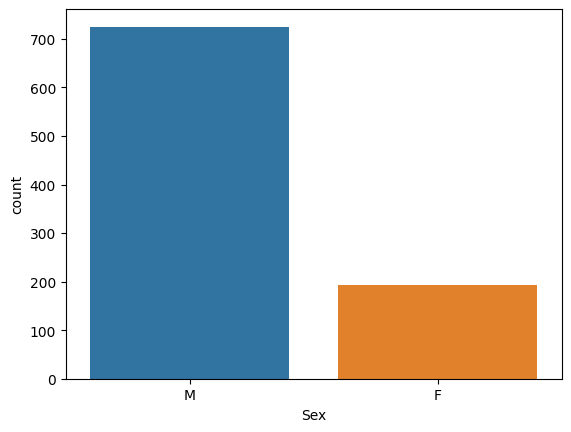

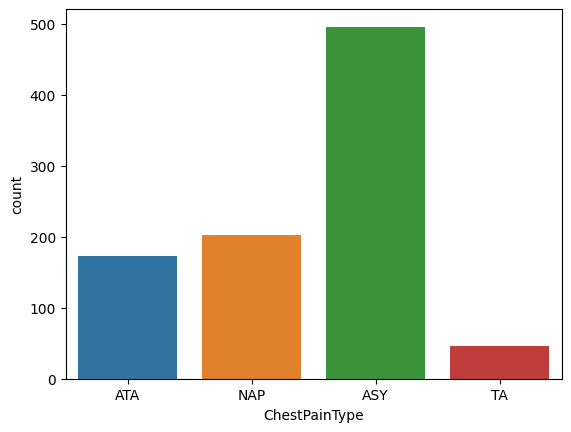

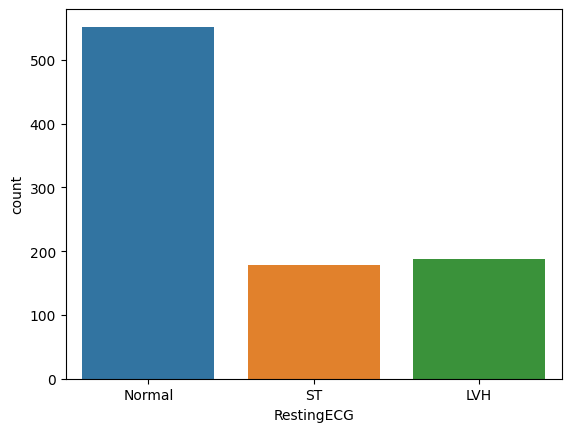

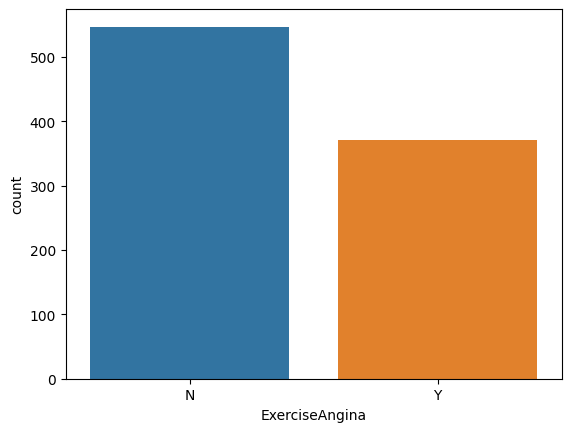

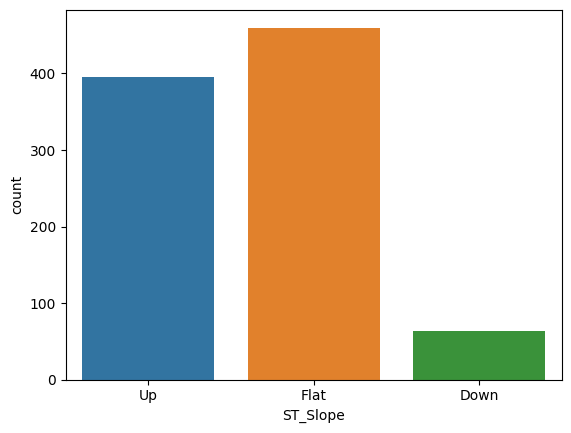

In [9]:
for i in df.select_dtypes(include="object"):
    sns.countplot(df, x=df[i])
    plt.show()

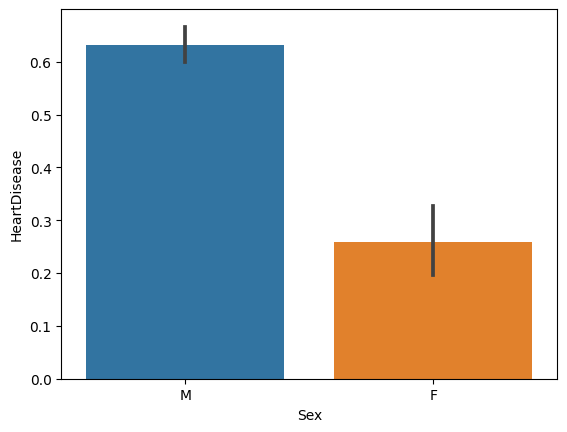

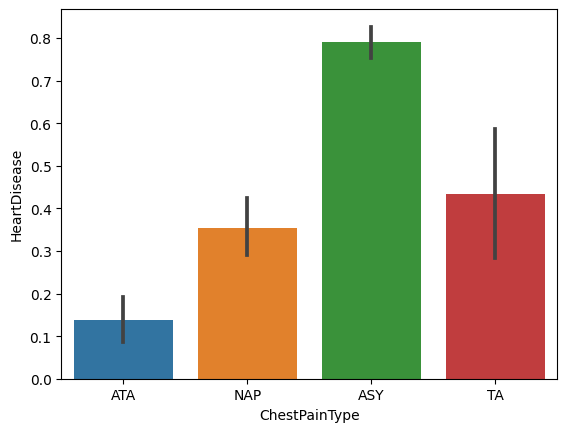

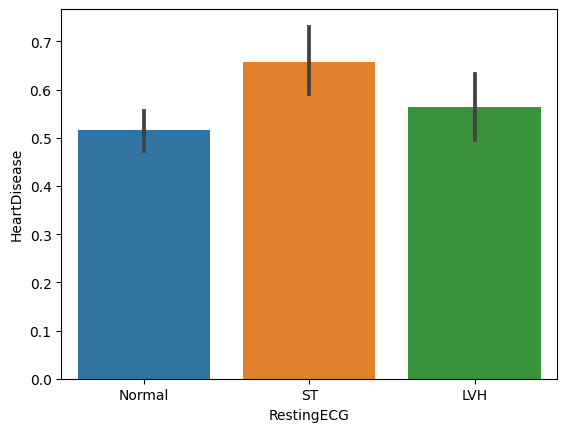

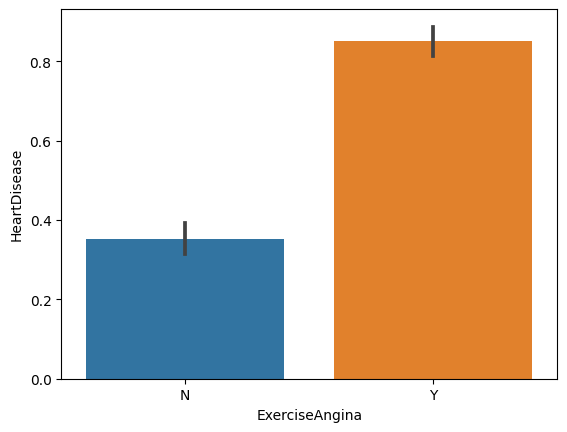

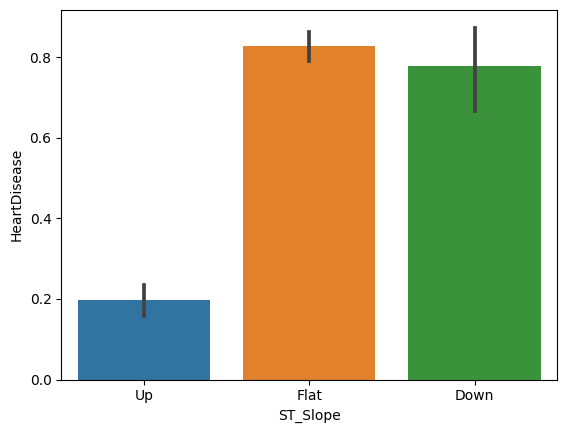

In [10]:
for i in df.select_dtypes(include="object"):
    sns.barplot(df, x=df[i], y=df["HeartDisease"])
    plt.show()

1    508
0    410
Name: HeartDisease, dtype: int64


<AxesSubplot: xlabel='HeartDisease', ylabel='count'>

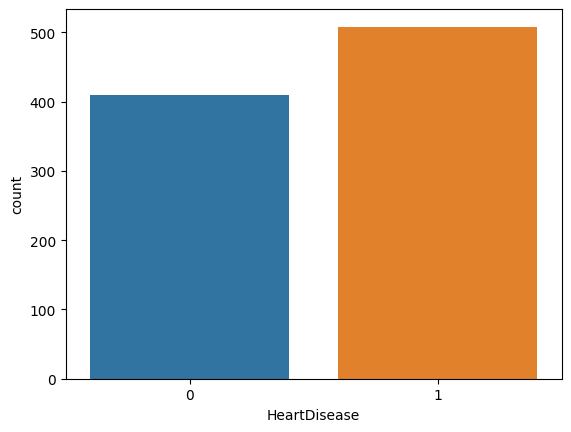

In [11]:
print(df["HeartDisease"].value_counts())
sns.countplot(df, x=df["HeartDisease"])

In [12]:
print("Before removing duplicate rows:", df.shape)
df.drop_duplicates(keep="first",inplace=True)
print("After removing duplicate rows:", df.shape)

Before removing duplicate rows: (918, 12)
After removing duplicate rows: (918, 12)


# Base model selection & training 

In [13]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from category_encoders import LeaveOneOutEncoder, CatBoostEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import *

In [14]:
x=df.drop("HeartDisease", axis=1)
y=df["HeartDisease"]

In [15]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.25, random_state=9, stratify=y)

In [16]:
train_x.shape

(688, 11)

In [17]:
test_x.shape

(230, 11)

In [18]:
train_x.reset_index(drop=True, inplace=True)
test_x.reset_index(drop=True, inplace=True)
train_y.reset_index(drop=True, inplace=True)
test_y.reset_index(drop=True, inplace=True)

In [19]:
train_cat = train_x.select_dtypes(include="object")
train_num = train_x.select_dtypes(include="number")
test_cat = test_x.select_dtypes(include="object")
test_num = test_x.select_dtypes(include="number")

In [20]:
one = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
one.fit(train_cat)
train_cat = pd.DataFrame(one.transform(train_cat), columns=one.get_feature_names_out())
test_cat = pd.DataFrame(one.transform(test_cat), columns=one.get_feature_names_out())

In [21]:
train_cat

,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
684,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
685,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
686,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [22]:
train_x1 = pd.concat([train_num, train_cat], axis=1)
test_x1 = pd.concat([test_num, test_cat], axis=1)

In [23]:
train_x1

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,38,110,190,0,150,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,56,170,388,0,122,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,46,150,231,0,147,3.6,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,60,130,186,1,140,0.5,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,54,110,208,0,142,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,58,150,219,0,118,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
684,46,100,0,1,133,-2.6,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
685,45,140,224,0,144,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
686,69,142,210,1,112,1.5,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [24]:
sta = StandardScaler()
sta.fit(train_x1)
train_x1 = pd.DataFrame(sta.transform(train_x1), columns=train_x1.columns)
test_x1 = pd.DataFrame(sta.transform(test_x1), columns=test_x1.columns)

In [25]:
train_x1

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,-1.604532,-1.195796,-0.065500,-0.552723,0.471600,0.117345,-0.505445,0.505445,0.960098,-0.500908,-0.539265,-0.238402,-0.512236,0.816002,-0.487247,-1.207122,1.207122,-0.270782,0.994203,-0.866393
1,0.275900,1.989290,1.755088,-0.552723,-0.640792,1.063809,-0.505445,0.505445,0.960098,-0.500908,-0.539265,-0.238402,-0.512236,-1.225487,2.052345,-1.207122,1.207122,-0.270782,0.994203,-0.866393
2,-0.768784,0.927594,0.311490,-0.552723,0.352415,2.578150,-0.505445,0.505445,-1.041561,-0.500908,1.854376,-0.238402,-0.512236,0.816002,-0.487247,0.828417,-0.828417,-0.270782,0.994203,-0.866393
3,0.693774,-0.134101,-0.102280,1.809224,0.074317,-0.355887,-0.505445,0.505445,0.960098,-0.500908,-0.539265,-0.238402,1.952227,-1.225487,-0.487247,-1.207122,1.207122,-0.270782,0.994203,-0.866393
4,0.066963,-1.195796,0.100008,-0.552723,0.153774,-0.829119,-0.505445,0.505445,-1.041561,1.996374,-0.539265,-0.238402,-0.512236,0.816002,-0.487247,0.828417,-0.828417,-0.270782,-1.005831,1.154211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,0.484837,0.927594,0.201152,-0.552723,-0.799705,-0.829119,-0.505445,0.505445,-1.041561,-0.500908,1.854376,-0.238402,-0.512236,-1.225487,2.052345,-1.207122,1.207122,-0.270782,0.994203,-0.866393
684,-0.768784,-1.726643,-1.812529,1.809224,-0.203781,-3.289924,-0.505445,0.505445,0.960098,-0.500908,-0.539265,-0.238402,-0.512236,-1.225487,2.052345,0.828417,-0.828417,-0.270782,0.994203,-0.866393
685,-0.873253,0.396747,0.247126,-0.552723,0.233231,-0.829119,-0.505445,0.505445,0.960098,-0.500908,-0.539265,-0.238402,-0.512236,0.816002,-0.487247,0.828417,-0.828417,-0.270782,-1.005831,1.154211
686,1.633989,0.502916,0.118398,1.809224,-1.038075,0.590577,-0.505445,0.505445,0.960098,-0.500908,-0.539265,-0.238402,-0.512236,-1.225487,2.052345,-1.207122,1.207122,-0.270782,0.994203,-0.866393


In [26]:
logr = LogisticRegression()
logr.fit(train_x1, train_y)
pred = logr.predict(test_x1)

print("Train score:", logr.score(train_x1, train_y))
print("Test score:", logr.score(test_x1, test_y))
print("")
print("Accuracy:", accuracy_score(pred, test_y))
print("Precision:", precision_score(pred, test_y))
print("Recall:", recall_score(pred, test_y))
print("F1 score:", f1_score(pred, test_y))
print("")
print("Confusion matrix:")
print(confusion_matrix(pred, test_y))
print("")
print(classification_report(pred, test_y))

Train score: 0.872093023255814
Test score: 0.8739130434782608

Accuracy: 0.8739130434782608
Precision: 0.937007874015748
Recall: 0.85
F1 score: 0.8913857677902622

Confusion matrix:
[[ 82   8]
 [ 21 119]]

              precision    recall  f1-score   support

           0       0.80      0.91      0.85        90
           1       0.94      0.85      0.89       140

    accuracy                           0.87       230
   macro avg       0.87      0.88      0.87       230
weighted avg       0.88      0.87      0.88       230



In [27]:
decc = DecisionTreeClassifier()
decc.fit(train_x1, train_y)
pred = decc.predict(test_x1)

print("Train score:",decc.score(train_x1, train_y))
print("Test score:", decc.score(test_x1, test_y))
print("")
print("Accuracy:", accuracy_score(pred, test_y))
print("Precision:", precision_score(pred, test_y))
print("Recall:", recall_score(pred, test_y))
print("F1 score:", f1_score(pred, test_y))
print("")
print("Confusion matrix:")
print(confusion_matrix(pred, test_y))

Train score: 1.0
Test score: 0.8434782608695652

Accuracy: 0.8434782608695652
Precision: 0.8740157480314961
Recall: 0.8473282442748091
F1 score: 0.8604651162790697

Confusion matrix:
[[ 83  16]
 [ 20 111]]


In [28]:
rafc = RandomForestClassifier()
rafc.fit(train_x1, train_y)
pred = rafc.predict(test_x1)

print("Train score:",rafc.score(train_x1, train_y))
print("Test score:", rafc.score(test_x1, test_y))
print("")
print("Accuracy:", accuracy_score(pred, test_y))
print("Precision:", precision_score(pred, test_y))
print("Recall:", recall_score(pred, test_y))
print("F1 score:", f1_score(pred, test_y))
print("")
print("Confusion matrix:")
print(confusion_matrix(pred, test_y))

Train score: 1.0
Test score: 0.8956521739130435

Accuracy: 0.8956521739130435
Precision: 0.9448818897637795
Recall: 0.8759124087591241
F1 score: 0.9090909090909092

Confusion matrix:
[[ 86   7]
 [ 17 120]]


In [29]:
knnc = KNeighborsClassifier()
knnc.fit(train_x1, train_y)
pred = knnc.predict(test_x1)

print("Train score:",knnc.score(train_x1, train_y))
print("Test score:", knnc.score(test_x1, test_y))
print("")
print("Accuracy:", accuracy_score(pred, test_y))
print("Precision:", precision_score(pred, test_y))
print("Recall:", recall_score(pred, test_y))
print("F1 score:", f1_score(pred, test_y))
print("")
print("Confusion matrix:")
print(confusion_matrix(pred, test_y))

Train score: 0.8851744186046512
Test score: 0.8826086956521739

Accuracy: 0.8826086956521739
Precision: 0.9212598425196851
Recall: 0.8731343283582089
F1 score: 0.896551724137931

Confusion matrix:
[[ 86  10]
 [ 17 117]]


In [30]:
xgbc = XGBClassifier()
xgbc.fit(train_x1, train_y)
pred = xgbc.predict(test_x1)

print("Train score:",xgbc.score(train_x1, train_y))
print("Test score:", xgbc.score(test_x1, test_y))
print("")
print("Accuracy:", accuracy_score(pred, test_y))
print("Precision:", precision_score(pred, test_y))
print("Recall:", recall_score(pred, test_y))
print("F1 score:", f1_score(pred, test_y))
print("")
print("Confusion matrix:")
print(confusion_matrix(pred, test_y))

Train score: 1.0
Test score: 0.8782608695652174

Accuracy: 0.8782608695652174
Precision: 0.9212598425196851
Recall: 0.8666666666666667
F1 score: 0.8931297709923663

Confusion matrix:
[[ 85  10]
 [ 18 117]]


In [31]:
catc = CatBoostClassifier()
catc.fit(train_x1, train_y)
pred = catc.predict(test_x1)

print("Train score:",catc.score(train_x1, train_y))
print("Test score:", catc.score(test_x1, test_y))
print("")
print("Accuracy:", accuracy_score(pred, test_y))
print("Precision:", precision_score(pred, test_y))
print("Recall:", recall_score(pred, test_y))
print("F1 score:", f1_score(pred, test_y))
print("")
print("Confusion matrix:")
print(confusion_matrix(pred, test_y))

Learning rate set to 0.008782
0:	learn: 0.6851643	total: 417ms	remaining: 6m 56s
1:	learn: 0.6798065	total: 436ms	remaining: 3m 37s
2:	learn: 0.6726790	total: 452ms	remaining: 2m 30s
3:	learn: 0.6657634	total: 464ms	remaining: 1m 55s
4:	learn: 0.6601270	total: 474ms	remaining: 1m 34s
5:	learn: 0.6535271	total: 499ms	remaining: 1m 22s
6:	learn: 0.6462792	total: 517ms	remaining: 1m 13s
7:	learn: 0.6392155	total: 533ms	remaining: 1m 6s
8:	learn: 0.6326496	total: 548ms	remaining: 1m
9:	learn: 0.6270960	total: 561ms	remaining: 55.5s
10:	learn: 0.6200640	total: 580ms	remaining: 52.2s
11:	learn: 0.6146136	total: 594ms	remaining: 48.9s
12:	learn: 0.6088871	total: 615ms	remaining: 46.7s
13:	learn: 0.6020106	total: 628ms	remaining: 44.2s
14:	learn: 0.5972772	total: 643ms	remaining: 42.2s
15:	learn: 0.5914252	total: 662ms	remaining: 40.7s
16:	learn: 0.5856046	total: 675ms	remaining: 39.1s
17:	learn: 0.5802556	total: 688ms	remaining: 37.5s
18:	learn: 0.5746648	total: 700ms	remaining: 36.2s
19:	lea

162:	learn: 0.2959119	total: 2.67s	remaining: 13.7s
163:	learn: 0.2952317	total: 2.69s	remaining: 13.7s
164:	learn: 0.2945223	total: 2.7s	remaining: 13.6s
165:	learn: 0.2937383	total: 2.71s	remaining: 13.6s
166:	learn: 0.2928932	total: 2.72s	remaining: 13.6s
167:	learn: 0.2921780	total: 2.73s	remaining: 13.5s
168:	learn: 0.2915307	total: 2.74s	remaining: 13.5s
169:	learn: 0.2907852	total: 2.75s	remaining: 13.4s
170:	learn: 0.2901729	total: 2.76s	remaining: 13.4s
171:	learn: 0.2896265	total: 2.77s	remaining: 13.3s
172:	learn: 0.2891165	total: 2.78s	remaining: 13.3s
173:	learn: 0.2885789	total: 2.79s	remaining: 13.2s
174:	learn: 0.2881222	total: 2.8s	remaining: 13.2s
175:	learn: 0.2876603	total: 2.81s	remaining: 13.2s
176:	learn: 0.2868824	total: 2.82s	remaining: 13.1s
177:	learn: 0.2863949	total: 2.83s	remaining: 13.1s
178:	learn: 0.2861426	total: 2.84s	remaining: 13s
179:	learn: 0.2852462	total: 2.85s	remaining: 13s
180:	learn: 0.2848041	total: 2.86s	remaining: 12.9s
181:	learn: 0.2841

331:	learn: 0.2244100	total: 4.74s	remaining: 9.54s
332:	learn: 0.2242177	total: 4.75s	remaining: 9.52s
333:	learn: 0.2239579	total: 4.76s	remaining: 9.49s
334:	learn: 0.2235162	total: 4.77s	remaining: 9.47s
335:	learn: 0.2231303	total: 4.78s	remaining: 9.44s
336:	learn: 0.2229795	total: 4.79s	remaining: 9.42s
337:	learn: 0.2227450	total: 4.79s	remaining: 9.39s
338:	learn: 0.2224905	total: 4.81s	remaining: 9.37s
339:	learn: 0.2222432	total: 4.82s	remaining: 9.35s
340:	learn: 0.2219712	total: 4.83s	remaining: 9.33s
341:	learn: 0.2215907	total: 4.84s	remaining: 9.31s
342:	learn: 0.2213929	total: 4.85s	remaining: 9.29s
343:	learn: 0.2210894	total: 4.86s	remaining: 9.27s
344:	learn: 0.2204526	total: 4.87s	remaining: 9.25s
345:	learn: 0.2201914	total: 4.88s	remaining: 9.23s
346:	learn: 0.2197614	total: 4.89s	remaining: 9.21s
347:	learn: 0.2195614	total: 4.9s	remaining: 9.19s
348:	learn: 0.2193454	total: 4.91s	remaining: 9.17s
349:	learn: 0.2191821	total: 4.92s	remaining: 9.14s
350:	learn: 0

511:	learn: 0.1829612	total: 6.41s	remaining: 6.11s
512:	learn: 0.1827312	total: 6.42s	remaining: 6.09s
513:	learn: 0.1825946	total: 6.43s	remaining: 6.08s
514:	learn: 0.1823769	total: 6.43s	remaining: 6.06s
515:	learn: 0.1821774	total: 6.44s	remaining: 6.04s
516:	learn: 0.1820843	total: 6.45s	remaining: 6.03s
517:	learn: 0.1820417	total: 6.46s	remaining: 6.01s
518:	learn: 0.1817049	total: 6.47s	remaining: 5.99s
519:	learn: 0.1814825	total: 6.48s	remaining: 5.98s
520:	learn: 0.1814164	total: 6.48s	remaining: 5.96s
521:	learn: 0.1813363	total: 6.49s	remaining: 5.95s
522:	learn: 0.1812403	total: 6.5s	remaining: 5.93s
523:	learn: 0.1810749	total: 6.51s	remaining: 5.91s
524:	learn: 0.1810470	total: 6.51s	remaining: 5.89s
525:	learn: 0.1808470	total: 6.52s	remaining: 5.88s
526:	learn: 0.1805429	total: 6.53s	remaining: 5.86s
527:	learn: 0.1803452	total: 6.54s	remaining: 5.85s
528:	learn: 0.1803007	total: 6.54s	remaining: 5.83s
529:	learn: 0.1800896	total: 6.55s	remaining: 5.81s
530:	learn: 0

681:	learn: 0.1522972	total: 7.62s	remaining: 3.55s
682:	learn: 0.1521109	total: 7.63s	remaining: 3.54s
683:	learn: 0.1520039	total: 7.63s	remaining: 3.52s
684:	learn: 0.1518027	total: 7.64s	remaining: 3.51s
685:	learn: 0.1515293	total: 7.64s	remaining: 3.5s
686:	learn: 0.1513262	total: 7.65s	remaining: 3.48s
687:	learn: 0.1512134	total: 7.65s	remaining: 3.47s
688:	learn: 0.1510576	total: 7.66s	remaining: 3.46s
689:	learn: 0.1509119	total: 7.67s	remaining: 3.44s
690:	learn: 0.1507984	total: 7.67s	remaining: 3.43s
691:	learn: 0.1506508	total: 7.68s	remaining: 3.42s
692:	learn: 0.1505608	total: 7.69s	remaining: 3.4s
693:	learn: 0.1503525	total: 7.69s	remaining: 3.39s
694:	learn: 0.1502436	total: 7.7s	remaining: 3.38s
695:	learn: 0.1501627	total: 7.71s	remaining: 3.37s
696:	learn: 0.1500314	total: 7.72s	remaining: 3.35s
697:	learn: 0.1498910	total: 7.72s	remaining: 3.34s
698:	learn: 0.1497647	total: 7.73s	remaining: 3.33s
699:	learn: 0.1495544	total: 7.74s	remaining: 3.31s
700:	learn: 0.1

877:	learn: 0.1247579	total: 8.81s	remaining: 1.22s
878:	learn: 0.1246801	total: 8.82s	remaining: 1.21s
879:	learn: 0.1245432	total: 8.82s	remaining: 1.2s
880:	learn: 0.1244482	total: 8.83s	remaining: 1.19s
881:	learn: 0.1244265	total: 8.83s	remaining: 1.18s
882:	learn: 0.1243034	total: 8.84s	remaining: 1.17s
883:	learn: 0.1242233	total: 8.84s	remaining: 1.16s
884:	learn: 0.1241097	total: 8.85s	remaining: 1.15s
885:	learn: 0.1240458	total: 8.85s	remaining: 1.14s
886:	learn: 0.1239967	total: 8.86s	remaining: 1.13s
887:	learn: 0.1239340	total: 8.86s	remaining: 1.12s
888:	learn: 0.1238268	total: 8.87s	remaining: 1.11s
889:	learn: 0.1236785	total: 8.87s	remaining: 1.1s
890:	learn: 0.1235210	total: 8.88s	remaining: 1.09s
891:	learn: 0.1234468	total: 8.88s	remaining: 1.07s
892:	learn: 0.1233372	total: 8.89s	remaining: 1.06s
893:	learn: 0.1232021	total: 8.9s	remaining: 1.05s
894:	learn: 0.1230682	total: 8.9s	remaining: 1.04s
895:	learn: 0.1228470	total: 8.91s	remaining: 1.03s
896:	learn: 0.12

For metrics i'm going to select Recall. 

Recall = Tp/(Tp+Fn).

Our aim to reduce False Negative.

For example if person has the Heart Disease but it predict that "Person doesn't have Heart Disease" and we don't want that.

That's why to reduce false negative we select our metrics as "Recall".

# Hyperparameter Tuning using GridSearchCV

In [32]:
logr_par = { "tol" : [0.6,0.7,0.8,0.9], "C" :[1,4,5,8,7,9], "solver": ['lbfgs', "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"]}
logrr = GridSearchCV(logr, logr_par, cv=5, scoring="recall")
logrr.fit(train_x1, train_y)

print(logrr.best_params_)
print(logrr.best_score_)

{'C': 1, 'solver': 'sag', 'tol': 0.6}
0.9004101161995898


In [33]:
log_model1 = LogisticRegression(C=4, solver="sag", tol=0.9)
log_model1.fit(train_x1, train_y)
pred_log1 = log_model1.predict(test_x1)

print("Train score:",log_model1.score(train_x1, train_y))
print("Test score:", log_model1.score(test_x1, test_y))
print("")
print("Recall:", recall_score(pred_log1, test_y))
print("")
print("Confusion matrix:")
print(confusion_matrix(pred_log1, test_y))

Train score: 0.8619186046511628
Test score: 0.8652173913043478

Recall: 0.8380281690140845

Confusion matrix:
[[ 80   8]
 [ 23 119]]


In [34]:
decc_par = {'criterion':['gini', 'entropy', 'log_loss'], 'max_depth' :[1,2,3,4,5,6,7,9],'splitter':['best', 'random']}
deccc = GridSearchCV(decc, decc_par, cv=5, scoring="recall")
deccc.fit(train_x1, train_y)
print(deccc.best_params_)
print(deccc.best_score_)

{'criterion': 'gini', 'max_depth': 4, 'splitter': 'best'}
0.8873205741626794


In [35]:
dec_model1 = DecisionTreeClassifier(criterion= 'gini', max_depth= 4, splitter= 'best')
dec_model1.fit(train_x1, train_y)
pred_dec1 = dec_model1.predict(test_x1)

print("")
print("Train score:",dec_model1.score(train_x1, train_y))
print("Test score:", dec_model1.score(test_x1, test_y))
print("")
print("Recall:", recall_score(pred_dec1, test_y))
print("")
print("Confusion matrix:")
print(confusion_matrix(pred_dec1, test_y))


Train score: 0.872093023255814
Test score: 0.8695652173913043

Recall: 0.8344827586206897

Confusion matrix:
[[ 79   6]
 [ 24 121]]


In [36]:
rafc_par = {"n_estimators" : [29,30,40,45,50,60,70,90],"max_depth" : [30,40,45,50,60,70,80,100]}
rafcc = GridSearchCV(rafc, rafc_par, cv=5, scoring="recall")
rafcc.fit(train_x1, train_y)
print(rafcc.best_params_)
print(rafcc.best_score_)

{'max_depth': 70, 'n_estimators': 50}
0.9030075187969924


In [37]:
raf_model1 = RandomForestClassifier(max_depth=40, n_estimators=70)
raf_model1.fit(train_x1, train_y)
pred_raf1 = raf_model1.predict(test_x1)

print("")
print("Train score:",raf_model1.score(train_x1, train_y))
print("Test score:", raf_model1.score(test_x1, test_y))
print("")
print("Recall:", recall_score(pred_raf1, test_y))
print("")
print("Confusion matrix:")
print(confusion_matrix(pred_raf1, test_y))


Train score: 1.0
Test score: 0.8956521739130435

Recall: 0.8652482269503546

Confusion matrix:
[[ 84   5]
 [ 19 122]]


In [39]:
knnc_par = {'algorithm' :['auto', 'ball_tree', 'kd_tree', 'brute'], 'weights': ['uniform', 'distance'], 
         "n_neighbors" : [2,3,4,5,6,7,8,9,10,14]}
knncc = GridSearchCV(knnc, knnc_par, cv=5, scoring="recall")
knncc.fit(train_x1, train_y)
print(knncc.best_params_)
print(knncc.best_score_)

{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}
0.8767942583732058


In [57]:
knn_model1 = KNeighborsClassifier(algorithm='auto', n_neighbors=5, weights="distance")
knn_model1.fit(train_x1, train_y)
pred_knn1 = knn_model1.predict(test_x1)

print("")
print("Train score:",knn_model1.score(train_x1, train_y))
print("Test score:", knn_model1.score(test_x1, test_y))
print("")
print("Recall:", recall_score(pred_knn1, test_y))
print("")
print("Confusion matrix:")
print(confusion_matrix(pred_knn1, test_y))


Train score: 1.0
Test score: 0.8913043478260869

Recall: 0.9473684210526315

Confusion matrix:
[[ 97  19]
 [  6 108]]


In [41]:
xgb_par = {'eta': [0.1,0.2,0.3,0.4,0.5], 'n_estimators' : [10,13,14,15,16,17,20,25], 'max_depth': [1,2,3,4,5,10]}
xgbcc = GridSearchCV(xgbc, xgb_par, cv=5, scoring="recall")
xgbcc.fit(train_x1, train_y)
print(xgbcc.best_params_)
print(xgbcc.best_score_)

{'eta': 0.2, 'max_depth': 1, 'n_estimators': 16}
0.9109364319890634


In [42]:
xgb_model1 = XGBClassifier(eta=0.2, n_estimators=16, max_depth=1)
xgb_model1.fit(train_x1, train_y)
pred_xgb1 = xgb_model1.predict(test_x1)

print("")
print("Train score:",xgb_model1.score(train_x1, train_y))
print("Test score:", xgb_model1.score(test_x1, test_y))
print("")
print("Recall:", recall_score(pred_xgb1, test_y))
print("")
print("Confusion matrix:")
print(confusion_matrix(pred_xgb1, test_y))


Train score: 0.8691860465116279
Test score: 0.8826086956521739

Recall: 0.8571428571428571

Confusion matrix:
[[ 83   7]
 [ 20 120]]


In [43]:
cat_par = {'eta': [0.1,0.2,0.3,0.4,0.5], 'n_estimators' : [10,13,14,15,16,17,20,25], 'max_depth': [1,2,3,4,5,10]}
catcc = GridSearchCV(catc, cat_par, cv=5, scoring="recall")
catcc.fit(train_x1, train_y)
print(catcc.best_params_)
print(catcc.best_score_)

0:	learn: 0.6473733	total: 2.1ms	remaining: 18.9ms
1:	learn: 0.6110847	total: 4.11ms	remaining: 16.5ms
2:	learn: 0.5841179	total: 5.87ms	remaining: 13.7ms
3:	learn: 0.5626462	total: 7.66ms	remaining: 11.5ms
4:	learn: 0.5414236	total: 9.7ms	remaining: 9.7ms
5:	learn: 0.5253189	total: 11.9ms	remaining: 7.93ms
6:	learn: 0.5085465	total: 14.6ms	remaining: 6.25ms
7:	learn: 0.4905014	total: 17.7ms	remaining: 4.43ms
8:	learn: 0.4784957	total: 19.7ms	remaining: 2.19ms
9:	learn: 0.4684170	total: 21.4ms	remaining: 0us
0:	learn: 0.6496027	total: 4.45ms	remaining: 40ms
1:	learn: 0.6150476	total: 11ms	remaining: 43.8ms
2:	learn: 0.5877150	total: 17.8ms	remaining: 41.5ms
3:	learn: 0.5660846	total: 22.8ms	remaining: 34.2ms
4:	learn: 0.5492604	total: 28ms	remaining: 28ms
5:	learn: 0.5339076	total: 33.5ms	remaining: 22.3ms
6:	learn: 0.5235253	total: 39ms	remaining: 16.7ms
7:	learn: 0.5096467	total: 44.2ms	remaining: 11ms
8:	learn: 0.4986205	total: 48.7ms	remaining: 5.41ms
9:	learn: 0.4907204	total: 56.

0:	learn: 0.6543356	total: 4.81ms	remaining: 62.5ms
1:	learn: 0.6298763	total: 10.2ms	remaining: 61.3ms
2:	learn: 0.6064253	total: 15.1ms	remaining: 55.2ms
3:	learn: 0.5802236	total: 20.3ms	remaining: 50.7ms
4:	learn: 0.5593795	total: 25.4ms	remaining: 45.8ms
5:	learn: 0.5428025	total: 30.3ms	remaining: 40.5ms
6:	learn: 0.5296080	total: 36.9ms	remaining: 36.9ms
7:	learn: 0.5149712	total: 41ms	remaining: 30.7ms
8:	learn: 0.5048159	total: 45.7ms	remaining: 25.4ms
9:	learn: 0.4940572	total: 52.4ms	remaining: 21ms
10:	learn: 0.4867355	total: 57.8ms	remaining: 15.8ms
11:	learn: 0.4808595	total: 63.2ms	remaining: 10.5ms
12:	learn: 0.4730621	total: 68.3ms	remaining: 5.25ms
13:	learn: 0.4667970	total: 73.2ms	remaining: 0us
0:	learn: 0.6473733	total: 4.3ms	remaining: 60.2ms
1:	learn: 0.6110847	total: 8.84ms	remaining: 57.5ms
2:	learn: 0.5841179	total: 13.1ms	remaining: 52.6ms
3:	learn: 0.5626462	total: 17.7ms	remaining: 48.7ms
4:	learn: 0.5414236	total: 21.8ms	remaining: 43.6ms
5:	learn: 0.5253

0:	learn: 0.6473733	total: 5.57ms	remaining: 89.1ms
1:	learn: 0.6110847	total: 10.9ms	remaining: 81.8ms
2:	learn: 0.5841179	total: 16.6ms	remaining: 77.7ms
3:	learn: 0.5626462	total: 23ms	remaining: 74.9ms
4:	learn: 0.5414236	total: 29ms	remaining: 69.6ms
5:	learn: 0.5253189	total: 33.6ms	remaining: 61.5ms
6:	learn: 0.5085465	total: 38.9ms	remaining: 55.5ms
7:	learn: 0.4905014	total: 43.4ms	remaining: 48.8ms
8:	learn: 0.4784957	total: 47.8ms	remaining: 42.5ms
9:	learn: 0.4684170	total: 52.3ms	remaining: 36.6ms
10:	learn: 0.4557363	total: 58.6ms	remaining: 32ms
11:	learn: 0.4476175	total: 64.3ms	remaining: 26.8ms
12:	learn: 0.4392973	total: 72ms	remaining: 22.2ms
13:	learn: 0.4332326	total: 77.4ms	remaining: 16.6ms
14:	learn: 0.4244309	total: 83.6ms	remaining: 11.1ms
15:	learn: 0.4174322	total: 89.7ms	remaining: 5.6ms
16:	learn: 0.4112699	total: 96ms	remaining: 0us
0:	learn: 0.6496027	total: 5.06ms	remaining: 81ms
1:	learn: 0.6150476	total: 10.5ms	remaining: 78.9ms
2:	learn: 0.5877150	t

0:	learn: 0.6543356	total: 4.85ms	remaining: 92.2ms
1:	learn: 0.6298763	total: 9.93ms	remaining: 89.4ms
2:	learn: 0.6064253	total: 14ms	remaining: 79.2ms
3:	learn: 0.5802236	total: 18.3ms	remaining: 73.1ms
4:	learn: 0.5593795	total: 22.5ms	remaining: 67.4ms
5:	learn: 0.5428025	total: 26.3ms	remaining: 61.4ms
6:	learn: 0.5296080	total: 30.6ms	remaining: 56.8ms
7:	learn: 0.5149712	total: 35.2ms	remaining: 52.8ms
8:	learn: 0.5048159	total: 39.5ms	remaining: 48.3ms
9:	learn: 0.4940572	total: 43.8ms	remaining: 43.8ms
10:	learn: 0.4867355	total: 48.4ms	remaining: 39.6ms
11:	learn: 0.4808595	total: 52.5ms	remaining: 35ms
12:	learn: 0.4730621	total: 56.6ms	remaining: 30.5ms
13:	learn: 0.4667970	total: 60.7ms	remaining: 26ms
14:	learn: 0.4591091	total: 65.5ms	remaining: 21.8ms
15:	learn: 0.4522105	total: 69.5ms	remaining: 17.4ms
16:	learn: 0.4476012	total: 73.6ms	remaining: 13ms
17:	learn: 0.4414286	total: 78.2ms	remaining: 8.69ms
18:	learn: 0.4378803	total: 82.3ms	remaining: 4.33ms
19:	learn: 

0:	learn: 0.6455946	total: 6.7ms	remaining: 60.3ms
1:	learn: 0.6114229	total: 12.4ms	remaining: 49.5ms
2:	learn: 0.5731429	total: 18ms	remaining: 42ms
3:	learn: 0.5471097	total: 24ms	remaining: 36.1ms
4:	learn: 0.5194841	total: 30.2ms	remaining: 30.2ms
5:	learn: 0.4982149	total: 36.6ms	remaining: 24.4ms
6:	learn: 0.4805041	total: 44.1ms	remaining: 18.9ms
7:	learn: 0.4636201	total: 51.5ms	remaining: 12.9ms
8:	learn: 0.4471098	total: 59.5ms	remaining: 6.61ms
9:	learn: 0.4364429	total: 77.6ms	remaining: 0us
0:	learn: 0.6399534	total: 8.97ms	remaining: 80.8ms
1:	learn: 0.5935999	total: 16.6ms	remaining: 66.3ms
2:	learn: 0.5518094	total: 24.7ms	remaining: 57.6ms
3:	learn: 0.5205064	total: 31.7ms	remaining: 47.6ms
4:	learn: 0.4867949	total: 39.1ms	remaining: 39.1ms
5:	learn: 0.4703677	total: 44.8ms	remaining: 29.9ms
6:	learn: 0.4536719	total: 53ms	remaining: 22.7ms
7:	learn: 0.4387077	total: 59.3ms	remaining: 14.8ms
8:	learn: 0.4257174	total: 67.7ms	remaining: 7.52ms
9:	learn: 0.4132839	tota

0:	learn: 0.6189871	total: 4.92ms	remaining: 68.9ms
1:	learn: 0.5724247	total: 11.8ms	remaining: 76.7ms
2:	learn: 0.5289742	total: 18.4ms	remaining: 73.6ms
3:	learn: 0.4998118	total: 24.3ms	remaining: 66.8ms
4:	learn: 0.4771563	total: 31.1ms	remaining: 62.3ms
5:	learn: 0.4686664	total: 36.2ms	remaining: 54.3ms
6:	learn: 0.4517614	total: 42.1ms	remaining: 48.2ms
7:	learn: 0.4367693	total: 47.3ms	remaining: 41.4ms
8:	learn: 0.4254741	total: 52.2ms	remaining: 34.8ms
9:	learn: 0.4175705	total: 59ms	remaining: 29.5ms
10:	learn: 0.4075162	total: 63.9ms	remaining: 23.2ms
11:	learn: 0.3940697	total: 68.7ms	remaining: 17.2ms
12:	learn: 0.3836042	total: 75.6ms	remaining: 11.6ms
13:	learn: 0.3742482	total: 81.2ms	remaining: 5.8ms
14:	learn: 0.3654830	total: 90.2ms	remaining: 0us
0:	learn: 0.6472684	total: 5.53ms	remaining: 77.5ms
1:	learn: 0.6060090	total: 11.4ms	remaining: 73.8ms
2:	learn: 0.5665129	total: 16.5ms	remaining: 66.2ms
3:	learn: 0.5456703	total: 21.3ms	remaining: 58.6ms
4:	learn: 0.5

0:	learn: 0.6472684	total: 6.78ms	remaining: 108ms
1:	learn: 0.6060090	total: 12.7ms	remaining: 95.2ms
2:	learn: 0.5665129	total: 17.6ms	remaining: 82ms
3:	learn: 0.5456703	total: 23.3ms	remaining: 75.8ms
4:	learn: 0.5237990	total: 28.5ms	remaining: 68.5ms
5:	learn: 0.5075867	total: 33.4ms	remaining: 61.3ms
6:	learn: 0.4929890	total: 40.3ms	remaining: 57.5ms
7:	learn: 0.4736308	total: 45.5ms	remaining: 51.1ms
8:	learn: 0.4600762	total: 51.8ms	remaining: 46ms
9:	learn: 0.4460541	total: 56.9ms	remaining: 39.8ms
10:	learn: 0.4369659	total: 62ms	remaining: 33.8ms
11:	learn: 0.4261880	total: 67.5ms	remaining: 28.1ms
12:	learn: 0.4171582	total: 72.9ms	remaining: 22.4ms
13:	learn: 0.4082500	total: 77.7ms	remaining: 16.7ms
14:	learn: 0.4014352	total: 84.5ms	remaining: 11.3ms
15:	learn: 0.3951119	total: 90.4ms	remaining: 5.65ms
16:	learn: 0.3895838	total: 95ms	remaining: 0us
0:	learn: 0.6455946	total: 5.05ms	remaining: 80.8ms
1:	learn: 0.6114229	total: 13ms	remaining: 97.5ms
2:	learn: 0.5731429

0:	learn: 0.6189871	total: 5.73ms	remaining: 138ms
1:	learn: 0.5724247	total: 12.3ms	remaining: 141ms
2:	learn: 0.5289742	total: 17.3ms	remaining: 127ms
3:	learn: 0.4998118	total: 22ms	remaining: 116ms
4:	learn: 0.4771563	total: 27.7ms	remaining: 111ms
5:	learn: 0.4686664	total: 33.2ms	remaining: 105ms
6:	learn: 0.4517614	total: 38ms	remaining: 97.7ms
7:	learn: 0.4367693	total: 43.2ms	remaining: 91.8ms
8:	learn: 0.4254741	total: 48.3ms	remaining: 85.9ms
9:	learn: 0.4175705	total: 53.4ms	remaining: 80.2ms
10:	learn: 0.4075162	total: 58.3ms	remaining: 74.2ms
11:	learn: 0.3940697	total: 63.1ms	remaining: 68.4ms
12:	learn: 0.3836042	total: 68ms	remaining: 62.8ms
13:	learn: 0.3742482	total: 73ms	remaining: 57.4ms
14:	learn: 0.3654830	total: 77.8ms	remaining: 51.9ms
15:	learn: 0.3597229	total: 82.9ms	remaining: 46.6ms
16:	learn: 0.3553276	total: 87.8ms	remaining: 41.3ms
17:	learn: 0.3489726	total: 92.7ms	remaining: 36ms
18:	learn: 0.3434471	total: 97.5ms	remaining: 30.8ms
19:	learn: 0.339790

0:	learn: 0.6324261	total: 6.25ms	remaining: 56.3ms
1:	learn: 0.5829498	total: 15.4ms	remaining: 61.5ms
2:	learn: 0.5577720	total: 20.5ms	remaining: 47.7ms
3:	learn: 0.5249367	total: 26.6ms	remaining: 39.9ms
4:	learn: 0.4983079	total: 33.2ms	remaining: 33.2ms
5:	learn: 0.4799353	total: 38.9ms	remaining: 25.9ms
6:	learn: 0.4658533	total: 44.8ms	remaining: 19.2ms
7:	learn: 0.4478861	total: 50.1ms	remaining: 12.5ms
8:	learn: 0.4282852	total: 55.8ms	remaining: 6.2ms
9:	learn: 0.4181657	total: 61.2ms	remaining: 0us
0:	learn: 0.6092234	total: 6.53ms	remaining: 78.4ms
1:	learn: 0.5545372	total: 12.4ms	remaining: 68.3ms
2:	learn: 0.5185095	total: 18.7ms	remaining: 62.2ms
3:	learn: 0.4785546	total: 24.2ms	remaining: 54.4ms
4:	learn: 0.4492680	total: 29.7ms	remaining: 47.6ms
5:	learn: 0.4341998	total: 35.2ms	remaining: 41ms
6:	learn: 0.4127658	total: 40.6ms	remaining: 34.8ms
7:	learn: 0.3952170	total: 46ms	remaining: 28.8ms
8:	learn: 0.3833781	total: 51.2ms	remaining: 22.7ms
9:	learn: 0.3710851	

0:	learn: 0.6434663	total: 6.76ms	remaining: 94.6ms
1:	learn: 0.5974800	total: 13.4ms	remaining: 87.4ms
2:	learn: 0.5601820	total: 19.9ms	remaining: 79.6ms
3:	learn: 0.5300340	total: 25.7ms	remaining: 70.8ms
4:	learn: 0.5006047	total: 31.5ms	remaining: 62.9ms
5:	learn: 0.4789969	total: 37.4ms	remaining: 56.2ms
6:	learn: 0.4577688	total: 43.1ms	remaining: 49.2ms
7:	learn: 0.4357065	total: 49ms	remaining: 42.9ms
8:	learn: 0.4252650	total: 54.1ms	remaining: 36.1ms
9:	learn: 0.4144890	total: 59.3ms	remaining: 29.6ms
10:	learn: 0.4030888	total: 64.6ms	remaining: 23.5ms
11:	learn: 0.3920221	total: 69.9ms	remaining: 17.5ms
12:	learn: 0.3835951	total: 75.3ms	remaining: 11.6ms
13:	learn: 0.3797939	total: 80.7ms	remaining: 5.76ms
14:	learn: 0.3724945	total: 86.6ms	remaining: 0us
0:	learn: 0.6389151	total: 6.44ms	remaining: 90.2ms
1:	learn: 0.5856983	total: 13.3ms	remaining: 86.5ms
2:	learn: 0.5521272	total: 19.4ms	remaining: 77.8ms
3:	learn: 0.5137582	total: 25.8ms	remaining: 70.9ms
4:	learn: 0.

0:	learn: 0.6389151	total: 5.81ms	remaining: 93ms
1:	learn: 0.5856983	total: 12.8ms	remaining: 95.6ms
2:	learn: 0.5521272	total: 18.2ms	remaining: 84.9ms
3:	learn: 0.5137582	total: 23.5ms	remaining: 76.4ms
4:	learn: 0.4841170	total: 28.9ms	remaining: 69.3ms
5:	learn: 0.4647664	total: 34.4ms	remaining: 63ms
6:	learn: 0.4555771	total: 38.7ms	remaining: 55.3ms
7:	learn: 0.4433614	total: 44.1ms	remaining: 49.6ms
8:	learn: 0.4332433	total: 49.6ms	remaining: 44.1ms
9:	learn: 0.4217131	total: 54.6ms	remaining: 38.2ms
10:	learn: 0.4113986	total: 59.9ms	remaining: 32.7ms
11:	learn: 0.4032111	total: 65.8ms	remaining: 27.4ms
12:	learn: 0.3954763	total: 71.3ms	remaining: 21.9ms
13:	learn: 0.3882608	total: 77ms	remaining: 16.5ms
14:	learn: 0.3767399	total: 83.2ms	remaining: 11.1ms
15:	learn: 0.3695131	total: 89.6ms	remaining: 5.6ms
16:	learn: 0.3653116	total: 95.9ms	remaining: 0us
0:	learn: 0.6338514	total: 6.28ms	remaining: 101ms
1:	learn: 0.5773854	total: 12.1ms	remaining: 91ms
2:	learn: 0.542109

0:	learn: 0.6434663	total: 5.75ms	remaining: 138ms
1:	learn: 0.5974800	total: 11.7ms	remaining: 135ms
2:	learn: 0.5601820	total: 17ms	remaining: 125ms
3:	learn: 0.5300340	total: 22.4ms	remaining: 118ms
4:	learn: 0.5006047	total: 27.7ms	remaining: 111ms
5:	learn: 0.4789969	total: 32.8ms	remaining: 104ms
6:	learn: 0.4577688	total: 38.3ms	remaining: 98.4ms
7:	learn: 0.4357065	total: 43.5ms	remaining: 92.3ms
8:	learn: 0.4252650	total: 48.7ms	remaining: 86.6ms
9:	learn: 0.4144890	total: 53.9ms	remaining: 80.8ms
10:	learn: 0.4030888	total: 59.1ms	remaining: 75.2ms
11:	learn: 0.3920221	total: 65.4ms	remaining: 70.9ms
12:	learn: 0.3835951	total: 71.6ms	remaining: 66.1ms
13:	learn: 0.3797939	total: 77.6ms	remaining: 61ms
14:	learn: 0.3724945	total: 83.7ms	remaining: 55.8ms
15:	learn: 0.3680526	total: 89.9ms	remaining: 50.5ms
16:	learn: 0.3631295	total: 96.7ms	remaining: 45.5ms
17:	learn: 0.3570173	total: 102ms	remaining: 39.7ms
18:	learn: 0.3529990	total: 108ms	remaining: 34ms
19:	learn: 0.3467

0:	learn: 0.6301713	total: 8.51ms	remaining: 102ms
1:	learn: 0.5794926	total: 15.2ms	remaining: 83.7ms
2:	learn: 0.5386262	total: 22.2ms	remaining: 74ms
3:	learn: 0.5020017	total: 28.7ms	remaining: 64.6ms
4:	learn: 0.4695844	total: 36.9ms	remaining: 59ms
5:	learn: 0.4481074	total: 43.3ms	remaining: 50.5ms
6:	learn: 0.4267504	total: 49.6ms	remaining: 42.5ms
7:	learn: 0.4064556	total: 55.7ms	remaining: 34.8ms
8:	learn: 0.3892198	total: 61.8ms	remaining: 27.4ms
9:	learn: 0.3804225	total: 68.1ms	remaining: 20.4ms
10:	learn: 0.3678483	total: 74ms	remaining: 13.5ms
11:	learn: 0.3594282	total: 80.1ms	remaining: 6.68ms
12:	learn: 0.3497496	total: 86.2ms	remaining: 0us
0:	learn: 0.6313011	total: 6.37ms	remaining: 76.4ms
1:	learn: 0.5818977	total: 13.1ms	remaining: 72ms
2:	learn: 0.5264754	total: 19.2ms	remaining: 64ms
3:	learn: 0.4927759	total: 25.1ms	remaining: 56.4ms
4:	learn: 0.4609411	total: 31.7ms	remaining: 50.7ms
5:	learn: 0.4330811	total: 37.7ms	remaining: 44ms
6:	learn: 0.4132144	total

0:	learn: 0.6156231	total: 7.23ms	remaining: 101ms
1:	learn: 0.5561739	total: 13.9ms	remaining: 90.4ms
2:	learn: 0.5009770	total: 20.1ms	remaining: 80.5ms
3:	learn: 0.4661462	total: 26.2ms	remaining: 72ms
4:	learn: 0.4340187	total: 32.6ms	remaining: 65.3ms
5:	learn: 0.4083623	total: 38.9ms	remaining: 58.3ms
6:	learn: 0.3882558	total: 44.9ms	remaining: 51.3ms
7:	learn: 0.3696952	total: 51ms	remaining: 44.6ms
8:	learn: 0.3561663	total: 57ms	remaining: 38ms
9:	learn: 0.3457790	total: 63.1ms	remaining: 31.5ms
10:	learn: 0.3319966	total: 69.1ms	remaining: 25.1ms
11:	learn: 0.3254119	total: 75ms	remaining: 18.7ms
12:	learn: 0.3201195	total: 81.3ms	remaining: 12.5ms
13:	learn: 0.3123131	total: 87.3ms	remaining: 6.23ms
14:	learn: 0.3061695	total: 93.3ms	remaining: 0us
0:	learn: 0.6185414	total: 6.43ms	remaining: 90ms
1:	learn: 0.5697407	total: 13.1ms	remaining: 84.9ms
2:	learn: 0.5303949	total: 19.1ms	remaining: 76.2ms
3:	learn: 0.4928105	total: 25.1ms	remaining: 69.1ms
4:	learn: 0.4634518	tot

0:	learn: 0.6156231	total: 6.45ms	remaining: 103ms
1:	learn: 0.5561739	total: 13.1ms	remaining: 98.2ms
2:	learn: 0.5009770	total: 19.3ms	remaining: 89.9ms
3:	learn: 0.4661462	total: 25.2ms	remaining: 81.9ms
4:	learn: 0.4340187	total: 31.3ms	remaining: 75.1ms
5:	learn: 0.4083623	total: 37.6ms	remaining: 68.8ms
6:	learn: 0.3882558	total: 43.6ms	remaining: 62.3ms
7:	learn: 0.3696952	total: 50ms	remaining: 56.3ms
8:	learn: 0.3561663	total: 57.2ms	remaining: 50.8ms
9:	learn: 0.3457790	total: 64.3ms	remaining: 45ms
10:	learn: 0.3319966	total: 71.5ms	remaining: 39ms
11:	learn: 0.3254119	total: 78.5ms	remaining: 32.7ms
12:	learn: 0.3201195	total: 85.5ms	remaining: 26.3ms
13:	learn: 0.3123131	total: 91.5ms	remaining: 19.6ms
14:	learn: 0.3061695	total: 99.1ms	remaining: 13.2ms
15:	learn: 0.3029008	total: 105ms	remaining: 6.59ms
16:	learn: 0.2977612	total: 112ms	remaining: 0us
0:	learn: 0.6185414	total: 6.58ms	remaining: 105ms
1:	learn: 0.5697407	total: 13.2ms	remaining: 99.2ms
2:	learn: 0.530394

0:	learn: 0.6313011	total: 6.45ms	remaining: 155ms
1:	learn: 0.5818977	total: 13ms	remaining: 149ms
2:	learn: 0.5264754	total: 19.2ms	remaining: 141ms
3:	learn: 0.4927759	total: 25.3ms	remaining: 133ms
4:	learn: 0.4609411	total: 31.4ms	remaining: 126ms
5:	learn: 0.4330811	total: 37.6ms	remaining: 119ms
6:	learn: 0.4132144	total: 43.6ms	remaining: 112ms
7:	learn: 0.3960578	total: 49.7ms	remaining: 106ms
8:	learn: 0.3830102	total: 55.8ms	remaining: 99.2ms
9:	learn: 0.3747558	total: 61.8ms	remaining: 92.8ms
10:	learn: 0.3637203	total: 67.9ms	remaining: 86.4ms
11:	learn: 0.3559866	total: 74ms	remaining: 80.2ms
12:	learn: 0.3477450	total: 80.2ms	remaining: 74ms
13:	learn: 0.3401833	total: 86.2ms	remaining: 67.7ms
14:	learn: 0.3358391	total: 92.4ms	remaining: 61.6ms
15:	learn: 0.3322754	total: 98.5ms	remaining: 55.4ms
16:	learn: 0.3266929	total: 105ms	remaining: 49.2ms
17:	learn: 0.3226162	total: 111ms	remaining: 43.2ms
18:	learn: 0.3197471	total: 117ms	remaining: 36.9ms
19:	learn: 0.3159697

0:	learn: 0.6155363	total: 7.72ms	remaining: 92.6ms
1:	learn: 0.5618620	total: 15.9ms	remaining: 87.4ms
2:	learn: 0.5107450	total: 23.3ms	remaining: 77.6ms
3:	learn: 0.4764478	total: 29.6ms	remaining: 66.6ms
4:	learn: 0.4432692	total: 37.1ms	remaining: 59.3ms
5:	learn: 0.4131129	total: 44.3ms	remaining: 51.7ms
6:	learn: 0.3918863	total: 51.9ms	remaining: 44.5ms
7:	learn: 0.3742069	total: 59.3ms	remaining: 37.1ms
8:	learn: 0.3593260	total: 66.9ms	remaining: 29.7ms
9:	learn: 0.3452055	total: 74.4ms	remaining: 22.3ms
10:	learn: 0.3317504	total: 82.2ms	remaining: 14.9ms
11:	learn: 0.3177127	total: 89.7ms	remaining: 7.47ms
12:	learn: 0.3065635	total: 97.2ms	remaining: 0us
0:	learn: 0.6147662	total: 7.95ms	remaining: 95.4ms
1:	learn: 0.5708462	total: 16ms	remaining: 88.2ms
2:	learn: 0.5195959	total: 23.6ms	remaining: 78.5ms
3:	learn: 0.4939717	total: 29.8ms	remaining: 67.1ms
4:	learn: 0.4632059	total: 38ms	remaining: 60.8ms
5:	learn: 0.4388722	total: 47.1ms	remaining: 54.9ms
6:	learn: 0.4203

0:	learn: 0.6081310	total: 7.64ms	remaining: 115ms
1:	learn: 0.5515828	total: 15.7ms	remaining: 110ms
2:	learn: 0.4965282	total: 23ms	remaining: 99.8ms
3:	learn: 0.4539982	total: 30.4ms	remaining: 91.3ms
4:	learn: 0.4176694	total: 38.1ms	remaining: 83.7ms
5:	learn: 0.3887699	total: 45.5ms	remaining: 75.9ms
6:	learn: 0.3696279	total: 54.3ms	remaining: 69.8ms
7:	learn: 0.3447616	total: 61.9ms	remaining: 61.9ms
8:	learn: 0.3299307	total: 69.6ms	remaining: 54.1ms
9:	learn: 0.3180577	total: 77ms	remaining: 46.2ms
10:	learn: 0.3086591	total: 84.5ms	remaining: 38.4ms
11:	learn: 0.2986030	total: 91.9ms	remaining: 30.6ms
12:	learn: 0.2876774	total: 99.3ms	remaining: 22.9ms
13:	learn: 0.2829337	total: 107ms	remaining: 15.3ms
14:	learn: 0.2774795	total: 115ms	remaining: 7.64ms
15:	learn: 0.2712129	total: 122ms	remaining: 0us
0:	learn: 0.6290393	total: 8ms	remaining: 120ms
1:	learn: 0.5791167	total: 16.2ms	remaining: 113ms
2:	learn: 0.5349170	total: 23.7ms	remaining: 103ms
3:	learn: 0.5015538	tota

0:	learn: 0.6081310	total: 7.53ms	remaining: 143ms
1:	learn: 0.5515828	total: 15.7ms	remaining: 141ms
2:	learn: 0.4965282	total: 23ms	remaining: 130ms
3:	learn: 0.4539982	total: 30.6ms	remaining: 123ms
4:	learn: 0.4176694	total: 38ms	remaining: 114ms
5:	learn: 0.3887699	total: 45.9ms	remaining: 107ms
6:	learn: 0.3696279	total: 53.4ms	remaining: 99.2ms
7:	learn: 0.3447616	total: 60.8ms	remaining: 91.3ms
8:	learn: 0.3299307	total: 68.2ms	remaining: 83.3ms
9:	learn: 0.3180577	total: 75.7ms	remaining: 75.7ms
10:	learn: 0.3086591	total: 83.1ms	remaining: 68ms
11:	learn: 0.2986030	total: 90.8ms	remaining: 60.5ms
12:	learn: 0.2876774	total: 98.9ms	remaining: 53.2ms
13:	learn: 0.2829337	total: 106ms	remaining: 45.6ms
14:	learn: 0.2774795	total: 114ms	remaining: 37.9ms
15:	learn: 0.2712129	total: 122ms	remaining: 30.4ms
16:	learn: 0.2648444	total: 129ms	remaining: 22.7ms
17:	learn: 0.2590011	total: 136ms	remaining: 15.1ms
18:	learn: 0.2541040	total: 144ms	remaining: 7.56ms
19:	learn: 0.2504287	

0:	learn: 0.6155363	total: 7.68ms	remaining: 184ms
1:	learn: 0.5618620	total: 15.8ms	remaining: 182ms
2:	learn: 0.5107450	total: 23.4ms	remaining: 172ms
3:	learn: 0.4764478	total: 29.9ms	remaining: 157ms
4:	learn: 0.4432692	total: 37.3ms	remaining: 149ms
5:	learn: 0.4131129	total: 44.9ms	remaining: 142ms
6:	learn: 0.3918863	total: 52.1ms	remaining: 134ms
7:	learn: 0.3742069	total: 59.7ms	remaining: 127ms
8:	learn: 0.3593260	total: 67ms	remaining: 119ms
9:	learn: 0.3452055	total: 74.5ms	remaining: 112ms
10:	learn: 0.3317504	total: 82ms	remaining: 104ms
11:	learn: 0.3177127	total: 89.4ms	remaining: 96.8ms
12:	learn: 0.3065635	total: 96.8ms	remaining: 89.3ms
13:	learn: 0.2980829	total: 105ms	remaining: 82.2ms
14:	learn: 0.2927523	total: 112ms	remaining: 74.6ms
15:	learn: 0.2856934	total: 120ms	remaining: 67.3ms
16:	learn: 0.2798619	total: 127ms	remaining: 59.7ms
17:	learn: 0.2723504	total: 135ms	remaining: 52.3ms
18:	learn: 0.2664151	total: 142ms	remaining: 44.8ms
19:	learn: 0.2615263	tot

10:	learn: 0.2786221	total: 497ms	remaining: 90.3ms
11:	learn: 0.2634497	total: 556ms	remaining: 46.4ms
12:	learn: 0.2482362	total: 611ms	remaining: 0us
0:	learn: 0.5980864	total: 34ms	remaining: 441ms
1:	learn: 0.5341021	total: 93.3ms	remaining: 560ms
2:	learn: 0.4761835	total: 147ms	remaining: 541ms
3:	learn: 0.4280483	total: 200ms	remaining: 500ms
4:	learn: 0.3878758	total: 253ms	remaining: 456ms
5:	learn: 0.3603107	total: 265ms	remaining: 353ms
6:	learn: 0.3299080	total: 316ms	remaining: 316ms
7:	learn: 0.3047731	total: 367ms	remaining: 275ms
8:	learn: 0.2829853	total: 416ms	remaining: 231ms
9:	learn: 0.2635872	total: 473ms	remaining: 189ms
10:	learn: 0.2514773	total: 488ms	remaining: 133ms
11:	learn: 0.2383378	total: 506ms	remaining: 84.3ms
12:	learn: 0.2255552	total: 555ms	remaining: 42.7ms
13:	learn: 0.2155130	total: 605ms	remaining: 0us
0:	learn: 0.6160708	total: 52.8ms	remaining: 686ms
1:	learn: 0.5491859	total: 103ms	remaining: 617ms
2:	learn: 0.5002995	total: 131ms	remaining

0:	learn: 0.6160708	total: 52.8ms	remaining: 792ms
1:	learn: 0.5491859	total: 104ms	remaining: 731ms
2:	learn: 0.5002995	total: 135ms	remaining: 583ms
3:	learn: 0.4459246	total: 183ms	remaining: 550ms
4:	learn: 0.4060033	total: 235ms	remaining: 517ms
5:	learn: 0.3803509	total: 244ms	remaining: 407ms
6:	learn: 0.3505900	total: 304ms	remaining: 390ms
7:	learn: 0.3261625	total: 358ms	remaining: 358ms
8:	learn: 0.3029174	total: 411ms	remaining: 320ms
9:	learn: 0.2821983	total: 461ms	remaining: 276ms
10:	learn: 0.2713751	total: 472ms	remaining: 215ms
11:	learn: 0.2614501	total: 490ms	remaining: 163ms
12:	learn: 0.2479571	total: 548ms	remaining: 126ms
13:	learn: 0.2391056	total: 609ms	remaining: 87ms
14:	learn: 0.2291752	total: 666ms	remaining: 44.4ms
15:	learn: 0.2190215	total: 717ms	remaining: 0us
0:	learn: 0.6238267	total: 27.9ms	remaining: 418ms
1:	learn: 0.5493264	total: 88.6ms	remaining: 620ms
2:	learn: 0.4944595	total: 142ms	remaining: 614ms
3:	learn: 0.4455049	total: 195ms	remaining:

15:	learn: 0.1943633	total: 729ms	remaining: 182ms
16:	learn: 0.1879191	total: 750ms	remaining: 132ms
17:	learn: 0.1786821	total: 801ms	remaining: 89ms
18:	learn: 0.1694426	total: 855ms	remaining: 45ms
19:	learn: 0.1611636	total: 909ms	remaining: 0us
0:	learn: 0.6160708	total: 54ms	remaining: 1.02s
1:	learn: 0.5491859	total: 110ms	remaining: 988ms
2:	learn: 0.5002995	total: 140ms	remaining: 792ms
3:	learn: 0.4459246	total: 193ms	remaining: 772ms
4:	learn: 0.4060033	total: 241ms	remaining: 722ms
5:	learn: 0.3803509	total: 249ms	remaining: 581ms
6:	learn: 0.3505900	total: 310ms	remaining: 575ms
7:	learn: 0.3261625	total: 366ms	remaining: 548ms
8:	learn: 0.3029174	total: 418ms	remaining: 511ms
9:	learn: 0.2821983	total: 469ms	remaining: 469ms
10:	learn: 0.2713751	total: 480ms	remaining: 393ms
11:	learn: 0.2614501	total: 498ms	remaining: 332ms
12:	learn: 0.2479571	total: 555ms	remaining: 299ms
13:	learn: 0.2391056	total: 610ms	remaining: 262ms
14:	learn: 0.2291752	total: 662ms	remaining: 2

6:	learn: 0.3321199	total: 302ms	remaining: 778ms
7:	learn: 0.3050389	total: 360ms	remaining: 764ms
8:	learn: 0.2848103	total: 414ms	remaining: 735ms
9:	learn: 0.2649228	total: 466ms	remaining: 699ms
10:	learn: 0.2571795	total: 477ms	remaining: 607ms
11:	learn: 0.2433992	total: 532ms	remaining: 576ms
12:	learn: 0.2293341	total: 591ms	remaining: 546ms
13:	learn: 0.2159057	total: 644ms	remaining: 506ms
14:	learn: 0.2058369	total: 701ms	remaining: 468ms
15:	learn: 0.1962700	total: 756ms	remaining: 425ms
16:	learn: 0.1867537	total: 820ms	remaining: 386ms
17:	learn: 0.1787229	total: 873ms	remaining: 340ms
18:	learn: 0.1704441	total: 923ms	remaining: 291ms
19:	learn: 0.1622332	total: 973ms	remaining: 243ms
20:	learn: 0.1554756	total: 1.03s	remaining: 196ms
21:	learn: 0.1494612	total: 1.08s	remaining: 148ms
22:	learn: 0.1467560	total: 1.09s	remaining: 95ms
23:	learn: 0.1401984	total: 1.15s	remaining: 47.8ms
24:	learn: 0.1360156	total: 1.2s	remaining: 0us
0:	learn: 0.6076870	total: 27.7ms	rema

0:	learn: 0.6114782	total: 5.34ms	remaining: 69.4ms
1:	learn: 0.5616675	total: 10.8ms	remaining: 64.7ms
2:	learn: 0.5305743	total: 16.9ms	remaining: 62ms
3:	learn: 0.5046222	total: 22.1ms	remaining: 55.4ms
4:	learn: 0.4866573	total: 26.5ms	remaining: 47.8ms
5:	learn: 0.4663792	total: 30.6ms	remaining: 40.8ms
6:	learn: 0.4526409	total: 35.5ms	remaining: 35.5ms
7:	learn: 0.4457985	total: 39.6ms	remaining: 29.7ms
8:	learn: 0.4363316	total: 44ms	remaining: 24.5ms
9:	learn: 0.4261866	total: 48.7ms	remaining: 19.5ms
10:	learn: 0.4180799	total: 53.1ms	remaining: 14.5ms
11:	learn: 0.4123020	total: 57ms	remaining: 9.5ms
12:	learn: 0.4075067	total: 61.4ms	remaining: 4.72ms
13:	learn: 0.3993821	total: 65.7ms	remaining: 0us
0:	learn: 0.6161926	total: 4.83ms	remaining: 62.9ms
1:	learn: 0.5696539	total: 9.48ms	remaining: 56.9ms
2:	learn: 0.5347737	total: 13.6ms	remaining: 49.8ms
3:	learn: 0.5130277	total: 17.7ms	remaining: 44.2ms
4:	learn: 0.4817808	total: 22.1ms	remaining: 39.9ms
5:	learn: 0.462473

0:	learn: 0.6161926	total: 5.17ms	remaining: 77.5ms
1:	learn: 0.5696539	total: 10.2ms	remaining: 71.6ms
2:	learn: 0.5347737	total: 17.1ms	remaining: 74.1ms
3:	learn: 0.5130277	total: 21.4ms	remaining: 64.2ms
4:	learn: 0.4817808	total: 25.6ms	remaining: 56.3ms
5:	learn: 0.4624735	total: 29.8ms	remaining: 49.6ms
6:	learn: 0.4510713	total: 34.5ms	remaining: 44.4ms
7:	learn: 0.4403724	total: 38.7ms	remaining: 38.7ms
8:	learn: 0.4310684	total: 43.1ms	remaining: 33.5ms
9:	learn: 0.4246773	total: 47.6ms	remaining: 28.6ms
10:	learn: 0.4186282	total: 52.5ms	remaining: 23.9ms
11:	learn: 0.4099226	total: 57.2ms	remaining: 19.1ms
12:	learn: 0.4018201	total: 61.3ms	remaining: 14.1ms
13:	learn: 0.3965552	total: 66.4ms	remaining: 9.49ms
14:	learn: 0.3902710	total: 70.9ms	remaining: 4.73ms
15:	learn: 0.3864009	total: 75.1ms	remaining: 0us
0:	learn: 0.6083016	total: 4.63ms	remaining: 69.4ms
1:	learn: 0.5607667	total: 9.54ms	remaining: 66.8ms
2:	learn: 0.5226678	total: 13.6ms	remaining: 58.9ms
3:	learn:

0:	learn: 0.6161926	total: 5.96ms	remaining: 113ms
1:	learn: 0.5696539	total: 11.3ms	remaining: 102ms
2:	learn: 0.5347737	total: 16.1ms	remaining: 91.4ms
3:	learn: 0.5130277	total: 21.2ms	remaining: 84.7ms
4:	learn: 0.4817808	total: 25.4ms	remaining: 76.1ms
5:	learn: 0.4624735	total: 29.4ms	remaining: 68.6ms
6:	learn: 0.4510713	total: 33.7ms	remaining: 62.5ms
7:	learn: 0.4403724	total: 38.1ms	remaining: 57.1ms
8:	learn: 0.4310684	total: 42.2ms	remaining: 51.6ms
9:	learn: 0.4246773	total: 46.6ms	remaining: 46.6ms
10:	learn: 0.4186282	total: 50.7ms	remaining: 41.4ms
11:	learn: 0.4099226	total: 54.8ms	remaining: 36.5ms
12:	learn: 0.4018201	total: 58.9ms	remaining: 31.7ms
13:	learn: 0.3965552	total: 63.5ms	remaining: 27.2ms
14:	learn: 0.3902710	total: 67.7ms	remaining: 22.6ms
15:	learn: 0.3864009	total: 71.8ms	remaining: 18ms
16:	learn: 0.3822879	total: 76ms	remaining: 13.4ms
17:	learn: 0.3806581	total: 80ms	remaining: 8.88ms
18:	learn: 0.3771015	total: 84.2ms	remaining: 4.43ms
19:	learn: 

0:	learn: 0.6202394	total: 4.41ms	remaining: 106ms
1:	learn: 0.5801015	total: 9.08ms	remaining: 104ms
2:	learn: 0.5430355	total: 13.4ms	remaining: 98.6ms
3:	learn: 0.5109179	total: 17.5ms	remaining: 91.9ms
4:	learn: 0.4905703	total: 21.6ms	remaining: 86.4ms
5:	learn: 0.4725994	total: 25.6ms	remaining: 80.9ms
6:	learn: 0.4622478	total: 29.7ms	remaining: 76.3ms
7:	learn: 0.4518262	total: 33.7ms	remaining: 71.5ms
8:	learn: 0.4358051	total: 37.8ms	remaining: 67.2ms
9:	learn: 0.4299453	total: 41.8ms	remaining: 62.7ms
10:	learn: 0.4253510	total: 45.8ms	remaining: 58.3ms
11:	learn: 0.4203066	total: 49.8ms	remaining: 53.9ms
12:	learn: 0.4111532	total: 54ms	remaining: 49.9ms
13:	learn: 0.4040977	total: 58ms	remaining: 45.6ms
14:	learn: 0.4013463	total: 62ms	remaining: 41.3ms
15:	learn: 0.3944152	total: 65.9ms	remaining: 37.1ms
16:	learn: 0.3900618	total: 69.9ms	remaining: 32.9ms
17:	learn: 0.3845809	total: 74.2ms	remaining: 28.9ms
18:	learn: 0.3819842	total: 78.5ms	remaining: 24.8ms
19:	learn: 

0:	learn: 0.6044954	total: 4.87ms	remaining: 63.4ms
1:	learn: 0.5553587	total: 10.9ms	remaining: 65.4ms
2:	learn: 0.4962634	total: 15.8ms	remaining: 58.1ms
3:	learn: 0.4614259	total: 21.1ms	remaining: 52.6ms
4:	learn: 0.4377290	total: 26.1ms	remaining: 47ms
5:	learn: 0.4185604	total: 31.1ms	remaining: 41.4ms
6:	learn: 0.4046385	total: 35.7ms	remaining: 35.7ms
7:	learn: 0.3893867	total: 40.4ms	remaining: 30.3ms
8:	learn: 0.3799433	total: 45.2ms	remaining: 25.1ms
9:	learn: 0.3715729	total: 50ms	remaining: 20ms
10:	learn: 0.3656822	total: 55ms	remaining: 15ms
11:	learn: 0.3593700	total: 59.7ms	remaining: 9.95ms
12:	learn: 0.3532088	total: 64.4ms	remaining: 4.96ms
13:	learn: 0.3488785	total: 69.3ms	remaining: 0us
0:	learn: 0.5940405	total: 5.11ms	remaining: 66.4ms
1:	learn: 0.5404179	total: 10.5ms	remaining: 62.7ms
2:	learn: 0.4881547	total: 15.3ms	remaining: 56.1ms
3:	learn: 0.4401204	total: 20.1ms	remaining: 50.2ms
4:	learn: 0.4144090	total: 25.1ms	remaining: 45.1ms
5:	learn: 0.3942371	t

0:	learn: 0.5940405	total: 6.13ms	remaining: 92ms
1:	learn: 0.5404179	total: 12.2ms	remaining: 85.5ms
2:	learn: 0.4881547	total: 18.2ms	remaining: 79ms
3:	learn: 0.4401204	total: 24.5ms	remaining: 73.5ms
4:	learn: 0.4144090	total: 31ms	remaining: 68.1ms
5:	learn: 0.3942371	total: 36.3ms	remaining: 60.5ms
6:	learn: 0.3759208	total: 41ms	remaining: 52.8ms
7:	learn: 0.3590826	total: 46.4ms	remaining: 46.4ms
8:	learn: 0.3509563	total: 51.5ms	remaining: 40.1ms
9:	learn: 0.3441929	total: 56.2ms	remaining: 33.7ms
10:	learn: 0.3380343	total: 61ms	remaining: 27.7ms
11:	learn: 0.3313337	total: 66.3ms	remaining: 22.1ms
12:	learn: 0.3283796	total: 71.1ms	remaining: 16.4ms
13:	learn: 0.3241273	total: 76.3ms	remaining: 10.9ms
14:	learn: 0.3189839	total: 82.5ms	remaining: 5.5ms
15:	learn: 0.3149318	total: 88.4ms	remaining: 0us
0:	learn: 0.5940725	total: 5.7ms	remaining: 85.5ms
1:	learn: 0.5469975	total: 11.4ms	remaining: 79.7ms
2:	learn: 0.4981340	total: 16.7ms	remaining: 72.4ms
3:	learn: 0.4694206	t

0:	learn: 0.5940405	total: 5.07ms	remaining: 96.4ms
1:	learn: 0.5404179	total: 10.2ms	remaining: 92.1ms
2:	learn: 0.4881547	total: 15.3ms	remaining: 86.6ms
3:	learn: 0.4401204	total: 20.1ms	remaining: 80.5ms
4:	learn: 0.4144090	total: 24.9ms	remaining: 74.7ms
5:	learn: 0.3942371	total: 29.9ms	remaining: 69.8ms
6:	learn: 0.3759208	total: 34.6ms	remaining: 64.3ms
7:	learn: 0.3590826	total: 39.6ms	remaining: 59.3ms
8:	learn: 0.3509563	total: 44.7ms	remaining: 54.6ms
9:	learn: 0.3441929	total: 49.3ms	remaining: 49.3ms
10:	learn: 0.3380343	total: 54.1ms	remaining: 44.3ms
11:	learn: 0.3313337	total: 59.3ms	remaining: 39.5ms
12:	learn: 0.3283796	total: 64ms	remaining: 34.5ms
13:	learn: 0.3241273	total: 68.8ms	remaining: 29.5ms
14:	learn: 0.3189839	total: 73.8ms	remaining: 24.6ms
15:	learn: 0.3149318	total: 78.5ms	remaining: 19.6ms
16:	learn: 0.3108145	total: 83.4ms	remaining: 14.7ms
17:	learn: 0.3083657	total: 88.2ms	remaining: 9.8ms
18:	learn: 0.3056408	total: 93.2ms	remaining: 4.9ms
19:	lea

0:	learn: 0.5411968	total: 5.72ms	remaining: 51.4ms
1:	learn: 0.4683358	total: 11.9ms	remaining: 47.5ms
2:	learn: 0.4299867	total: 17.6ms	remaining: 41.1ms
3:	learn: 0.4012424	total: 23.1ms	remaining: 34.7ms
4:	learn: 0.3791089	total: 28.8ms	remaining: 28.8ms
5:	learn: 0.3528295	total: 34.3ms	remaining: 22.9ms
6:	learn: 0.3342516	total: 39.7ms	remaining: 17ms
7:	learn: 0.3214221	total: 45.4ms	remaining: 11.4ms
8:	learn: 0.3100732	total: 51ms	remaining: 5.67ms
9:	learn: 0.3019289	total: 56.5ms	remaining: 0us
0:	learn: 0.6002935	total: 7.22ms	remaining: 65ms
1:	learn: 0.5164110	total: 14.8ms	remaining: 59ms
2:	learn: 0.4684311	total: 23.3ms	remaining: 54.4ms
3:	learn: 0.4335313	total: 29.9ms	remaining: 44.9ms
4:	learn: 0.4104341	total: 35.9ms	remaining: 35.9ms
5:	learn: 0.3899905	total: 42ms	remaining: 28ms
6:	learn: 0.3727735	total: 47.6ms	remaining: 20.4ms
7:	learn: 0.3555761	total: 53.3ms	remaining: 13.3ms
8:	learn: 0.3462530	total: 59.1ms	remaining: 6.56ms
9:	learn: 0.3378191	total: 

0:	learn: 0.5810691	total: 8.07ms	remaining: 105ms
1:	learn: 0.5096696	total: 15.8ms	remaining: 94.5ms
2:	learn: 0.4661320	total: 23.4ms	remaining: 85.6ms
3:	learn: 0.4379770	total: 30.8ms	remaining: 77.1ms
4:	learn: 0.4207311	total: 37.3ms	remaining: 67.1ms
5:	learn: 0.3984760	total: 43.4ms	remaining: 57.9ms
6:	learn: 0.3809514	total: 49.3ms	remaining: 49.3ms
7:	learn: 0.3691298	total: 55.9ms	remaining: 41.9ms
8:	learn: 0.3624583	total: 61.8ms	remaining: 34.3ms
9:	learn: 0.3531588	total: 68.3ms	remaining: 27.3ms
10:	learn: 0.3466891	total: 74.9ms	remaining: 20.4ms
11:	learn: 0.3414373	total: 80.7ms	remaining: 13.5ms
12:	learn: 0.3345516	total: 87.3ms	remaining: 6.72ms
13:	learn: 0.3301795	total: 93.1ms	remaining: 0us
0:	learn: 0.5411968	total: 6.14ms	remaining: 85.9ms
1:	learn: 0.4683358	total: 12.6ms	remaining: 82ms
2:	learn: 0.4299867	total: 18.3ms	remaining: 73.1ms
3:	learn: 0.4012424	total: 24.2ms	remaining: 66.5ms
4:	learn: 0.3791089	total: 30.1ms	remaining: 60.2ms
5:	learn: 0.35

0:	learn: 0.5411968	total: 6.07ms	remaining: 97.1ms
1:	learn: 0.4683358	total: 12.1ms	remaining: 91ms
2:	learn: 0.4299867	total: 17.9ms	remaining: 83.6ms
3:	learn: 0.4012424	total: 23.5ms	remaining: 76.4ms
4:	learn: 0.3791089	total: 29ms	remaining: 69.5ms
5:	learn: 0.3528295	total: 34.6ms	remaining: 63.5ms
6:	learn: 0.3342516	total: 40.2ms	remaining: 57.4ms
7:	learn: 0.3214221	total: 45.7ms	remaining: 51.4ms
8:	learn: 0.3100732	total: 51.2ms	remaining: 45.5ms
9:	learn: 0.3019289	total: 56.8ms	remaining: 39.7ms
10:	learn: 0.2986223	total: 62.2ms	remaining: 33.9ms
11:	learn: 0.2925568	total: 67.9ms	remaining: 28.3ms
12:	learn: 0.2896952	total: 73.3ms	remaining: 22.6ms
13:	learn: 0.2856114	total: 78.8ms	remaining: 16.9ms
14:	learn: 0.2823239	total: 84.3ms	remaining: 11.2ms
15:	learn: 0.2785895	total: 89.8ms	remaining: 5.61ms
16:	learn: 0.2743098	total: 95.2ms	remaining: 0us
0:	learn: 0.6002935	total: 5.93ms	remaining: 94.9ms
1:	learn: 0.5164110	total: 11.9ms	remaining: 89.1ms
2:	learn: 0.

0:	learn: 0.5810691	total: 5.86ms	remaining: 111ms
1:	learn: 0.5096696	total: 11.9ms	remaining: 107ms
2:	learn: 0.4661320	total: 17.5ms	remaining: 98.9ms
3:	learn: 0.4379770	total: 23ms	remaining: 92.2ms
4:	learn: 0.4207311	total: 28.7ms	remaining: 86.1ms
5:	learn: 0.3984760	total: 34.2ms	remaining: 79.8ms
6:	learn: 0.3809514	total: 39.6ms	remaining: 73.6ms
7:	learn: 0.3691298	total: 45.8ms	remaining: 68.6ms
8:	learn: 0.3624583	total: 51.2ms	remaining: 62.6ms
9:	learn: 0.3531588	total: 56.7ms	remaining: 56.7ms
10:	learn: 0.3466891	total: 62.4ms	remaining: 51ms
11:	learn: 0.3414373	total: 67.8ms	remaining: 45.2ms
12:	learn: 0.3345516	total: 73.4ms	remaining: 39.5ms
13:	learn: 0.3301795	total: 78.8ms	remaining: 33.8ms
14:	learn: 0.3228389	total: 84.4ms	remaining: 28.1ms
15:	learn: 0.3212826	total: 90.5ms	remaining: 22.6ms
16:	learn: 0.3180190	total: 96.1ms	remaining: 17ms
17:	learn: 0.3138871	total: 102ms	remaining: 11.3ms
18:	learn: 0.3109886	total: 107ms	remaining: 5.64ms
19:	learn: 0.

0:	learn: 0.5792043	total: 6.59ms	remaining: 59.3ms
1:	learn: 0.5111660	total: 13.7ms	remaining: 54.7ms
2:	learn: 0.4544803	total: 19.8ms	remaining: 46.3ms
3:	learn: 0.4158070	total: 26.8ms	remaining: 40.2ms
4:	learn: 0.3830548	total: 33.2ms	remaining: 33.2ms
5:	learn: 0.3582513	total: 39.8ms	remaining: 26.5ms
6:	learn: 0.3436133	total: 45.9ms	remaining: 19.7ms
7:	learn: 0.3334295	total: 52.3ms	remaining: 13.1ms
8:	learn: 0.3193896	total: 58.5ms	remaining: 6.5ms
9:	learn: 0.3142742	total: 64.7ms	remaining: 0us
0:	learn: 0.5514552	total: 8.3ms	remaining: 74.8ms
1:	learn: 0.4649522	total: 16.1ms	remaining: 64.5ms
2:	learn: 0.4013277	total: 23.3ms	remaining: 54.4ms
3:	learn: 0.3658900	total: 29.6ms	remaining: 44.4ms
4:	learn: 0.3454148	total: 36.3ms	remaining: 36.3ms
5:	learn: 0.3231831	total: 42.8ms	remaining: 28.5ms
6:	learn: 0.3079916	total: 49.1ms	remaining: 21.1ms
7:	learn: 0.2943325	total: 55.5ms	remaining: 13.9ms
8:	learn: 0.2857405	total: 61.6ms	remaining: 6.85ms
9:	learn: 0.27867

0:	learn: 0.5358589	total: 7.11ms	remaining: 99.6ms
1:	learn: 0.4613039	total: 14.1ms	remaining: 91.9ms
2:	learn: 0.4101258	total: 20.6ms	remaining: 82.4ms
3:	learn: 0.3677615	total: 26.8ms	remaining: 73.8ms
4:	learn: 0.3342573	total: 33ms	remaining: 66.1ms
5:	learn: 0.3143641	total: 39.4ms	remaining: 59.1ms
6:	learn: 0.2991546	total: 45.6ms	remaining: 52.1ms
7:	learn: 0.2851761	total: 51.8ms	remaining: 45.3ms
8:	learn: 0.2738594	total: 58ms	remaining: 38.7ms
9:	learn: 0.2684916	total: 64.4ms	remaining: 32.2ms
10:	learn: 0.2596315	total: 70.5ms	remaining: 25.6ms
11:	learn: 0.2557643	total: 76.7ms	remaining: 19.2ms
12:	learn: 0.2521012	total: 83.4ms	remaining: 12.8ms
13:	learn: 0.2464715	total: 90.4ms	remaining: 6.46ms
14:	learn: 0.2431034	total: 97.9ms	remaining: 0us
0:	learn: 0.5778332	total: 6.6ms	remaining: 92.4ms
1:	learn: 0.5067657	total: 13.4ms	remaining: 87.2ms
2:	learn: 0.4555481	total: 19.6ms	remaining: 78.5ms
3:	learn: 0.4162495	total: 26ms	remaining: 71.4ms
4:	learn: 0.39538

0:	learn: 0.5778332	total: 6.64ms	remaining: 106ms
1:	learn: 0.5067657	total: 13.7ms	remaining: 102ms
2:	learn: 0.4555481	total: 19.8ms	remaining: 92.5ms
3:	learn: 0.4162495	total: 26ms	remaining: 84.7ms
4:	learn: 0.3953885	total: 32.3ms	remaining: 77.5ms
5:	learn: 0.3721069	total: 38.5ms	remaining: 70.5ms
6:	learn: 0.3521137	total: 44.9ms	remaining: 64.1ms
7:	learn: 0.3400337	total: 51ms	remaining: 57.4ms
8:	learn: 0.3262321	total: 57.3ms	remaining: 51ms
9:	learn: 0.3159296	total: 63.7ms	remaining: 44.6ms
10:	learn: 0.3092540	total: 70.1ms	remaining: 38.3ms
11:	learn: 0.3040227	total: 76.9ms	remaining: 32ms
12:	learn: 0.2993374	total: 83.3ms	remaining: 25.6ms
13:	learn: 0.2915036	total: 90ms	remaining: 19.3ms
14:	learn: 0.2856613	total: 96.3ms	remaining: 12.8ms
15:	learn: 0.2807043	total: 103ms	remaining: 6.41ms
16:	learn: 0.2773605	total: 109ms	remaining: 0us
0:	learn: 0.5792043	total: 6.5ms	remaining: 104ms
1:	learn: 0.5111660	total: 13.5ms	remaining: 101ms
2:	learn: 0.4544803	total

0:	learn: 0.5358589	total: 7.77ms	remaining: 187ms
1:	learn: 0.4613039	total: 15ms	remaining: 173ms
2:	learn: 0.4101258	total: 22.3ms	remaining: 163ms
3:	learn: 0.3677615	total: 34.1ms	remaining: 179ms
4:	learn: 0.3342573	total: 44.4ms	remaining: 178ms
5:	learn: 0.3143641	total: 52ms	remaining: 165ms
6:	learn: 0.2991546	total: 59.3ms	remaining: 153ms
7:	learn: 0.2851761	total: 65.8ms	remaining: 140ms
8:	learn: 0.2738594	total: 72.1ms	remaining: 128ms
9:	learn: 0.2684916	total: 78.3ms	remaining: 117ms
10:	learn: 0.2596315	total: 84.7ms	remaining: 108ms
11:	learn: 0.2557643	total: 90.9ms	remaining: 98.5ms
12:	learn: 0.2521012	total: 97.7ms	remaining: 90.1ms
13:	learn: 0.2464715	total: 104ms	remaining: 81.8ms
14:	learn: 0.2431034	total: 110ms	remaining: 73.5ms
15:	learn: 0.2393437	total: 116ms	remaining: 65.4ms
16:	learn: 0.2344172	total: 122ms	remaining: 57.6ms
17:	learn: 0.2318507	total: 129ms	remaining: 50.1ms
18:	learn: 0.2314863	total: 134ms	remaining: 42.4ms
19:	learn: 0.2258166	tot

0:	learn: 0.5508275	total: 8.11ms	remaining: 73ms
1:	learn: 0.4892568	total: 16.5ms	remaining: 66ms
2:	learn: 0.4282805	total: 24.1ms	remaining: 56.2ms
3:	learn: 0.4016294	total: 30.5ms	remaining: 45.7ms
4:	learn: 0.3842253	total: 38ms	remaining: 38ms
5:	learn: 0.3625036	total: 45.5ms	remaining: 30.3ms
6:	learn: 0.3392199	total: 53ms	remaining: 22.7ms
7:	learn: 0.3209976	total: 60.9ms	remaining: 15.2ms
8:	learn: 0.3156014	total: 66.6ms	remaining: 7.39ms
9:	learn: 0.2974398	total: 74ms	remaining: 0us
0:	learn: 0.5393113	total: 10.5ms	remaining: 126ms
1:	learn: 0.4656454	total: 18.8ms	remaining: 103ms
2:	learn: 0.3955721	total: 26.6ms	remaining: 88.7ms
3:	learn: 0.3662291	total: 33.2ms	remaining: 74.7ms
4:	learn: 0.3471725	total: 40.9ms	remaining: 65.4ms
5:	learn: 0.3260928	total: 48.6ms	remaining: 56.7ms
6:	learn: 0.3047320	total: 56.7ms	remaining: 48.6ms
7:	learn: 0.2922767	total: 64.3ms	remaining: 40.2ms
8:	learn: 0.2860141	total: 72ms	remaining: 32ms
9:	learn: 0.2755186	total: 80.4ms

0:	learn: 0.5758006	total: 7.68ms	remaining: 108ms
1:	learn: 0.5018298	total: 15.6ms	remaining: 101ms
2:	learn: 0.4361300	total: 23.2ms	remaining: 92.8ms
3:	learn: 0.4051433	total: 29.4ms	remaining: 80.9ms
4:	learn: 0.3782179	total: 36.9ms	remaining: 73.9ms
5:	learn: 0.3541641	total: 44.3ms	remaining: 66.5ms
6:	learn: 0.3349626	total: 52ms	remaining: 59.5ms
7:	learn: 0.3203612	total: 59.5ms	remaining: 52ms
8:	learn: 0.3108879	total: 67ms	remaining: 44.7ms
9:	learn: 0.2980838	total: 74.4ms	remaining: 37.2ms
10:	learn: 0.2844322	total: 82.1ms	remaining: 29.8ms
11:	learn: 0.2739544	total: 89.4ms	remaining: 22.4ms
12:	learn: 0.2671497	total: 97.3ms	remaining: 15ms
13:	learn: 0.2569976	total: 105ms	remaining: 7.49ms
14:	learn: 0.2544252	total: 112ms	remaining: 0us
0:	learn: 0.5775230	total: 7.95ms	remaining: 111ms
1:	learn: 0.5040752	total: 15.4ms	remaining: 100ms
2:	learn: 0.4366605	total: 22.8ms	remaining: 91.2ms
3:	learn: 0.4065482	total: 29.4ms	remaining: 80.8ms
4:	learn: 0.3855860	tota

0:	learn: 0.5775230	total: 7.72ms	remaining: 123ms
1:	learn: 0.5040752	total: 16.1ms	remaining: 121ms
2:	learn: 0.4366605	total: 23.8ms	remaining: 111ms
3:	learn: 0.4065482	total: 30.1ms	remaining: 98ms
4:	learn: 0.3855860	total: 37.6ms	remaining: 90.3ms
5:	learn: 0.3547736	total: 46.2ms	remaining: 84.7ms
6:	learn: 0.3306252	total: 54.6ms	remaining: 77.9ms
7:	learn: 0.3130316	total: 62.6ms	remaining: 70.4ms
8:	learn: 0.3011811	total: 70ms	remaining: 62.2ms
9:	learn: 0.2947085	total: 78.1ms	remaining: 54.7ms
10:	learn: 0.2844707	total: 85.7ms	remaining: 46.7ms
11:	learn: 0.2800669	total: 93.5ms	remaining: 39ms
12:	learn: 0.2743366	total: 101ms	remaining: 31.1ms
13:	learn: 0.2685438	total: 109ms	remaining: 23.3ms
14:	learn: 0.2611115	total: 116ms	remaining: 15.5ms
15:	learn: 0.2556008	total: 124ms	remaining: 7.73ms
16:	learn: 0.2515782	total: 131ms	remaining: 0us
0:	learn: 0.5509668	total: 7.81ms	remaining: 125ms
1:	learn: 0.4732336	total: 16ms	remaining: 120ms
2:	learn: 0.4104095	total:

0:	learn: 0.5758006	total: 7.98ms	remaining: 192ms
1:	learn: 0.5018298	total: 15.9ms	remaining: 183ms
2:	learn: 0.4361300	total: 23.6ms	remaining: 173ms
3:	learn: 0.4051433	total: 29.8ms	remaining: 156ms
4:	learn: 0.3782179	total: 37.1ms	remaining: 148ms
5:	learn: 0.3541641	total: 44.6ms	remaining: 141ms
6:	learn: 0.3349626	total: 52ms	remaining: 134ms
7:	learn: 0.3203612	total: 59.4ms	remaining: 126ms
8:	learn: 0.3108879	total: 67.1ms	remaining: 119ms
9:	learn: 0.2980838	total: 74.4ms	remaining: 112ms
10:	learn: 0.2844322	total: 82.3ms	remaining: 105ms
11:	learn: 0.2739544	total: 89.8ms	remaining: 97.3ms
12:	learn: 0.2671497	total: 97.3ms	remaining: 89.8ms
13:	learn: 0.2569976	total: 105ms	remaining: 82.4ms
14:	learn: 0.2544252	total: 112ms	remaining: 74.9ms
15:	learn: 0.2521516	total: 120ms	remaining: 67.4ms
16:	learn: 0.2482696	total: 127ms	remaining: 59.9ms
17:	learn: 0.2414686	total: 135ms	remaining: 52.4ms
18:	learn: 0.2350024	total: 142ms	remaining: 44.9ms
19:	learn: 0.2294749	t

0:	learn: 0.5513658	total: 62.8ms	remaining: 754ms
1:	learn: 0.4476461	total: 115ms	remaining: 633ms
2:	learn: 0.3780307	total: 168ms	remaining: 561ms
3:	learn: 0.3256695	total: 219ms	remaining: 492ms
4:	learn: 0.2892062	total: 268ms	remaining: 429ms
5:	learn: 0.2540517	total: 328ms	remaining: 383ms
6:	learn: 0.2277496	total: 380ms	remaining: 325ms
7:	learn: 0.2040878	total: 431ms	remaining: 269ms
8:	learn: 0.1976403	total: 438ms	remaining: 194ms
9:	learn: 0.1799956	total: 490ms	remaining: 147ms
10:	learn: 0.1627422	total: 546ms	remaining: 99.2ms
11:	learn: 0.1594561	total: 554ms	remaining: 46.1ms
12:	learn: 0.1521848	total: 615ms	remaining: 0us
0:	learn: 0.5646236	total: 30.7ms	remaining: 368ms
1:	learn: 0.4480539	total: 83.9ms	remaining: 462ms
2:	learn: 0.3735246	total: 137ms	remaining: 456ms
3:	learn: 0.3217912	total: 189ms	remaining: 425ms
4:	learn: 0.2790396	total: 245ms	remaining: 393ms
5:	learn: 0.2612857	total: 256ms	remaining: 298ms
6:	learn: 0.2336640	total: 321ms	remaining: 

0:	learn: 0.5422956	total: 29.3ms	remaining: 411ms
1:	learn: 0.4303263	total: 85.2ms	remaining: 554ms
2:	learn: 0.3694297	total: 139ms	remaining: 555ms
3:	learn: 0.3109088	total: 193ms	remaining: 530ms
4:	learn: 0.2648181	total: 247ms	remaining: 493ms
5:	learn: 0.2325651	total: 304ms	remaining: 456ms
6:	learn: 0.2048283	total: 355ms	remaining: 406ms
7:	learn: 0.1840214	total: 409ms	remaining: 358ms
8:	learn: 0.1667434	total: 461ms	remaining: 307ms
9:	learn: 0.1510802	total: 521ms	remaining: 261ms
10:	learn: 0.1389395	total: 573ms	remaining: 208ms
11:	learn: 0.1289943	total: 626ms	remaining: 156ms
12:	learn: 0.1204115	total: 682ms	remaining: 105ms
13:	learn: 0.1124285	total: 742ms	remaining: 53ms
14:	learn: 0.1060185	total: 791ms	remaining: 0us
0:	learn: 0.5373464	total: 30.8ms	remaining: 431ms
1:	learn: 0.4400367	total: 81.2ms	remaining: 528ms
2:	learn: 0.3800786	total: 135ms	remaining: 539ms
3:	learn: 0.3209366	total: 187ms	remaining: 515ms
4:	learn: 0.2780149	total: 244ms	remaining: 

4:	learn: 0.2648181	total: 251ms	remaining: 603ms
5:	learn: 0.2325651	total: 315ms	remaining: 577ms
6:	learn: 0.2048283	total: 371ms	remaining: 530ms
7:	learn: 0.1840214	total: 426ms	remaining: 479ms
8:	learn: 0.1667434	total: 482ms	remaining: 428ms
9:	learn: 0.1510802	total: 539ms	remaining: 377ms
10:	learn: 0.1389395	total: 592ms	remaining: 323ms
11:	learn: 0.1289943	total: 645ms	remaining: 269ms
12:	learn: 0.1204115	total: 715ms	remaining: 220ms
13:	learn: 0.1124285	total: 787ms	remaining: 169ms
14:	learn: 0.1060185	total: 843ms	remaining: 112ms
15:	learn: 0.1001287	total: 897ms	remaining: 56.1ms
16:	learn: 0.0936755	total: 957ms	remaining: 0us
0:	learn: 0.5373464	total: 33.8ms	remaining: 541ms
1:	learn: 0.4400367	total: 146ms	remaining: 1.09s
2:	learn: 0.3800786	total: 235ms	remaining: 1.09s
3:	learn: 0.3209366	total: 300ms	remaining: 974ms
4:	learn: 0.2780149	total: 355ms	remaining: 853ms
5:	learn: 0.2606866	total: 364ms	remaining: 667ms
6:	learn: 0.2375045	total: 415ms	remaining:

10:	learn: 0.1627422	total: 551ms	remaining: 702ms
11:	learn: 0.1594561	total: 561ms	remaining: 607ms
12:	learn: 0.1521848	total: 621ms	remaining: 574ms
13:	learn: 0.1383559	total: 675ms	remaining: 531ms
14:	learn: 0.1276248	total: 728ms	remaining: 486ms
15:	learn: 0.1205620	total: 792ms	remaining: 445ms
16:	learn: 0.1149988	total: 848ms	remaining: 399ms
17:	learn: 0.1094417	total: 909ms	remaining: 353ms
18:	learn: 0.1030952	total: 963ms	remaining: 304ms
19:	learn: 0.0957838	total: 1.01s	remaining: 253ms
20:	learn: 0.0908652	total: 1.07s	remaining: 205ms
21:	learn: 0.0859532	total: 1.12s	remaining: 153ms
22:	learn: 0.0814643	total: 1.17s	remaining: 102ms
23:	learn: 0.0767498	total: 1.22s	remaining: 51ms
24:	learn: 0.0735406	total: 1.28s	remaining: 0us
0:	learn: 0.5646236	total: 33.6ms	remaining: 807ms
1:	learn: 0.4480539	total: 87.6ms	remaining: 1.01s
2:	learn: 0.3735246	total: 140ms	remaining: 1.02s
3:	learn: 0.3217912	total: 192ms	remaining: 1.01s
4:	learn: 0.2790396	total: 247ms	rem

0:	learn: 0.5852736	total: 4.41ms	remaining: 52.9ms
1:	learn: 0.5278009	total: 10.3ms	remaining: 56.8ms
2:	learn: 0.4927648	total: 14.4ms	remaining: 48ms
3:	learn: 0.4554855	total: 18.4ms	remaining: 41.5ms
4:	learn: 0.4377945	total: 23.1ms	remaining: 37ms
5:	learn: 0.4260777	total: 27.2ms	remaining: 31.7ms
6:	learn: 0.4180875	total: 31.4ms	remaining: 27ms
7:	learn: 0.4127838	total: 35.6ms	remaining: 22.2ms
8:	learn: 0.3986530	total: 40ms	remaining: 17.8ms
9:	learn: 0.3905352	total: 44.3ms	remaining: 13.3ms
10:	learn: 0.3795531	total: 48.5ms	remaining: 8.81ms
11:	learn: 0.3723639	total: 53ms	remaining: 4.41ms
12:	learn: 0.3681769	total: 57.2ms	remaining: 0us
0:	learn: 0.5743508	total: 4.45ms	remaining: 53.4ms
1:	learn: 0.5156506	total: 9.14ms	remaining: 50.3ms
2:	learn: 0.4707544	total: 14.4ms	remaining: 48.1ms
3:	learn: 0.4496986	total: 18.6ms	remaining: 41.9ms
4:	learn: 0.4202356	total: 22.8ms	remaining: 36.4ms
5:	learn: 0.4090531	total: 26.9ms	remaining: 31.4ms
6:	learn: 0.4005758	to

0:	learn: 0.5908830	total: 5.21ms	remaining: 73ms
1:	learn: 0.5414894	total: 10.9ms	remaining: 71.1ms
2:	learn: 0.4969038	total: 15.2ms	remaining: 60.9ms
3:	learn: 0.4711511	total: 19.7ms	remaining: 54.1ms
4:	learn: 0.4452531	total: 24.8ms	remaining: 49.7ms
5:	learn: 0.4288456	total: 29.2ms	remaining: 43.8ms
6:	learn: 0.4200615	total: 33.5ms	remaining: 38.2ms
7:	learn: 0.4084339	total: 38.5ms	remaining: 33.7ms
8:	learn: 0.3973107	total: 44.2ms	remaining: 29.4ms
9:	learn: 0.3937880	total: 48.5ms	remaining: 24.3ms
10:	learn: 0.3889228	total: 52.8ms	remaining: 19.2ms
11:	learn: 0.3814975	total: 57.2ms	remaining: 14.3ms
12:	learn: 0.3775202	total: 61.4ms	remaining: 9.45ms
13:	learn: 0.3727675	total: 65.6ms	remaining: 4.69ms
14:	learn: 0.3702143	total: 70ms	remaining: 0us
0:	learn: 0.5730409	total: 4.99ms	remaining: 74.9ms
1:	learn: 0.5082024	total: 10.3ms	remaining: 72.2ms
2:	learn: 0.4648784	total: 14.6ms	remaining: 63.1ms
3:	learn: 0.4391564	total: 19.1ms	remaining: 57.4ms
4:	learn: 0.41

0:	learn: 0.5908830	total: 4.45ms	remaining: 71.3ms
1:	learn: 0.5414894	total: 9.59ms	remaining: 71.9ms
2:	learn: 0.4969038	total: 13.9ms	remaining: 65ms
3:	learn: 0.4711511	total: 18.3ms	remaining: 59.3ms
4:	learn: 0.4452531	total: 22.9ms	remaining: 55.1ms
5:	learn: 0.4288456	total: 27.6ms	remaining: 50.7ms
6:	learn: 0.4200615	total: 31.9ms	remaining: 45.5ms
7:	learn: 0.4084339	total: 36.2ms	remaining: 40.8ms
8:	learn: 0.3973107	total: 40.5ms	remaining: 36ms
9:	learn: 0.3937880	total: 44.5ms	remaining: 31.2ms
10:	learn: 0.3889228	total: 48.7ms	remaining: 26.6ms
11:	learn: 0.3814975	total: 52.9ms	remaining: 22.1ms
12:	learn: 0.3775202	total: 57.2ms	remaining: 17.6ms
13:	learn: 0.3727675	total: 61.4ms	remaining: 13.2ms
14:	learn: 0.3702143	total: 65.7ms	remaining: 8.76ms
15:	learn: 0.3666918	total: 70ms	remaining: 4.37ms
16:	learn: 0.3640712	total: 74.1ms	remaining: 0us
0:	learn: 0.5730409	total: 4.19ms	remaining: 79.6ms
1:	learn: 0.5082024	total: 8.98ms	remaining: 80.8ms
2:	learn: 0.46

0:	learn: 0.5852736	total: 4.74ms	remaining: 114ms
1:	learn: 0.5278009	total: 9.73ms	remaining: 112ms
2:	learn: 0.4927648	total: 13.8ms	remaining: 101ms
3:	learn: 0.4554855	total: 17.8ms	remaining: 93.5ms
4:	learn: 0.4377945	total: 22.1ms	remaining: 88.2ms
5:	learn: 0.4260777	total: 26.7ms	remaining: 84.5ms
6:	learn: 0.4180875	total: 31.7ms	remaining: 81.6ms
7:	learn: 0.4127838	total: 35.8ms	remaining: 76ms
8:	learn: 0.3986530	total: 40.4ms	remaining: 71.8ms
9:	learn: 0.3905352	total: 44.6ms	remaining: 66.9ms
10:	learn: 0.3795531	total: 49.2ms	remaining: 62.6ms
11:	learn: 0.3723639	total: 53.7ms	remaining: 58.2ms
12:	learn: 0.3681769	total: 57.9ms	remaining: 53.5ms
13:	learn: 0.3632933	total: 62.2ms	remaining: 48.9ms
14:	learn: 0.3594801	total: 66.5ms	remaining: 44.3ms
15:	learn: 0.3554894	total: 70.8ms	remaining: 39.8ms
16:	learn: 0.3520605	total: 74.9ms	remaining: 35.3ms
17:	learn: 0.3494725	total: 79.4ms	remaining: 30.9ms
18:	learn: 0.3458622	total: 84.3ms	remaining: 26.6ms
19:	lear

0:	learn: 0.5552284	total: 5.75ms	remaining: 69ms
1:	learn: 0.4878779	total: 13.3ms	remaining: 73.4ms
2:	learn: 0.4278825	total: 19.3ms	remaining: 64.3ms
3:	learn: 0.3884130	total: 24.2ms	remaining: 54.5ms
4:	learn: 0.3642453	total: 29.3ms	remaining: 46.9ms
5:	learn: 0.3447589	total: 34.4ms	remaining: 40.2ms
6:	learn: 0.3356053	total: 39.6ms	remaining: 33.9ms
7:	learn: 0.3280892	total: 44.8ms	remaining: 28ms
8:	learn: 0.3199168	total: 50.9ms	remaining: 22.6ms
9:	learn: 0.3148081	total: 55.7ms	remaining: 16.7ms
10:	learn: 0.3118104	total: 60.6ms	remaining: 11ms
11:	learn: 0.3050437	total: 65.6ms	remaining: 5.47ms
12:	learn: 0.3030875	total: 70.4ms	remaining: 0us
0:	learn: 0.5553306	total: 6.15ms	remaining: 73.8ms
1:	learn: 0.4966363	total: 11.5ms	remaining: 63.3ms
2:	learn: 0.4513886	total: 16.3ms	remaining: 54.3ms
3:	learn: 0.4221836	total: 21.3ms	remaining: 48ms
4:	learn: 0.4047125	total: 26ms	remaining: 41.7ms
5:	learn: 0.3878624	total: 31.4ms	remaining: 36.6ms
6:	learn: 0.3780868	to

0:	learn: 0.5064728	total: 5.77ms	remaining: 86.6ms
1:	learn: 0.4385211	total: 11.4ms	remaining: 79.9ms
2:	learn: 0.4018260	total: 16.9ms	remaining: 73.2ms
3:	learn: 0.3747002	total: 23ms	remaining: 69.1ms
4:	learn: 0.3486321	total: 28ms	remaining: 61.7ms
5:	learn: 0.3378321	total: 32.9ms	remaining: 54.8ms
6:	learn: 0.3305177	total: 38.5ms	remaining: 49.5ms
7:	learn: 0.3225297	total: 43.5ms	remaining: 43.5ms
8:	learn: 0.3149248	total: 48.3ms	remaining: 37.5ms
9:	learn: 0.3066384	total: 54.1ms	remaining: 32.5ms
10:	learn: 0.3003816	total: 59.1ms	remaining: 26.9ms
11:	learn: 0.2951459	total: 63.9ms	remaining: 21.3ms
12:	learn: 0.2931851	total: 69.1ms	remaining: 16ms
13:	learn: 0.2879301	total: 74.1ms	remaining: 10.6ms
14:	learn: 0.2843751	total: 78.9ms	remaining: 5.26ms
15:	learn: 0.2808090	total: 84.1ms	remaining: 0us
0:	learn: 0.5727398	total: 5.2ms	remaining: 78ms
1:	learn: 0.5017217	total: 11ms	remaining: 77.3ms
2:	learn: 0.4487171	total: 16.2ms	remaining: 70ms
3:	learn: 0.4267284	to

0:	learn: 0.5064728	total: 5.84ms	remaining: 111ms
1:	learn: 0.4385211	total: 10.9ms	remaining: 98.3ms
2:	learn: 0.4018260	total: 16.1ms	remaining: 91ms
3:	learn: 0.3747002	total: 20.9ms	remaining: 83.7ms
4:	learn: 0.3486321	total: 25.8ms	remaining: 77.5ms
5:	learn: 0.3378321	total: 31.8ms	remaining: 74.1ms
6:	learn: 0.3305177	total: 36.7ms	remaining: 68.2ms
7:	learn: 0.3225297	total: 41.9ms	remaining: 62.8ms
8:	learn: 0.3149248	total: 46.8ms	remaining: 57.2ms
9:	learn: 0.3066384	total: 51.7ms	remaining: 51.7ms
10:	learn: 0.3003816	total: 56.7ms	remaining: 46.4ms
11:	learn: 0.2951459	total: 61.6ms	remaining: 41ms
12:	learn: 0.2931851	total: 66.5ms	remaining: 35.8ms
13:	learn: 0.2879301	total: 71.3ms	remaining: 30.5ms
14:	learn: 0.2843751	total: 76.2ms	remaining: 25.4ms
15:	learn: 0.2808090	total: 81ms	remaining: 20.3ms
16:	learn: 0.2791600	total: 86.7ms	remaining: 15.3ms
17:	learn: 0.2742499	total: 91.7ms	remaining: 10.2ms
18:	learn: 0.2712576	total: 96.6ms	remaining: 5.08ms
19:	learn:

0:	learn: 0.5552284	total: 5.32ms	remaining: 128ms
1:	learn: 0.4878779	total: 10.8ms	remaining: 124ms
2:	learn: 0.4278825	total: 15.4ms	remaining: 113ms
3:	learn: 0.3884130	total: 20.5ms	remaining: 108ms
4:	learn: 0.3642453	total: 25.4ms	remaining: 102ms
5:	learn: 0.3447589	total: 30.3ms	remaining: 96ms
6:	learn: 0.3356053	total: 36ms	remaining: 92.5ms
7:	learn: 0.3280892	total: 42.4ms	remaining: 90.2ms
8:	learn: 0.3199168	total: 48.1ms	remaining: 85.5ms
9:	learn: 0.3148081	total: 52.6ms	remaining: 79ms
10:	learn: 0.3118104	total: 57.7ms	remaining: 73.4ms
11:	learn: 0.3050437	total: 62.8ms	remaining: 68ms
12:	learn: 0.3030875	total: 67.7ms	remaining: 62.5ms
13:	learn: 0.3006101	total: 73ms	remaining: 57.3ms
14:	learn: 0.2951979	total: 78.3ms	remaining: 52.2ms
15:	learn: 0.2924563	total: 83.2ms	remaining: 46.8ms
16:	learn: 0.2896536	total: 88.2ms	remaining: 41.5ms
17:	learn: 0.2874632	total: 93ms	remaining: 36.2ms
18:	learn: 0.2857390	total: 97.8ms	remaining: 30.9ms
19:	learn: 0.2844065

0:	learn: 0.4875794	total: 6.17ms	remaining: 80.3ms
1:	learn: 0.4118185	total: 12.7ms	remaining: 76.4ms
2:	learn: 0.3649443	total: 18.6ms	remaining: 68ms
3:	learn: 0.3463770	total: 23.4ms	remaining: 58.5ms
4:	learn: 0.3360724	total: 29.4ms	remaining: 52.8ms
5:	learn: 0.3216128	total: 35.4ms	remaining: 47.2ms
6:	learn: 0.3018358	total: 41.1ms	remaining: 41.1ms
7:	learn: 0.2948907	total: 47.3ms	remaining: 35.5ms
8:	learn: 0.2841676	total: 53.6ms	remaining: 29.8ms
9:	learn: 0.2818077	total: 60.2ms	remaining: 24.1ms
10:	learn: 0.2762866	total: 66.2ms	remaining: 18.1ms
11:	learn: 0.2693835	total: 71.9ms	remaining: 12ms
12:	learn: 0.2635842	total: 77.6ms	remaining: 5.97ms
13:	learn: 0.2602474	total: 83.3ms	remaining: 0us
0:	learn: 0.5635351	total: 5.99ms	remaining: 77.8ms
1:	learn: 0.4659086	total: 12.3ms	remaining: 73.8ms
2:	learn: 0.4215831	total: 18ms	remaining: 65.8ms
3:	learn: 0.3927344	total: 23.7ms	remaining: 59.3ms
4:	learn: 0.3661293	total: 29.6ms	remaining: 53.3ms
5:	learn: 0.35801

0:	learn: 0.5635351	total: 6.33ms	remaining: 94.9ms
1:	learn: 0.4659086	total: 12.5ms	remaining: 87.4ms
2:	learn: 0.4215831	total: 18.2ms	remaining: 79ms
3:	learn: 0.3927344	total: 24ms	remaining: 71.9ms
4:	learn: 0.3661293	total: 29.7ms	remaining: 65.3ms
5:	learn: 0.3580175	total: 35.7ms	remaining: 59.4ms
6:	learn: 0.3445813	total: 41.3ms	remaining: 53.1ms
7:	learn: 0.3289860	total: 47.2ms	remaining: 47.2ms
8:	learn: 0.3223347	total: 52.8ms	remaining: 41.1ms
9:	learn: 0.3138504	total: 58.6ms	remaining: 35.1ms
10:	learn: 0.3063911	total: 64.7ms	remaining: 29.4ms
11:	learn: 0.3015798	total: 70.4ms	remaining: 23.5ms
12:	learn: 0.2909716	total: 76.1ms	remaining: 17.6ms
13:	learn: 0.2837108	total: 81.8ms	remaining: 11.7ms
14:	learn: 0.2782959	total: 87.5ms	remaining: 5.83ms
15:	learn: 0.2727915	total: 93.3ms	remaining: 0us
0:	learn: 0.5538666	total: 6.04ms	remaining: 90.6ms
1:	learn: 0.4748126	total: 14ms	remaining: 98.1ms
2:	learn: 0.4100045	total: 22.4ms	remaining: 96.9ms
3:	learn: 0.379

0:	learn: 0.5635351	total: 5.9ms	remaining: 112ms
1:	learn: 0.4659086	total: 12.2ms	remaining: 109ms
2:	learn: 0.4215831	total: 17.8ms	remaining: 101ms
3:	learn: 0.3927344	total: 23.5ms	remaining: 93.9ms
4:	learn: 0.3661293	total: 29.4ms	remaining: 88.2ms
5:	learn: 0.3580175	total: 35.1ms	remaining: 81.8ms
6:	learn: 0.3445813	total: 40.8ms	remaining: 75.8ms
7:	learn: 0.3289860	total: 46.4ms	remaining: 69.6ms
8:	learn: 0.3223347	total: 52ms	remaining: 63.6ms
9:	learn: 0.3138504	total: 57.8ms	remaining: 57.8ms
10:	learn: 0.3063911	total: 63.4ms	remaining: 51.9ms
11:	learn: 0.3015798	total: 69.2ms	remaining: 46.1ms
12:	learn: 0.2909716	total: 74.7ms	remaining: 40.2ms
13:	learn: 0.2837108	total: 80.4ms	remaining: 34.4ms
14:	learn: 0.2782959	total: 86.2ms	remaining: 28.7ms
15:	learn: 0.2727915	total: 91.9ms	remaining: 23ms
16:	learn: 0.2693642	total: 97.6ms	remaining: 17.2ms
17:	learn: 0.2653541	total: 103ms	remaining: 11.5ms
18:	learn: 0.2622810	total: 109ms	remaining: 5.74ms
19:	learn: 0.

0:	learn: 0.5386040	total: 5.98ms	remaining: 144ms
1:	learn: 0.4591683	total: 12.3ms	remaining: 141ms
2:	learn: 0.4213353	total: 18ms	remaining: 132ms
3:	learn: 0.3984362	total: 23.6ms	remaining: 124ms
4:	learn: 0.3781401	total: 29.3ms	remaining: 117ms
5:	learn: 0.3610407	total: 35ms	remaining: 111ms
6:	learn: 0.3405549	total: 40.8ms	remaining: 105ms
7:	learn: 0.3321124	total: 46.5ms	remaining: 98.7ms
8:	learn: 0.3202178	total: 52.3ms	remaining: 93ms
9:	learn: 0.3147587	total: 58.4ms	remaining: 87.6ms
10:	learn: 0.3105932	total: 64.3ms	remaining: 81.8ms
11:	learn: 0.3060622	total: 70.2ms	remaining: 76.1ms
12:	learn: 0.3004866	total: 75.7ms	remaining: 69.8ms
13:	learn: 0.2958145	total: 81.4ms	remaining: 64ms
14:	learn: 0.2914022	total: 87.3ms	remaining: 58.2ms
15:	learn: 0.2887656	total: 93ms	remaining: 52.3ms
16:	learn: 0.2836303	total: 98.7ms	remaining: 46.4ms
17:	learn: 0.2786069	total: 104ms	remaining: 40.6ms
18:	learn: 0.2739039	total: 110ms	remaining: 34.7ms
19:	learn: 0.2698249	t

0:	learn: 0.5362906	total: 9.86ms	remaining: 128ms
1:	learn: 0.4574481	total: 17.4ms	remaining: 105ms
2:	learn: 0.4031256	total: 24.1ms	remaining: 88.2ms
3:	learn: 0.3606151	total: 31.1ms	remaining: 77.8ms
4:	learn: 0.3251791	total: 37.6ms	remaining: 67.7ms
5:	learn: 0.3044360	total: 44.2ms	remaining: 58.9ms
6:	learn: 0.2922463	total: 50.8ms	remaining: 50.8ms
7:	learn: 0.2773132	total: 57.3ms	remaining: 42.9ms
8:	learn: 0.2703873	total: 63.7ms	remaining: 35.4ms
9:	learn: 0.2640255	total: 70.2ms	remaining: 28.1ms
10:	learn: 0.2564460	total: 76.5ms	remaining: 20.9ms
11:	learn: 0.2530940	total: 83.2ms	remaining: 13.9ms
12:	learn: 0.2482421	total: 89.7ms	remaining: 6.9ms
13:	learn: 0.2429453	total: 96.3ms	remaining: 0us
0:	learn: 0.4997019	total: 6.78ms	remaining: 88.1ms
1:	learn: 0.4241868	total: 14ms	remaining: 83.9ms
2:	learn: 0.3702238	total: 20.3ms	remaining: 74.6ms
3:	learn: 0.3257433	total: 27ms	remaining: 67.5ms
4:	learn: 0.3132117	total: 33.3ms	remaining: 60ms
5:	learn: 0.3019350	

0:	learn: 0.4997019	total: 6.72ms	remaining: 101ms
1:	learn: 0.4241868	total: 14.5ms	remaining: 102ms
2:	learn: 0.3702238	total: 20.9ms	remaining: 90.4ms
3:	learn: 0.3257433	total: 27.5ms	remaining: 82.4ms
4:	learn: 0.3132117	total: 33.9ms	remaining: 74.5ms
5:	learn: 0.3019350	total: 40.8ms	remaining: 68ms
6:	learn: 0.2919711	total: 47.2ms	remaining: 60.7ms
7:	learn: 0.2785158	total: 53.8ms	remaining: 53.8ms
8:	learn: 0.2718744	total: 60.2ms	remaining: 46.9ms
9:	learn: 0.2653248	total: 66.6ms	remaining: 40ms
10:	learn: 0.2553864	total: 75.6ms	remaining: 34.3ms
11:	learn: 0.2505836	total: 82.3ms	remaining: 27.4ms
12:	learn: 0.2426191	total: 89ms	remaining: 20.5ms
13:	learn: 0.2382837	total: 95.5ms	remaining: 13.6ms
14:	learn: 0.2336355	total: 102ms	remaining: 6.79ms
15:	learn: 0.2316936	total: 109ms	remaining: 0us
0:	learn: 0.5075540	total: 6.87ms	remaining: 103ms
1:	learn: 0.4391167	total: 13.9ms	remaining: 97.5ms
2:	learn: 0.3913618	total: 20.4ms	remaining: 88.6ms
3:	learn: 0.3568462	

0:	learn: 0.4997019	total: 6.94ms	remaining: 132ms
1:	learn: 0.4241868	total: 14.1ms	remaining: 127ms
2:	learn: 0.3702238	total: 20.8ms	remaining: 118ms
3:	learn: 0.3257433	total: 27.1ms	remaining: 108ms
4:	learn: 0.3132117	total: 34.4ms	remaining: 103ms
5:	learn: 0.3019350	total: 41.6ms	remaining: 97ms
6:	learn: 0.2919711	total: 48.6ms	remaining: 90.2ms
7:	learn: 0.2785158	total: 55.6ms	remaining: 83.4ms
8:	learn: 0.2718744	total: 62.2ms	remaining: 76ms
9:	learn: 0.2653248	total: 69ms	remaining: 69ms
10:	learn: 0.2553864	total: 75.7ms	remaining: 61.9ms
11:	learn: 0.2505836	total: 82.2ms	remaining: 54.8ms
12:	learn: 0.2426191	total: 88.6ms	remaining: 47.7ms
13:	learn: 0.2382837	total: 95.7ms	remaining: 41ms
14:	learn: 0.2336355	total: 102ms	remaining: 34.1ms
15:	learn: 0.2316936	total: 108ms	remaining: 27.1ms
16:	learn: 0.2248423	total: 115ms	remaining: 20.3ms
17:	learn: 0.2214081	total: 121ms	remaining: 13.5ms
18:	learn: 0.2176382	total: 128ms	remaining: 6.73ms
19:	learn: 0.2138072	to

0:	learn: 0.4850634	total: 7.88ms	remaining: 70.9ms
1:	learn: 0.3990554	total: 16ms	remaining: 63.9ms
2:	learn: 0.3288245	total: 23.7ms	remaining: 55.2ms
3:	learn: 0.2940697	total: 31.1ms	remaining: 46.7ms
4:	learn: 0.2717356	total: 38.8ms	remaining: 38.8ms
5:	learn: 0.2602519	total: 46.1ms	remaining: 30.7ms
6:	learn: 0.2487521	total: 54ms	remaining: 23.1ms
7:	learn: 0.2400978	total: 61.4ms	remaining: 15.3ms
8:	learn: 0.2285191	total: 68.7ms	remaining: 7.63ms
9:	learn: 0.2107117	total: 76.1ms	remaining: 0us
0:	learn: 0.5326016	total: 8.26ms	remaining: 74.3ms
1:	learn: 0.4497002	total: 16.5ms	remaining: 65.8ms
2:	learn: 0.3904466	total: 24.6ms	remaining: 57.4ms
3:	learn: 0.3693580	total: 31ms	remaining: 46.4ms
4:	learn: 0.3450445	total: 38.9ms	remaining: 38.9ms
5:	learn: 0.3228899	total: 47.5ms	remaining: 31.6ms
6:	learn: 0.2953505	total: 55.2ms	remaining: 23.7ms
7:	learn: 0.2848625	total: 62.5ms	remaining: 15.6ms
8:	learn: 0.2742586	total: 70.2ms	remaining: 7.8ms
9:	learn: 0.2634406	to

0:	learn: 0.5000624	total: 8.13ms	remaining: 106ms
1:	learn: 0.4360771	total: 16.3ms	remaining: 97.5ms
2:	learn: 0.3856872	total: 23.8ms	remaining: 87.3ms
3:	learn: 0.3665859	total: 30.3ms	remaining: 75.7ms
4:	learn: 0.3455594	total: 37.7ms	remaining: 67.8ms
5:	learn: 0.3161892	total: 45.2ms	remaining: 60.3ms
6:	learn: 0.3050412	total: 52.8ms	remaining: 52.8ms
7:	learn: 0.2884390	total: 60.4ms	remaining: 45.3ms
8:	learn: 0.2796859	total: 67.9ms	remaining: 37.7ms
9:	learn: 0.2703897	total: 75.7ms	remaining: 30.3ms
10:	learn: 0.2620831	total: 83.1ms	remaining: 22.7ms
11:	learn: 0.2539935	total: 90.6ms	remaining: 15.1ms
12:	learn: 0.2485830	total: 98ms	remaining: 7.54ms
13:	learn: 0.2381312	total: 105ms	remaining: 0us
0:	learn: 0.4850634	total: 7.87ms	remaining: 110ms
1:	learn: 0.3990554	total: 16.4ms	remaining: 106ms
2:	learn: 0.3288245	total: 24ms	remaining: 96ms
3:	learn: 0.2940697	total: 31.6ms	remaining: 86.8ms
4:	learn: 0.2717356	total: 39ms	remaining: 78.1ms
5:	learn: 0.2602519	tot

0:	learn: 0.4850634	total: 7.46ms	remaining: 119ms
1:	learn: 0.3990554	total: 15.8ms	remaining: 119ms
2:	learn: 0.3288245	total: 23.1ms	remaining: 108ms
3:	learn: 0.2940697	total: 32.5ms	remaining: 106ms
4:	learn: 0.2717356	total: 40.2ms	remaining: 96.5ms
5:	learn: 0.2602519	total: 48ms	remaining: 88ms
6:	learn: 0.2487521	total: 56.1ms	remaining: 80.1ms
7:	learn: 0.2400978	total: 64.1ms	remaining: 72.1ms
8:	learn: 0.2285191	total: 71.6ms	remaining: 63.6ms
9:	learn: 0.2107117	total: 79.1ms	remaining: 55.4ms
10:	learn: 0.2050581	total: 86.6ms	remaining: 47.2ms
11:	learn: 0.1942356	total: 94.2ms	remaining: 39.2ms
12:	learn: 0.1910441	total: 103ms	remaining: 31.6ms
13:	learn: 0.1796617	total: 110ms	remaining: 23.6ms
14:	learn: 0.1720785	total: 118ms	remaining: 15.7ms
15:	learn: 0.1646413	total: 125ms	remaining: 7.82ms
16:	learn: 0.1581028	total: 133ms	remaining: 0us
0:	learn: 0.5326016	total: 7.57ms	remaining: 121ms
1:	learn: 0.4497002	total: 15.5ms	remaining: 116ms
2:	learn: 0.3904466	tot

0:	learn: 0.5000624	total: 8.95ms	remaining: 170ms
1:	learn: 0.4360771	total: 17.3ms	remaining: 155ms
2:	learn: 0.3856872	total: 25.6ms	remaining: 145ms
3:	learn: 0.3665859	total: 32.1ms	remaining: 128ms
4:	learn: 0.3455594	total: 40.1ms	remaining: 120ms
5:	learn: 0.3161892	total: 47.5ms	remaining: 111ms
6:	learn: 0.3050412	total: 55.3ms	remaining: 103ms
7:	learn: 0.2884390	total: 62.7ms	remaining: 94.1ms
8:	learn: 0.2796859	total: 70.8ms	remaining: 86.5ms
9:	learn: 0.2703897	total: 78.7ms	remaining: 78.7ms
10:	learn: 0.2620831	total: 86.3ms	remaining: 70.6ms
11:	learn: 0.2539935	total: 94.2ms	remaining: 62.8ms
12:	learn: 0.2485830	total: 103ms	remaining: 55.3ms
13:	learn: 0.2381312	total: 111ms	remaining: 47.4ms
14:	learn: 0.2345075	total: 118ms	remaining: 39.3ms
15:	learn: 0.2269955	total: 125ms	remaining: 31.3ms
16:	learn: 0.2215548	total: 133ms	remaining: 23.4ms
17:	learn: 0.2136965	total: 140ms	remaining: 15.6ms
18:	learn: 0.2030053	total: 148ms	remaining: 7.77ms
19:	learn: 0.1992

8:	learn: 0.1332348	total: 501ms	remaining: 55.6ms
9:	learn: 0.1165422	total: 562ms	remaining: 0us
0:	learn: 0.5149306	total: 29.2ms	remaining: 263ms
1:	learn: 0.3773648	total: 80.8ms	remaining: 323ms
2:	learn: 0.3013629	total: 131ms	remaining: 306ms
3:	learn: 0.2534427	total: 185ms	remaining: 277ms
4:	learn: 0.2132780	total: 234ms	remaining: 234ms
5:	learn: 0.1980613	total: 243ms	remaining: 162ms
6:	learn: 0.1745797	total: 304ms	remaining: 130ms
7:	learn: 0.1543121	total: 356ms	remaining: 88.9ms
8:	learn: 0.1352022	total: 409ms	remaining: 45.5ms
9:	learn: 0.1248531	total: 471ms	remaining: 0us
0:	learn: 0.4859684	total: 33.6ms	remaining: 302ms
1:	learn: 0.3594914	total: 86.4ms	remaining: 345ms
2:	learn: 0.2958173	total: 139ms	remaining: 324ms
3:	learn: 0.2338351	total: 193ms	remaining: 289ms
4:	learn: 0.1966251	total: 248ms	remaining: 248ms
5:	learn: 0.1667565	total: 311ms	remaining: 207ms
6:	learn: 0.1429996	total: 363ms	remaining: 155ms
7:	learn: 0.1304748	total: 423ms	remaining: 106

0:	learn: 0.4587866	total: 29.7ms	remaining: 415ms
1:	learn: 0.3432482	total: 80.2ms	remaining: 521ms
2:	learn: 0.2706877	total: 128ms	remaining: 512ms
3:	learn: 0.2263571	total: 177ms	remaining: 486ms
4:	learn: 0.1891753	total: 226ms	remaining: 452ms
5:	learn: 0.1739486	total: 235ms	remaining: 352ms
6:	learn: 0.1566097	total: 300ms	remaining: 343ms
7:	learn: 0.1388320	total: 370ms	remaining: 324ms
8:	learn: 0.1217173	total: 424ms	remaining: 283ms
9:	learn: 0.1077360	total: 475ms	remaining: 237ms
10:	learn: 0.0969352	total: 535ms	remaining: 195ms
11:	learn: 0.0938143	total: 544ms	remaining: 136ms
12:	learn: 0.0874826	total: 600ms	remaining: 92.3ms
13:	learn: 0.0783245	total: 652ms	remaining: 46.6ms
14:	learn: 0.0704767	total: 705ms	remaining: 0us
0:	learn: 0.4980432	total: 50.9ms	remaining: 712ms
1:	learn: 0.3765402	total: 101ms	remaining: 657ms
2:	learn: 0.3071110	total: 149ms	remaining: 596ms
3:	learn: 0.2549586	total: 199ms	remaining: 548ms
4:	learn: 0.2178390	total: 251ms	remaining

9:	learn: 0.1077360	total: 479ms	remaining: 335ms
10:	learn: 0.0969352	total: 547ms	remaining: 298ms
11:	learn: 0.0938143	total: 555ms	remaining: 231ms
12:	learn: 0.0874826	total: 608ms	remaining: 187ms
13:	learn: 0.0783245	total: 661ms	remaining: 142ms
14:	learn: 0.0704767	total: 719ms	remaining: 95.8ms
15:	learn: 0.0667951	total: 784ms	remaining: 49ms
16:	learn: 0.0635523	total: 802ms	remaining: 0us
0:	learn: 0.4980432	total: 49.8ms	remaining: 796ms
1:	learn: 0.3765402	total: 105ms	remaining: 790ms
2:	learn: 0.3071110	total: 157ms	remaining: 734ms
3:	learn: 0.2549586	total: 211ms	remaining: 686ms
4:	learn: 0.2178390	total: 261ms	remaining: 626ms
5:	learn: 0.1919065	total: 323ms	remaining: 592ms
6:	learn: 0.1673466	total: 375ms	remaining: 536ms
7:	learn: 0.1476319	total: 428ms	remaining: 481ms
8:	learn: 0.1332348	total: 485ms	remaining: 431ms
9:	learn: 0.1165422	total: 546ms	remaining: 383ms
10:	learn: 0.1045402	total: 601ms	remaining: 328ms
11:	learn: 0.0952248	total: 652ms	remaining

8:	learn: 0.1289738	total: 477ms	remaining: 583ms
9:	learn: 0.1168570	total: 537ms	remaining: 537ms
10:	learn: 0.1077004	total: 597ms	remaining: 488ms
11:	learn: 0.1003750	total: 651ms	remaining: 434ms
12:	learn: 0.0917707	total: 710ms	remaining: 382ms
13:	learn: 0.0878419	total: 768ms	remaining: 329ms
14:	learn: 0.0814087	total: 819ms	remaining: 273ms
15:	learn: 0.0757057	total: 870ms	remaining: 218ms
16:	learn: 0.0702778	total: 921ms	remaining: 163ms
17:	learn: 0.0662746	total: 980ms	remaining: 109ms
18:	learn: 0.0601068	total: 1.03s	remaining: 54.3ms
19:	learn: 0.0562945	total: 1.09s	remaining: 0us
0:	learn: 0.4587866	total: 28ms	remaining: 672ms
1:	learn: 0.3432482	total: 77.5ms	remaining: 891ms
2:	learn: 0.2706877	total: 127ms	remaining: 928ms
3:	learn: 0.2263571	total: 174ms	remaining: 912ms
4:	learn: 0.1891753	total: 226ms	remaining: 906ms
5:	learn: 0.1739486	total: 235ms	remaining: 745ms
6:	learn: 0.1566097	total: 303ms	remaining: 779ms
7:	learn: 0.1388320	total: 359ms	remainin

0:	learn: 0.5458109	total: 6.1ms	remaining: 54.9ms
1:	learn: 0.4814779	total: 11.7ms	remaining: 47ms
2:	learn: 0.4334699	total: 16.9ms	remaining: 39.5ms
3:	learn: 0.4205945	total: 22.7ms	remaining: 34.1ms
4:	learn: 0.4046180	total: 29.4ms	remaining: 29.4ms
5:	learn: 0.3884218	total: 33.7ms	remaining: 22.5ms
6:	learn: 0.3763916	total: 38.2ms	remaining: 16.4ms
7:	learn: 0.3580237	total: 42.6ms	remaining: 10.7ms
8:	learn: 0.3511571	total: 46.8ms	remaining: 5.2ms
9:	learn: 0.3460031	total: 51.5ms	remaining: 0us
0:	learn: 0.5661100	total: 6.2ms	remaining: 55.8ms
1:	learn: 0.5122567	total: 11.7ms	remaining: 46.8ms
2:	learn: 0.4637705	total: 16.6ms	remaining: 38.8ms
3:	learn: 0.4458147	total: 22ms	remaining: 32.9ms
4:	learn: 0.4272129	total: 26.8ms	remaining: 26.8ms
5:	learn: 0.4133887	total: 30.9ms	remaining: 20.6ms
6:	learn: 0.3927102	total: 35.3ms	remaining: 15.1ms
7:	learn: 0.3827067	total: 39.8ms	remaining: 9.96ms
8:	learn: 0.3775847	total: 44.2ms	remaining: 4.92ms
9:	learn: 0.3699848	to

0:	learn: 0.5512480	total: 5.33ms	remaining: 74.6ms
1:	learn: 0.5008500	total: 13.1ms	remaining: 84.8ms
2:	learn: 0.4698077	total: 18.2ms	remaining: 72.9ms
3:	learn: 0.4351649	total: 22.2ms	remaining: 61.2ms
4:	learn: 0.4149744	total: 27.1ms	remaining: 54.1ms
5:	learn: 0.4039960	total: 31.4ms	remaining: 47.1ms
6:	learn: 0.3925950	total: 35.4ms	remaining: 40.4ms
7:	learn: 0.3821350	total: 40ms	remaining: 35ms
8:	learn: 0.3685199	total: 44.3ms	remaining: 29.5ms
9:	learn: 0.3641662	total: 48.4ms	remaining: 24.2ms
10:	learn: 0.3614770	total: 52.7ms	remaining: 19.2ms
11:	learn: 0.3539246	total: 56.8ms	remaining: 14.2ms
12:	learn: 0.3517056	total: 61.1ms	remaining: 9.39ms
13:	learn: 0.3455813	total: 66.5ms	remaining: 4.75ms
14:	learn: 0.3423053	total: 71.7ms	remaining: 0us
0:	learn: 0.5592177	total: 4.54ms	remaining: 63.5ms
1:	learn: 0.4962913	total: 9.14ms	remaining: 59.4ms
2:	learn: 0.4508454	total: 13.8ms	remaining: 55.2ms
3:	learn: 0.4297143	total: 18ms	remaining: 49.4ms
4:	learn: 0.4138

0:	learn: 0.5592177	total: 5.22ms	remaining: 83.5ms
1:	learn: 0.4962913	total: 9.87ms	remaining: 74ms
2:	learn: 0.4508454	total: 14ms	remaining: 65.5ms
3:	learn: 0.4297143	total: 18.5ms	remaining: 60.2ms
4:	learn: 0.4138006	total: 22.6ms	remaining: 54.2ms
5:	learn: 0.4008106	total: 26.7ms	remaining: 48.9ms
6:	learn: 0.3893794	total: 30.6ms	remaining: 43.7ms
7:	learn: 0.3793530	total: 35.1ms	remaining: 39.4ms
8:	learn: 0.3689350	total: 39.3ms	remaining: 34.9ms
9:	learn: 0.3623307	total: 43.4ms	remaining: 30.4ms
10:	learn: 0.3562369	total: 47.7ms	remaining: 26ms
11:	learn: 0.3514720	total: 51.7ms	remaining: 21.5ms
12:	learn: 0.3484184	total: 56ms	remaining: 17.2ms
13:	learn: 0.3475549	total: 60.4ms	remaining: 12.9ms
14:	learn: 0.3439185	total: 64.7ms	remaining: 8.63ms
15:	learn: 0.3412548	total: 68.8ms	remaining: 4.3ms
16:	learn: 0.3401306	total: 72.8ms	remaining: 0us
0:	learn: 0.5458109	total: 4.96ms	remaining: 79.4ms
1:	learn: 0.4814779	total: 9.81ms	remaining: 73.6ms
2:	learn: 0.43346

0:	learn: 0.5512480	total: 4.41ms	remaining: 106ms
1:	learn: 0.5008500	total: 9.45ms	remaining: 109ms
2:	learn: 0.4698077	total: 13.6ms	remaining: 99.7ms
3:	learn: 0.4351649	total: 17.6ms	remaining: 92.2ms
4:	learn: 0.4149744	total: 22.1ms	remaining: 88.4ms
5:	learn: 0.4039960	total: 26.3ms	remaining: 83.2ms
6:	learn: 0.3925950	total: 30.3ms	remaining: 77.9ms
7:	learn: 0.3821350	total: 34.4ms	remaining: 73.2ms
8:	learn: 0.3685199	total: 38.5ms	remaining: 68.4ms
9:	learn: 0.3641662	total: 42.5ms	remaining: 63.7ms
10:	learn: 0.3614770	total: 46.7ms	remaining: 59.4ms
11:	learn: 0.3539246	total: 50.8ms	remaining: 55ms
12:	learn: 0.3517056	total: 54.8ms	remaining: 50.6ms
13:	learn: 0.3455813	total: 59.3ms	remaining: 46.6ms
14:	learn: 0.3423053	total: 63.5ms	remaining: 42.4ms
15:	learn: 0.3384721	total: 67.8ms	remaining: 38.1ms
16:	learn: 0.3365342	total: 71.9ms	remaining: 33.9ms
17:	learn: 0.3320522	total: 76.4ms	remaining: 29.7ms
18:	learn: 0.3314257	total: 80.9ms	remaining: 25.5ms
19:	lea

0:	learn: 0.5437991	total: 6.5ms	remaining: 78ms
1:	learn: 0.4637478	total: 12.7ms	remaining: 69.8ms
2:	learn: 0.4103425	total: 18.4ms	remaining: 61.3ms
3:	learn: 0.3983133	total: 24.6ms	remaining: 55.4ms
4:	learn: 0.3786211	total: 30.3ms	remaining: 48.4ms
5:	learn: 0.3622296	total: 38.1ms	remaining: 44.5ms
6:	learn: 0.3538045	total: 43.8ms	remaining: 37.5ms
7:	learn: 0.3426608	total: 48.9ms	remaining: 30.6ms
8:	learn: 0.3357359	total: 54ms	remaining: 24ms
9:	learn: 0.3321458	total: 59.4ms	remaining: 17.8ms
10:	learn: 0.3273347	total: 64.3ms	remaining: 11.7ms
11:	learn: 0.3171919	total: 69ms	remaining: 5.75ms
12:	learn: 0.3079183	total: 74ms	remaining: 0us
0:	learn: 0.5407477	total: 5.54ms	remaining: 66.4ms
1:	learn: 0.4722666	total: 11ms	remaining: 60.3ms
2:	learn: 0.4213282	total: 15.9ms	remaining: 53.1ms
3:	learn: 0.3866368	total: 20.9ms	remaining: 47ms
4:	learn: 0.3690410	total: 26.1ms	remaining: 41.7ms
5:	learn: 0.3544747	total: 31.3ms	remaining: 36.6ms
6:	learn: 0.3436940	total: 

0:	learn: 0.5231348	total: 5.11ms	remaining: 71.5ms
1:	learn: 0.4475910	total: 10.2ms	remaining: 66.5ms
2:	learn: 0.3895242	total: 15ms	remaining: 59.9ms
3:	learn: 0.3641396	total: 20.1ms	remaining: 55.4ms
4:	learn: 0.3434216	total: 25.1ms	remaining: 50.1ms
5:	learn: 0.3319310	total: 30.1ms	remaining: 45.2ms
6:	learn: 0.3194676	total: 34.9ms	remaining: 39.9ms
7:	learn: 0.3111676	total: 39.9ms	remaining: 34.9ms
8:	learn: 0.3033300	total: 44.7ms	remaining: 29.8ms
9:	learn: 0.3009463	total: 49.4ms	remaining: 24.7ms
10:	learn: 0.2944729	total: 54.2ms	remaining: 19.7ms
11:	learn: 0.2896183	total: 59.1ms	remaining: 14.8ms
12:	learn: 0.2871616	total: 64.1ms	remaining: 9.86ms
13:	learn: 0.2862236	total: 69ms	remaining: 4.92ms
14:	learn: 0.2839782	total: 73.7ms	remaining: 0us
0:	learn: 0.5233400	total: 5.41ms	remaining: 75.8ms
1:	learn: 0.4579801	total: 11.4ms	remaining: 74ms
2:	learn: 0.4148895	total: 16.2ms	remaining: 64.7ms
3:	learn: 0.3801047	total: 20.9ms	remaining: 57.4ms
4:	learn: 0.3675

0:	learn: 0.5231348	total: 5.15ms	remaining: 82.4ms
1:	learn: 0.4475910	total: 10.4ms	remaining: 78.3ms
2:	learn: 0.3895242	total: 16ms	remaining: 74.7ms
3:	learn: 0.3641396	total: 21ms	remaining: 68.4ms
4:	learn: 0.3434216	total: 26ms	remaining: 62.4ms
5:	learn: 0.3319310	total: 31.5ms	remaining: 57.7ms
6:	learn: 0.3194676	total: 36.3ms	remaining: 51.8ms
7:	learn: 0.3111676	total: 41.2ms	remaining: 46.4ms
8:	learn: 0.3033300	total: 45.8ms	remaining: 40.7ms
9:	learn: 0.3009463	total: 50.4ms	remaining: 35.3ms
10:	learn: 0.2944729	total: 55.4ms	remaining: 30.2ms
11:	learn: 0.2896183	total: 60.1ms	remaining: 25ms
12:	learn: 0.2871616	total: 64.9ms	remaining: 20ms
13:	learn: 0.2862236	total: 69.9ms	remaining: 15ms
14:	learn: 0.2839782	total: 74.6ms	remaining: 9.94ms
15:	learn: 0.2805630	total: 79.3ms	remaining: 4.96ms
16:	learn: 0.2758446	total: 84.7ms	remaining: 0us
0:	learn: 0.5233400	total: 5.17ms	remaining: 82.8ms
1:	learn: 0.4579801	total: 10.6ms	remaining: 79.5ms
2:	learn: 0.4148895	

0:	learn: 0.5437991	total: 5.2ms	remaining: 125ms
1:	learn: 0.4637478	total: 10.7ms	remaining: 123ms
2:	learn: 0.4103425	total: 15.7ms	remaining: 115ms
3:	learn: 0.3983133	total: 20.8ms	remaining: 109ms
4:	learn: 0.3786211	total: 25.7ms	remaining: 103ms
5:	learn: 0.3622296	total: 30.7ms	remaining: 97.1ms
6:	learn: 0.3538045	total: 35.5ms	remaining: 91.3ms
7:	learn: 0.3426608	total: 40.5ms	remaining: 86ms
8:	learn: 0.3357359	total: 45.6ms	remaining: 81.1ms
9:	learn: 0.3321458	total: 50.4ms	remaining: 75.6ms
10:	learn: 0.3273347	total: 55.3ms	remaining: 70.3ms
11:	learn: 0.3171919	total: 60.1ms	remaining: 65.1ms
12:	learn: 0.3079183	total: 65ms	remaining: 60ms
13:	learn: 0.3051441	total: 70.1ms	remaining: 55.1ms
14:	learn: 0.3023374	total: 74.8ms	remaining: 49.9ms
15:	learn: 0.2978427	total: 79.7ms	remaining: 44.8ms
16:	learn: 0.2973954	total: 84.7ms	remaining: 39.8ms
17:	learn: 0.2954853	total: 89.6ms	remaining: 34.8ms
18:	learn: 0.2906643	total: 94.5ms	remaining: 29.8ms
19:	learn: 0.28

0:	learn: 0.5328427	total: 6.79ms	remaining: 81.5ms
1:	learn: 0.4432397	total: 13.9ms	remaining: 76.6ms
2:	learn: 0.3872964	total: 20.6ms	remaining: 68.8ms
3:	learn: 0.3717449	total: 26.9ms	remaining: 60.5ms
4:	learn: 0.3479337	total: 35.1ms	remaining: 56.2ms
5:	learn: 0.3367654	total: 40.8ms	remaining: 47.6ms
6:	learn: 0.3267501	total: 47.3ms	remaining: 40.5ms
7:	learn: 0.3208210	total: 53ms	remaining: 33.1ms
8:	learn: 0.3147985	total: 59.7ms	remaining: 26.5ms
9:	learn: 0.3087732	total: 66ms	remaining: 19.8ms
10:	learn: 0.3037615	total: 72.6ms	remaining: 13.2ms
11:	learn: 0.3009787	total: 78.5ms	remaining: 6.54ms
12:	learn: 0.2900657	total: 84.2ms	remaining: 0us
0:	learn: 0.5221819	total: 5.94ms	remaining: 71.3ms
1:	learn: 0.4405342	total: 12.4ms	remaining: 68ms
2:	learn: 0.3815828	total: 18.1ms	remaining: 60.2ms
3:	learn: 0.3606399	total: 22.9ms	remaining: 51.5ms
4:	learn: 0.3377108	total: 28.5ms	remaining: 45.6ms
5:	learn: 0.3307602	total: 34.2ms	remaining: 39.9ms
6:	learn: 0.316792

0:	learn: 0.5057839	total: 8.88ms	remaining: 124ms
1:	learn: 0.4112347	total: 14.7ms	remaining: 95.6ms
2:	learn: 0.3702418	total: 20.4ms	remaining: 81.6ms
3:	learn: 0.3438667	total: 26.6ms	remaining: 73.2ms
4:	learn: 0.3314338	total: 32.3ms	remaining: 64.6ms
5:	learn: 0.3163415	total: 37.9ms	remaining: 56.9ms
6:	learn: 0.3109577	total: 43.1ms	remaining: 49.2ms
7:	learn: 0.3016302	total: 49.4ms	remaining: 43.2ms
8:	learn: 0.2950141	total: 55.2ms	remaining: 36.8ms
9:	learn: 0.2874674	total: 61.1ms	remaining: 30.6ms
10:	learn: 0.2810010	total: 66.7ms	remaining: 24.2ms
11:	learn: 0.2756333	total: 72.4ms	remaining: 18.1ms
12:	learn: 0.2688061	total: 78.5ms	remaining: 12.1ms
13:	learn: 0.2614266	total: 84.1ms	remaining: 6.01ms
14:	learn: 0.2574787	total: 89.7ms	remaining: 0us
0:	learn: 0.5043547	total: 6.07ms	remaining: 85ms
1:	learn: 0.4300296	total: 12.4ms	remaining: 80.9ms
2:	learn: 0.3861655	total: 18.7ms	remaining: 74.6ms
3:	learn: 0.3678518	total: 24.8ms	remaining: 68.2ms
4:	learn: 0.3

0:	learn: 0.5057839	total: 6.31ms	remaining: 101ms
1:	learn: 0.4112347	total: 13.1ms	remaining: 98.1ms
2:	learn: 0.3702418	total: 18.9ms	remaining: 88ms
3:	learn: 0.3438667	total: 24.6ms	remaining: 79.9ms
4:	learn: 0.3314338	total: 30.9ms	remaining: 74.2ms
5:	learn: 0.3163415	total: 37.1ms	remaining: 68ms
6:	learn: 0.3109577	total: 42ms	remaining: 60ms
7:	learn: 0.3016302	total: 47.7ms	remaining: 53.7ms
8:	learn: 0.2950141	total: 53.5ms	remaining: 47.5ms
9:	learn: 0.2874674	total: 59.2ms	remaining: 41.4ms
10:	learn: 0.2810010	total: 65.3ms	remaining: 35.6ms
11:	learn: 0.2756333	total: 71ms	remaining: 29.6ms
12:	learn: 0.2688061	total: 76.7ms	remaining: 23.6ms
13:	learn: 0.2614266	total: 82.4ms	remaining: 17.7ms
14:	learn: 0.2574787	total: 88.1ms	remaining: 11.7ms
15:	learn: 0.2491317	total: 93.8ms	remaining: 5.86ms
16:	learn: 0.2457733	total: 99.5ms	remaining: 0us
0:	learn: 0.5043547	total: 6.21ms	remaining: 99.4ms
1:	learn: 0.4300296	total: 12.5ms	remaining: 93.9ms
2:	learn: 0.3861655

0:	learn: 0.5328427	total: 7.51ms	remaining: 180ms
1:	learn: 0.4432397	total: 14.7ms	remaining: 169ms
2:	learn: 0.3872964	total: 20.5ms	remaining: 150ms
3:	learn: 0.3717449	total: 25.5ms	remaining: 134ms
4:	learn: 0.3479337	total: 32.3ms	remaining: 129ms
5:	learn: 0.3367654	total: 38.2ms	remaining: 121ms
6:	learn: 0.3267501	total: 44.1ms	remaining: 113ms
7:	learn: 0.3208210	total: 49.8ms	remaining: 106ms
8:	learn: 0.3147985	total: 56.5ms	remaining: 100ms
9:	learn: 0.3087732	total: 63.5ms	remaining: 95.3ms
10:	learn: 0.3037615	total: 70.8ms	remaining: 90.1ms
11:	learn: 0.3009787	total: 78.3ms	remaining: 84.8ms
12:	learn: 0.2900657	total: 85.2ms	remaining: 78.7ms
13:	learn: 0.2844200	total: 92.1ms	remaining: 72.4ms
14:	learn: 0.2790099	total: 97.9ms	remaining: 65.3ms
15:	learn: 0.2755639	total: 104ms	remaining: 58.5ms
16:	learn: 0.2701412	total: 110ms	remaining: 51.7ms
17:	learn: 0.2616696	total: 116ms	remaining: 44.9ms
18:	learn: 0.2601829	total: 121ms	remaining: 38.4ms
19:	learn: 0.254

0:	learn: 0.5016787	total: 8.86ms	remaining: 106ms
1:	learn: 0.4223681	total: 16.8ms	remaining: 92.5ms
2:	learn: 0.3591445	total: 23.3ms	remaining: 77.7ms
3:	learn: 0.3254792	total: 30.4ms	remaining: 68.4ms
4:	learn: 0.3142723	total: 36.9ms	remaining: 59.1ms
5:	learn: 0.3017816	total: 43.7ms	remaining: 51ms
6:	learn: 0.2827383	total: 50.2ms	remaining: 43ms
7:	learn: 0.2701155	total: 56.7ms	remaining: 35.4ms
8:	learn: 0.2615884	total: 63ms	remaining: 28ms
9:	learn: 0.2515557	total: 69.3ms	remaining: 20.8ms
10:	learn: 0.2442839	total: 75.8ms	remaining: 13.8ms
11:	learn: 0.2407178	total: 82.1ms	remaining: 6.84ms
12:	learn: 0.2350147	total: 88.7ms	remaining: 0us
0:	learn: 0.5018330	total: 7.18ms	remaining: 86.2ms
1:	learn: 0.4201881	total: 14.4ms	remaining: 79ms
2:	learn: 0.3720736	total: 21.1ms	remaining: 70.3ms
3:	learn: 0.3333538	total: 27.5ms	remaining: 61.8ms
4:	learn: 0.3222301	total: 33.9ms	remaining: 54.2ms
5:	learn: 0.3118123	total: 40.3ms	remaining: 47ms
6:	learn: 0.3004889	total

0:	learn: 0.4590545	total: 7.62ms	remaining: 107ms
1:	learn: 0.3816373	total: 15.1ms	remaining: 98.1ms
2:	learn: 0.3357470	total: 22.8ms	remaining: 91.2ms
3:	learn: 0.3082938	total: 29.9ms	remaining: 82.1ms
4:	learn: 0.2920642	total: 36.6ms	remaining: 73.2ms
5:	learn: 0.2805648	total: 43.1ms	remaining: 64.6ms
6:	learn: 0.2707087	total: 49.7ms	remaining: 56.8ms
7:	learn: 0.2662492	total: 56.1ms	remaining: 49.1ms
8:	learn: 0.2605951	total: 62.5ms	remaining: 41.6ms
9:	learn: 0.2514404	total: 69ms	remaining: 34.5ms
10:	learn: 0.2429243	total: 75.4ms	remaining: 27.4ms
11:	learn: 0.2332773	total: 82.2ms	remaining: 20.5ms
12:	learn: 0.2233998	total: 88.8ms	remaining: 13.7ms
13:	learn: 0.2118097	total: 95.5ms	remaining: 6.82ms
14:	learn: 0.2081998	total: 102ms	remaining: 0us
0:	learn: 0.4688840	total: 9.57ms	remaining: 134ms
1:	learn: 0.4056041	total: 19.2ms	remaining: 124ms
2:	learn: 0.3806833	total: 26.4ms	remaining: 105ms
3:	learn: 0.3382884	total: 35.5ms	remaining: 97.7ms
4:	learn: 0.32338

0:	learn: 0.4590545	total: 7.14ms	remaining: 114ms
1:	learn: 0.3816373	total: 15.4ms	remaining: 115ms
2:	learn: 0.3357470	total: 23.1ms	remaining: 108ms
3:	learn: 0.3082938	total: 29.6ms	remaining: 96.2ms
4:	learn: 0.2920642	total: 36.2ms	remaining: 86.8ms
5:	learn: 0.2805648	total: 43.1ms	remaining: 78.9ms
6:	learn: 0.2707087	total: 49.6ms	remaining: 70.8ms
7:	learn: 0.2662492	total: 56ms	remaining: 63ms
8:	learn: 0.2605951	total: 62.6ms	remaining: 55.6ms
9:	learn: 0.2514404	total: 69.3ms	remaining: 48.5ms
10:	learn: 0.2429243	total: 75.9ms	remaining: 41.4ms
11:	learn: 0.2332773	total: 82.4ms	remaining: 34.3ms
12:	learn: 0.2233998	total: 88.9ms	remaining: 27.4ms
13:	learn: 0.2118097	total: 95.8ms	remaining: 20.5ms
14:	learn: 0.2081998	total: 102ms	remaining: 13.6ms
15:	learn: 0.2039499	total: 109ms	remaining: 6.79ms
16:	learn: 0.1978528	total: 115ms	remaining: 0us
0:	learn: 0.4688840	total: 6.64ms	remaining: 106ms
1:	learn: 0.4056041	total: 13.7ms	remaining: 103ms
2:	learn: 0.3806833	

0:	learn: 0.5016787	total: 7.62ms	remaining: 183ms
1:	learn: 0.4223681	total: 15.2ms	remaining: 175ms
2:	learn: 0.3591445	total: 21.7ms	remaining: 159ms
3:	learn: 0.3254792	total: 28ms	remaining: 147ms
4:	learn: 0.3142723	total: 34.8ms	remaining: 139ms
5:	learn: 0.3017816	total: 41.3ms	remaining: 131ms
6:	learn: 0.2827383	total: 48ms	remaining: 123ms
7:	learn: 0.2701155	total: 54.3ms	remaining: 115ms
8:	learn: 0.2615884	total: 60.8ms	remaining: 108ms
9:	learn: 0.2515557	total: 67.3ms	remaining: 101ms
10:	learn: 0.2442839	total: 73.8ms	remaining: 94ms
11:	learn: 0.2407178	total: 80.2ms	remaining: 86.9ms
12:	learn: 0.2350147	total: 86.6ms	remaining: 79.9ms
13:	learn: 0.2261179	total: 93.2ms	remaining: 73.3ms
14:	learn: 0.2225034	total: 99.8ms	remaining: 66.5ms
15:	learn: 0.2148580	total: 106ms	remaining: 59.8ms
16:	learn: 0.2097909	total: 113ms	remaining: 53ms
17:	learn: 0.2024560	total: 119ms	remaining: 46.4ms
18:	learn: 0.1911266	total: 126ms	remaining: 39.7ms
19:	learn: 0.1877174	tota

0:	learn: 0.4981890	total: 8.35ms	remaining: 100ms
1:	learn: 0.4144254	total: 16.7ms	remaining: 92ms
2:	learn: 0.3599885	total: 24.2ms	remaining: 80.8ms
3:	learn: 0.3279562	total: 31.8ms	remaining: 71.5ms
4:	learn: 0.3090579	total: 39.3ms	remaining: 62.9ms
5:	learn: 0.2926554	total: 47.1ms	remaining: 55ms
6:	learn: 0.2747538	total: 55.7ms	remaining: 47.7ms
7:	learn: 0.2533711	total: 64.6ms	remaining: 40.4ms
8:	learn: 0.2465274	total: 73.6ms	remaining: 32.7ms
9:	learn: 0.2389233	total: 81.3ms	remaining: 24.4ms
10:	learn: 0.2311663	total: 89.5ms	remaining: 16.3ms
11:	learn: 0.2243594	total: 97.3ms	remaining: 8.11ms
12:	learn: 0.2176304	total: 105ms	remaining: 0us
0:	learn: 0.4986973	total: 7.76ms	remaining: 93.2ms
1:	learn: 0.4000344	total: 16.8ms	remaining: 92.2ms
2:	learn: 0.3402616	total: 24.5ms	remaining: 81.6ms
3:	learn: 0.3035155	total: 32.6ms	remaining: 73.4ms
4:	learn: 0.2889282	total: 40.1ms	remaining: 64.1ms
5:	learn: 0.2747854	total: 47.7ms	remaining: 55.7ms
6:	learn: 0.256650

0:	learn: 0.4570429	total: 7.91ms	remaining: 111ms
1:	learn: 0.3545520	total: 16.3ms	remaining: 106ms
2:	learn: 0.3095660	total: 23.8ms	remaining: 95.1ms
3:	learn: 0.2785222	total: 31.2ms	remaining: 85.9ms
4:	learn: 0.2650413	total: 38.5ms	remaining: 77.1ms
5:	learn: 0.2527269	total: 45.9ms	remaining: 68.9ms
6:	learn: 0.2405377	total: 53.4ms	remaining: 61ms
7:	learn: 0.2320134	total: 61ms	remaining: 53.4ms
8:	learn: 0.2228657	total: 68.4ms	remaining: 45.6ms
9:	learn: 0.2178284	total: 75.7ms	remaining: 37.9ms
10:	learn: 0.2082757	total: 83.1ms	remaining: 30.2ms
11:	learn: 0.2005651	total: 90.5ms	remaining: 22.6ms
12:	learn: 0.1912468	total: 98.7ms	remaining: 15.2ms
13:	learn: 0.1863610	total: 106ms	remaining: 7.58ms
14:	learn: 0.1814751	total: 114ms	remaining: 0us
0:	learn: 0.4607247	total: 7.75ms	remaining: 108ms
1:	learn: 0.4039066	total: 15.9ms	remaining: 103ms
2:	learn: 0.3525472	total: 23.7ms	remaining: 94.8ms
3:	learn: 0.3153303	total: 31.3ms	remaining: 86.2ms
4:	learn: 0.2942694	

0:	learn: 0.4570429	total: 7.4ms	remaining: 118ms
1:	learn: 0.3545520	total: 15.3ms	remaining: 115ms
2:	learn: 0.3095660	total: 22.7ms	remaining: 106ms
3:	learn: 0.2785222	total: 30.1ms	remaining: 97.7ms
4:	learn: 0.2650413	total: 37.3ms	remaining: 89.5ms
5:	learn: 0.2527269	total: 45ms	remaining: 82.4ms
6:	learn: 0.2405377	total: 52.2ms	remaining: 74.6ms
7:	learn: 0.2320134	total: 61.7ms	remaining: 69.4ms
8:	learn: 0.2228657	total: 69.3ms	remaining: 61.6ms
9:	learn: 0.2178284	total: 77.1ms	remaining: 54ms
10:	learn: 0.2082757	total: 84.7ms	remaining: 46.2ms
11:	learn: 0.2005651	total: 92.7ms	remaining: 38.6ms
12:	learn: 0.1912468	total: 100ms	remaining: 30.8ms
13:	learn: 0.1863610	total: 108ms	remaining: 23ms
14:	learn: 0.1814751	total: 115ms	remaining: 15.3ms
15:	learn: 0.1714117	total: 122ms	remaining: 7.65ms
16:	learn: 0.1681402	total: 130ms	remaining: 0us
0:	learn: 0.4607247	total: 8.01ms	remaining: 128ms
1:	learn: 0.4039066	total: 15.8ms	remaining: 118ms
2:	learn: 0.3525472	total

0:	learn: 0.4986973	total: 7.76ms	remaining: 186ms
1:	learn: 0.4000344	total: 16.1ms	remaining: 185ms
2:	learn: 0.3402616	total: 24.1ms	remaining: 177ms
3:	learn: 0.3035155	total: 33ms	remaining: 173ms
4:	learn: 0.2889282	total: 42.1ms	remaining: 168ms
5:	learn: 0.2747854	total: 51.6ms	remaining: 163ms
6:	learn: 0.2566504	total: 59.8ms	remaining: 154ms
7:	learn: 0.2425290	total: 67.9ms	remaining: 144ms
8:	learn: 0.2327904	total: 76.3ms	remaining: 136ms
9:	learn: 0.2246936	total: 83.6ms	remaining: 125ms
10:	learn: 0.2196615	total: 91.6ms	remaining: 117ms
11:	learn: 0.2038803	total: 99.2ms	remaining: 107ms
12:	learn: 0.1970564	total: 107ms	remaining: 98.9ms
13:	learn: 0.1912192	total: 115ms	remaining: 90.2ms
14:	learn: 0.1880096	total: 123ms	remaining: 81.7ms
15:	learn: 0.1788518	total: 130ms	remaining: 73.4ms
16:	learn: 0.1677100	total: 138ms	remaining: 65ms
17:	learn: 0.1626706	total: 146ms	remaining: 56.7ms
18:	learn: 0.1534400	total: 153ms	remaining: 48.4ms
19:	learn: 0.1459656	total

12:	learn: 0.0605716	total: 703ms	remaining: 0us
0:	learn: 0.4408146	total: 37.7ms	remaining: 453ms
1:	learn: 0.3039320	total: 93ms	remaining: 512ms
2:	learn: 0.2379727	total: 143ms	remaining: 476ms
3:	learn: 0.1866822	total: 196ms	remaining: 441ms
4:	learn: 0.1477050	total: 253ms	remaining: 404ms
5:	learn: 0.1279171	total: 316ms	remaining: 369ms
6:	learn: 0.1078239	total: 369ms	remaining: 316ms
7:	learn: 0.0942069	total: 421ms	remaining: 263ms
8:	learn: 0.0837270	total: 478ms	remaining: 212ms
9:	learn: 0.0738306	total: 543ms	remaining: 163ms
10:	learn: 0.0662693	total: 604ms	remaining: 110ms
11:	learn: 0.0588620	total: 671ms	remaining: 55.9ms
12:	learn: 0.0547097	total: 745ms	remaining: 0us
0:	learn: 0.4362285	total: 42.9ms	remaining: 515ms
1:	learn: 0.3164367	total: 100ms	remaining: 552ms
2:	learn: 0.2513353	total: 153ms	remaining: 509ms
3:	learn: 0.2035027	total: 212ms	remaining: 478ms
4:	learn: 0.1759106	total: 279ms	remaining: 446ms
5:	learn: 0.1552029	total: 356ms	remaining: 415m

7:	learn: 0.1137794	total: 540ms	remaining: 472ms
8:	learn: 0.0983930	total: 655ms	remaining: 437ms
9:	learn: 0.0849654	total: 716ms	remaining: 358ms
10:	learn: 0.0771022	total: 792ms	remaining: 288ms
11:	learn: 0.0705891	total: 846ms	remaining: 211ms
12:	learn: 0.0628311	total: 897ms	remaining: 138ms
13:	learn: 0.0555086	total: 956ms	remaining: 68.3ms
14:	learn: 0.0520547	total: 1.01s	remaining: 0us
0:	learn: 0.4105358	total: 30.8ms	remaining: 462ms
1:	learn: 0.3092895	total: 49ms	remaining: 343ms
2:	learn: 0.2319469	total: 101ms	remaining: 439ms
3:	learn: 0.1830371	total: 156ms	remaining: 468ms
4:	learn: 0.1528905	total: 210ms	remaining: 463ms
5:	learn: 0.1285321	total: 267ms	remaining: 445ms
6:	learn: 0.1077006	total: 326ms	remaining: 419ms
7:	learn: 0.0973960	total: 378ms	remaining: 378ms
8:	learn: 0.0882100	total: 431ms	remaining: 335ms
9:	learn: 0.0824175	total: 486ms	remaining: 292ms
10:	learn: 0.0729219	total: 547ms	remaining: 249ms
11:	learn: 0.0646948	total: 616ms	remaining: 

8:	learn: 0.0983930	total: 504ms	remaining: 448ms
9:	learn: 0.0849654	total: 583ms	remaining: 408ms
10:	learn: 0.0771022	total: 670ms	remaining: 366ms
11:	learn: 0.0705891	total: 787ms	remaining: 328ms
12:	learn: 0.0628311	total: 910ms	remaining: 280ms
13:	learn: 0.0555086	total: 1.04s	remaining: 222ms
14:	learn: 0.0520547	total: 1.12s	remaining: 149ms
15:	learn: 0.0490298	total: 1.2s	remaining: 75.2ms
16:	learn: 0.0445286	total: 1.27s	remaining: 0us
0:	learn: 0.4105358	total: 38.6ms	remaining: 733ms
1:	learn: 0.3092895	total: 60.1ms	remaining: 540ms
2:	learn: 0.2319469	total: 128ms	remaining: 726ms
3:	learn: 0.1830371	total: 186ms	remaining: 744ms
4:	learn: 0.1528905	total: 244ms	remaining: 731ms
5:	learn: 0.1285321	total: 313ms	remaining: 729ms
6:	learn: 0.1077006	total: 372ms	remaining: 690ms
7:	learn: 0.0973960	total: 424ms	remaining: 636ms
8:	learn: 0.0882100	total: 481ms	remaining: 587ms
9:	learn: 0.0824175	total: 539ms	remaining: 539ms
10:	learn: 0.0729219	total: 605ms	remaining

4:	learn: 0.1724086	total: 273ms	remaining: 1.09s
5:	learn: 0.1437721	total: 338ms	remaining: 1.07s
6:	learn: 0.1283057	total: 407ms	remaining: 1.05s
7:	learn: 0.1117015	total: 466ms	remaining: 989ms
8:	learn: 0.0946883	total: 544ms	remaining: 968ms
9:	learn: 0.0827693	total: 609ms	remaining: 913ms
10:	learn: 0.0747615	total: 666ms	remaining: 847ms
11:	learn: 0.0659963	total: 722ms	remaining: 782ms
12:	learn: 0.0605716	total: 783ms	remaining: 722ms
13:	learn: 0.0552590	total: 844ms	remaining: 663ms
14:	learn: 0.0517408	total: 894ms	remaining: 596ms
15:	learn: 0.0465721	total: 944ms	remaining: 531ms
16:	learn: 0.0423084	total: 999ms	remaining: 470ms
17:	learn: 0.0393653	total: 1.06s	remaining: 413ms
18:	learn: 0.0362290	total: 1.12s	remaining: 354ms
19:	learn: 0.0336419	total: 1.17s	remaining: 293ms
20:	learn: 0.0313274	total: 1.24s	remaining: 236ms
21:	learn: 0.0292939	total: 1.31s	remaining: 179ms
22:	learn: 0.0274659	total: 1.43s	remaining: 124ms
23:	learn: 0.0258042	total: 1.53s	rem

0:	learn: 0.5456233	total: 5.53ms	remaining: 66.3ms
1:	learn: 0.4726290	total: 11.7ms	remaining: 64.5ms
2:	learn: 0.4405705	total: 17ms	remaining: 56.8ms
3:	learn: 0.4195902	total: 22.6ms	remaining: 50.9ms
4:	learn: 0.4023418	total: 42.5ms	remaining: 68ms
5:	learn: 0.3887482	total: 51.7ms	remaining: 60.3ms
6:	learn: 0.3772722	total: 57.3ms	remaining: 49.1ms
7:	learn: 0.3716422	total: 64.6ms	remaining: 40.4ms
8:	learn: 0.3683258	total: 71.3ms	remaining: 31.7ms
9:	learn: 0.3654576	total: 77.1ms	remaining: 23.1ms
10:	learn: 0.3600547	total: 82.7ms	remaining: 15ms
11:	learn: 0.3517282	total: 88.1ms	remaining: 7.34ms
12:	learn: 0.3475462	total: 94.9ms	remaining: 0us
0:	learn: 0.5205357	total: 5.35ms	remaining: 69.5ms
1:	learn: 0.4394314	total: 10.3ms	remaining: 61.7ms
2:	learn: 0.4018199	total: 14.4ms	remaining: 52.8ms
3:	learn: 0.3895780	total: 20ms	remaining: 49.9ms
4:	learn: 0.3694854	total: 24.4ms	remaining: 43.8ms
5:	learn: 0.3522322	total: 28.6ms	remaining: 38.2ms
6:	learn: 0.3402439	

0:	learn: 0.5286397	total: 6.17ms	remaining: 92.5ms
1:	learn: 0.4781498	total: 10.8ms	remaining: 75.3ms
2:	learn: 0.4438175	total: 15.7ms	remaining: 68.1ms
3:	learn: 0.4088222	total: 21.9ms	remaining: 65.7ms
4:	learn: 0.3927994	total: 27ms	remaining: 59.4ms
5:	learn: 0.3803054	total: 34.1ms	remaining: 56.9ms
6:	learn: 0.3693380	total: 43ms	remaining: 55.3ms
7:	learn: 0.3647175	total: 48.6ms	remaining: 48.6ms
8:	learn: 0.3539119	total: 53.8ms	remaining: 41.8ms
9:	learn: 0.3503242	total: 60.8ms	remaining: 36.5ms
10:	learn: 0.3463940	total: 66.1ms	remaining: 30ms
11:	learn: 0.3437931	total: 71.4ms	remaining: 23.8ms
12:	learn: 0.3409882	total: 77.3ms	remaining: 17.8ms
13:	learn: 0.3398255	total: 82.7ms	remaining: 11.8ms
14:	learn: 0.3392615	total: 88.3ms	remaining: 5.89ms
15:	learn: 0.3354876	total: 93.7ms	remaining: 0us
0:	learn: 0.5377378	total: 4.41ms	remaining: 66.2ms
1:	learn: 0.4732967	total: 9.21ms	remaining: 64.4ms
2:	learn: 0.4260780	total: 13.4ms	remaining: 58ms
3:	learn: 0.40274

0:	learn: 0.5286397	total: 4.76ms	remaining: 90.4ms
1:	learn: 0.4781498	total: 9.56ms	remaining: 86ms
2:	learn: 0.4438175	total: 13.9ms	remaining: 78.7ms
3:	learn: 0.4088222	total: 18.2ms	remaining: 72.8ms
4:	learn: 0.3927994	total: 22.4ms	remaining: 67.3ms
5:	learn: 0.3803054	total: 26.7ms	remaining: 62.4ms
6:	learn: 0.3693380	total: 30.9ms	remaining: 57.4ms
7:	learn: 0.3647175	total: 35ms	remaining: 52.5ms
8:	learn: 0.3539119	total: 39ms	remaining: 47.7ms
9:	learn: 0.3503242	total: 43.1ms	remaining: 43.1ms
10:	learn: 0.3463940	total: 47.2ms	remaining: 38.6ms
11:	learn: 0.3437931	total: 51.2ms	remaining: 34.2ms
12:	learn: 0.3409882	total: 55.5ms	remaining: 29.9ms
13:	learn: 0.3398255	total: 60ms	remaining: 25.7ms
14:	learn: 0.3392615	total: 64.6ms	remaining: 21.5ms
15:	learn: 0.3354876	total: 68.7ms	remaining: 17.2ms
16:	learn: 0.3314285	total: 72.9ms	remaining: 12.9ms
17:	learn: 0.3277483	total: 77.1ms	remaining: 8.57ms
18:	learn: 0.3233512	total: 81.6ms	remaining: 4.29ms
19:	learn: 

22:	learn: 0.2906110	total: 209ms	remaining: 18.1ms
23:	learn: 0.2890245	total: 218ms	remaining: 9.1ms
24:	learn: 0.2879967	total: 229ms	remaining: 0us
0:	learn: 0.5456233	total: 7.53ms	remaining: 181ms
1:	learn: 0.4726290	total: 18.2ms	remaining: 210ms
2:	learn: 0.4405705	total: 24.7ms	remaining: 181ms
3:	learn: 0.4195902	total: 35.9ms	remaining: 189ms
4:	learn: 0.4023418	total: 48.5ms	remaining: 194ms
5:	learn: 0.3887482	total: 53.7ms	remaining: 170ms
6:	learn: 0.3772722	total: 63.5ms	remaining: 163ms
7:	learn: 0.3716422	total: 67.9ms	remaining: 144ms
8:	learn: 0.3683258	total: 71.9ms	remaining: 128ms
9:	learn: 0.3654576	total: 79.8ms	remaining: 120ms
10:	learn: 0.3600547	total: 85ms	remaining: 108ms
11:	learn: 0.3517282	total: 91.8ms	remaining: 99.4ms
12:	learn: 0.3475462	total: 97.1ms	remaining: 89.6ms
13:	learn: 0.3425949	total: 102ms	remaining: 80.1ms
14:	learn: 0.3407741	total: 107ms	remaining: 71.1ms
15:	learn: 0.3397068	total: 111ms	remaining: 62.6ms
16:	learn: 0.3368454	total

0:	learn: 0.5174701	total: 5.01ms	remaining: 65.1ms
1:	learn: 0.4454124	total: 10.3ms	remaining: 61.8ms
2:	learn: 0.3954844	total: 15.8ms	remaining: 57.8ms
3:	learn: 0.3705625	total: 20.7ms	remaining: 51.7ms
4:	learn: 0.3539017	total: 25.6ms	remaining: 46ms
5:	learn: 0.3471608	total: 30.4ms	remaining: 40.6ms
6:	learn: 0.3408012	total: 35.3ms	remaining: 35.3ms
7:	learn: 0.3385341	total: 40.5ms	remaining: 30.4ms
8:	learn: 0.3319819	total: 45.4ms	remaining: 25.2ms
9:	learn: 0.3255726	total: 50.4ms	remaining: 20.2ms
10:	learn: 0.3235983	total: 55.5ms	remaining: 15.1ms
11:	learn: 0.3170220	total: 60.3ms	remaining: 10.1ms
12:	learn: 0.3128791	total: 65ms	remaining: 5ms
13:	learn: 0.3114460	total: 70.2ms	remaining: 0us
0:	learn: 0.4972935	total: 6.19ms	remaining: 80.4ms
1:	learn: 0.4172933	total: 11.4ms	remaining: 68.6ms
2:	learn: 0.3663187	total: 16.8ms	remaining: 61.6ms
3:	learn: 0.3431933	total: 22.9ms	remaining: 57.3ms
4:	learn: 0.3292264	total: 28.4ms	remaining: 51.1ms
5:	learn: 0.322493

0:	learn: 0.4972935	total: 6.42ms	remaining: 96.3ms
1:	learn: 0.4172933	total: 12.2ms	remaining: 85.5ms
2:	learn: 0.3663187	total: 18.4ms	remaining: 79.7ms
3:	learn: 0.3431933	total: 23.5ms	remaining: 70.6ms
4:	learn: 0.3292264	total: 28.7ms	remaining: 63ms
5:	learn: 0.3224932	total: 33.5ms	remaining: 55.9ms
6:	learn: 0.3138817	total: 38.5ms	remaining: 49.4ms
7:	learn: 0.3081869	total: 43.5ms	remaining: 43.5ms
8:	learn: 0.3014071	total: 48.4ms	remaining: 37.7ms
9:	learn: 0.2943855	total: 53.4ms	remaining: 32ms
10:	learn: 0.2872154	total: 58.3ms	remaining: 26.5ms
11:	learn: 0.2857385	total: 63.3ms	remaining: 21.1ms
12:	learn: 0.2792609	total: 68.3ms	remaining: 15.8ms
13:	learn: 0.2775482	total: 73.6ms	remaining: 10.5ms
14:	learn: 0.2754449	total: 78.5ms	remaining: 5.24ms
15:	learn: 0.2735682	total: 83.4ms	remaining: 0us
0:	learn: 0.4976973	total: 5.16ms	remaining: 77.4ms
1:	learn: 0.4162984	total: 10.3ms	remaining: 72.4ms
2:	learn: 0.3866679	total: 15.3ms	remaining: 66.4ms
3:	learn: 0.3

0:	learn: 0.4972935	total: 6.15ms	remaining: 117ms
1:	learn: 0.4172933	total: 12.4ms	remaining: 111ms
2:	learn: 0.3663187	total: 17.3ms	remaining: 98.3ms
3:	learn: 0.3431933	total: 22.2ms	remaining: 88.8ms
4:	learn: 0.3292264	total: 27.3ms	remaining: 81.9ms
5:	learn: 0.3224932	total: 32.1ms	remaining: 75ms
6:	learn: 0.3138817	total: 37.1ms	remaining: 68.9ms
7:	learn: 0.3081869	total: 42.2ms	remaining: 63.2ms
8:	learn: 0.3014071	total: 46.9ms	remaining: 57.3ms
9:	learn: 0.2943855	total: 51.8ms	remaining: 51.8ms
10:	learn: 0.2872154	total: 56.7ms	remaining: 46.4ms
11:	learn: 0.2857385	total: 61.7ms	remaining: 41.1ms
12:	learn: 0.2792609	total: 66.7ms	remaining: 35.9ms
13:	learn: 0.2775482	total: 71.8ms	remaining: 30.8ms
14:	learn: 0.2754449	total: 76.7ms	remaining: 25.6ms
15:	learn: 0.2735682	total: 81.6ms	remaining: 20.4ms
16:	learn: 0.2674874	total: 86.7ms	remaining: 15.3ms
17:	learn: 0.2632786	total: 91.7ms	remaining: 10.2ms
18:	learn: 0.2622078	total: 96.6ms	remaining: 5.08ms
19:	lea

0:	learn: 0.4161503	total: 5.67ms	remaining: 51ms
1:	learn: 0.3564578	total: 11.6ms	remaining: 46.6ms
2:	learn: 0.3137321	total: 16.9ms	remaining: 39.5ms
3:	learn: 0.3007545	total: 22.2ms	remaining: 33.3ms
4:	learn: 0.2832805	total: 28ms	remaining: 28ms
5:	learn: 0.2805843	total: 33.3ms	remaining: 22.2ms
6:	learn: 0.2727005	total: 38.8ms	remaining: 16.6ms
7:	learn: 0.2652572	total: 44.1ms	remaining: 11ms
8:	learn: 0.2578574	total: 49.5ms	remaining: 5.5ms
9:	learn: 0.2388039	total: 54.9ms	remaining: 0us
0:	learn: 0.5078819	total: 7.1ms	remaining: 63.9ms
1:	learn: 0.4156028	total: 13.5ms	remaining: 54.1ms
2:	learn: 0.3669609	total: 19.5ms	remaining: 45.6ms
3:	learn: 0.3544848	total: 24.2ms	remaining: 36.3ms
4:	learn: 0.3354395	total: 29.5ms	remaining: 29.5ms
5:	learn: 0.3270752	total: 35.5ms	remaining: 23.7ms
6:	learn: 0.3188819	total: 41.2ms	remaining: 17.6ms
7:	learn: 0.3151926	total: 46.4ms	remaining: 11.6ms
8:	learn: 0.3051047	total: 52ms	remaining: 5.78ms
9:	learn: 0.2990284	total: 

0:	learn: 0.4774107	total: 6.56ms	remaining: 85.3ms
1:	learn: 0.4137018	total: 15.3ms	remaining: 91.5ms
2:	learn: 0.3657503	total: 20.6ms	remaining: 75.5ms
3:	learn: 0.3465297	total: 26.2ms	remaining: 65.4ms
4:	learn: 0.3275653	total: 32.3ms	remaining: 58.1ms
5:	learn: 0.3198051	total: 37.6ms	remaining: 50.2ms
6:	learn: 0.3076242	total: 43ms	remaining: 43ms
7:	learn: 0.2971679	total: 48.8ms	remaining: 36.6ms
8:	learn: 0.2915640	total: 54.5ms	remaining: 30.3ms
9:	learn: 0.2844776	total: 59.8ms	remaining: 23.9ms
10:	learn: 0.2801007	total: 65.3ms	remaining: 17.8ms
11:	learn: 0.2772611	total: 70.9ms	remaining: 11.8ms
12:	learn: 0.2751228	total: 76.2ms	remaining: 5.86ms
13:	learn: 0.2729825	total: 81.6ms	remaining: 0us
0:	learn: 0.4161503	total: 6.71ms	remaining: 93.9ms
1:	learn: 0.3564578	total: 12.7ms	remaining: 82.8ms
2:	learn: 0.3137321	total: 18.5ms	remaining: 73.9ms
3:	learn: 0.3007545	total: 24.5ms	remaining: 67.3ms
4:	learn: 0.2832805	total: 30.7ms	remaining: 61.5ms
5:	learn: 0.280

0:	learn: 0.4161503	total: 5.72ms	remaining: 91.5ms
1:	learn: 0.3564578	total: 11.8ms	remaining: 88.7ms
2:	learn: 0.3137321	total: 19.1ms	remaining: 89.3ms
3:	learn: 0.3007545	total: 24.5ms	remaining: 79.5ms
4:	learn: 0.2832805	total: 30ms	remaining: 72.1ms
5:	learn: 0.2805843	total: 35.3ms	remaining: 64.7ms
6:	learn: 0.2727005	total: 40.5ms	remaining: 57.9ms
7:	learn: 0.2652572	total: 46.6ms	remaining: 52.4ms
8:	learn: 0.2578574	total: 52ms	remaining: 46.3ms
9:	learn: 0.2388039	total: 57.5ms	remaining: 40.2ms
10:	learn: 0.2306529	total: 62.9ms	remaining: 34.3ms
11:	learn: 0.2236444	total: 68.2ms	remaining: 28.4ms
12:	learn: 0.2148662	total: 73.7ms	remaining: 22.7ms
13:	learn: 0.2080831	total: 79ms	remaining: 16.9ms
14:	learn: 0.2051179	total: 84.3ms	remaining: 11.2ms
15:	learn: 0.1995620	total: 89.7ms	remaining: 5.61ms
16:	learn: 0.1930309	total: 95.2ms	remaining: 0us
0:	learn: 0.5078819	total: 5.64ms	remaining: 90.2ms
1:	learn: 0.4156028	total: 11.5ms	remaining: 86.4ms
2:	learn: 0.36

0:	learn: 0.4774107	total: 6.4ms	remaining: 122ms
1:	learn: 0.4137018	total: 12.3ms	remaining: 111ms
2:	learn: 0.3657503	total: 17.8ms	remaining: 101ms
3:	learn: 0.3465297	total: 24.4ms	remaining: 97.7ms
4:	learn: 0.3275653	total: 30.9ms	remaining: 92.8ms
5:	learn: 0.3198051	total: 36.4ms	remaining: 84.9ms
6:	learn: 0.3076242	total: 41.8ms	remaining: 77.5ms
7:	learn: 0.2971679	total: 47.5ms	remaining: 71.2ms
8:	learn: 0.2915640	total: 53.1ms	remaining: 64.9ms
9:	learn: 0.2844776	total: 58.4ms	remaining: 58.4ms
10:	learn: 0.2801007	total: 63.8ms	remaining: 52.2ms
11:	learn: 0.2772611	total: 69.1ms	remaining: 46.1ms
12:	learn: 0.2751228	total: 74.4ms	remaining: 40ms
13:	learn: 0.2729825	total: 79.7ms	remaining: 34.2ms
14:	learn: 0.2718373	total: 84.9ms	remaining: 28.3ms
15:	learn: 0.2672125	total: 90.6ms	remaining: 22.6ms
16:	learn: 0.2637720	total: 96.1ms	remaining: 17ms
17:	learn: 0.2578713	total: 101ms	remaining: 11.3ms
18:	learn: 0.2477175	total: 107ms	remaining: 5.62ms
19:	learn: 0.

0:	learn: 0.4749631	total: 7.36ms	remaining: 66.2ms
1:	learn: 0.3944172	total: 15.9ms	remaining: 63.5ms
2:	learn: 0.3672532	total: 22.1ms	remaining: 51.6ms
3:	learn: 0.3212338	total: 28.6ms	remaining: 42.9ms
4:	learn: 0.3043198	total: 34.7ms	remaining: 34.7ms
5:	learn: 0.2998621	total: 40.7ms	remaining: 27.2ms
6:	learn: 0.2793742	total: 46.8ms	remaining: 20.1ms
7:	learn: 0.2754304	total: 53.2ms	remaining: 13.3ms
8:	learn: 0.2617725	total: 59.2ms	remaining: 6.58ms
9:	learn: 0.2531381	total: 65.4ms	remaining: 0us
0:	learn: 0.4281083	total: 6.46ms	remaining: 58.2ms
1:	learn: 0.3499599	total: 13.9ms	remaining: 55.5ms
2:	learn: 0.3055904	total: 19.9ms	remaining: 46.4ms
3:	learn: 0.2793426	total: 26.3ms	remaining: 39.4ms
4:	learn: 0.2569690	total: 32.5ms	remaining: 32.5ms
5:	learn: 0.2478181	total: 38.6ms	remaining: 25.7ms
6:	learn: 0.2429347	total: 46.2ms	remaining: 19.8ms
7:	learn: 0.2282252	total: 52.6ms	remaining: 13.2ms
8:	learn: 0.2204959	total: 58.6ms	remaining: 6.51ms
9:	learn: 0.210

0:	learn: 0.4116720	total: 6.93ms	remaining: 97ms
1:	learn: 0.3407677	total: 14.7ms	remaining: 95.8ms
2:	learn: 0.3066933	total: 21.6ms	remaining: 86.5ms
3:	learn: 0.2709588	total: 30.4ms	remaining: 83.5ms
4:	learn: 0.2569277	total: 37.2ms	remaining: 74.4ms
5:	learn: 0.2419266	total: 44.9ms	remaining: 67.4ms
6:	learn: 0.2290619	total: 51.3ms	remaining: 58.7ms
7:	learn: 0.2123802	total: 57.4ms	remaining: 50.3ms
8:	learn: 0.2002387	total: 63.9ms	remaining: 42.6ms
9:	learn: 0.1984364	total: 70.1ms	remaining: 35ms
10:	learn: 0.1932659	total: 76.6ms	remaining: 27.9ms
11:	learn: 0.1880132	total: 82.7ms	remaining: 20.7ms
12:	learn: 0.1819493	total: 89ms	remaining: 13.7ms
13:	learn: 0.1698348	total: 95.1ms	remaining: 6.79ms
14:	learn: 0.1627608	total: 101ms	remaining: 0us
0:	learn: 0.4755100	total: 6.38ms	remaining: 89.3ms
1:	learn: 0.3953790	total: 13ms	remaining: 84.7ms
2:	learn: 0.3412829	total: 19.2ms	remaining: 76.7ms
3:	learn: 0.3071506	total: 25.2ms	remaining: 69.4ms
4:	learn: 0.2993833

0:	learn: 0.4755100	total: 6.97ms	remaining: 111ms
1:	learn: 0.3953790	total: 13.7ms	remaining: 102ms
2:	learn: 0.3412829	total: 20.7ms	remaining: 96.5ms
3:	learn: 0.3071506	total: 27.6ms	remaining: 89.5ms
4:	learn: 0.2993833	total: 34.3ms	remaining: 82.4ms
5:	learn: 0.2890473	total: 41ms	remaining: 75.2ms
6:	learn: 0.2756595	total: 48.4ms	remaining: 69.1ms
7:	learn: 0.2587353	total: 54.6ms	remaining: 61.4ms
8:	learn: 0.2439417	total: 60.5ms	remaining: 53.8ms
9:	learn: 0.2373124	total: 66.7ms	remaining: 46.7ms
10:	learn: 0.2270753	total: 72.7ms	remaining: 39.7ms
11:	learn: 0.2167725	total: 79.2ms	remaining: 33ms
12:	learn: 0.2110220	total: 85.2ms	remaining: 26.2ms
13:	learn: 0.2045586	total: 91.3ms	remaining: 19.6ms
14:	learn: 0.2016687	total: 97.2ms	remaining: 13ms
15:	learn: 0.2003452	total: 103ms	remaining: 6.45ms
16:	learn: 0.1975663	total: 109ms	remaining: 0us
0:	learn: 0.4749631	total: 6.26ms	remaining: 100ms
1:	learn: 0.3944172	total: 13.9ms	remaining: 104ms
2:	learn: 0.3672532	

0:	learn: 0.4116720	total: 6.33ms	remaining: 152ms
1:	learn: 0.3407677	total: 13ms	remaining: 149ms
2:	learn: 0.3066933	total: 19ms	remaining: 139ms
3:	learn: 0.2709588	total: 25.1ms	remaining: 132ms
4:	learn: 0.2569277	total: 31.8ms	remaining: 127ms
5:	learn: 0.2419266	total: 38.9ms	remaining: 123ms
6:	learn: 0.2290619	total: 46ms	remaining: 118ms
7:	learn: 0.2123802	total: 53.1ms	remaining: 113ms
8:	learn: 0.2002387	total: 60ms	remaining: 107ms
9:	learn: 0.1984364	total: 66.5ms	remaining: 99.8ms
10:	learn: 0.1932659	total: 72.5ms	remaining: 92.3ms
11:	learn: 0.1880132	total: 78.5ms	remaining: 85.1ms
12:	learn: 0.1819493	total: 84.7ms	remaining: 78.2ms
13:	learn: 0.1698348	total: 90.8ms	remaining: 71.4ms
14:	learn: 0.1627608	total: 96.8ms	remaining: 64.5ms
15:	learn: 0.1601928	total: 103ms	remaining: 57.8ms
16:	learn: 0.1542489	total: 109ms	remaining: 51.2ms
17:	learn: 0.1503759	total: 115ms	remaining: 44.7ms
18:	learn: 0.1463683	total: 121ms	remaining: 38.3ms
19:	learn: 0.1408708	tot

0:	learn: 0.4310017	total: 9.07ms	remaining: 81.7ms
1:	learn: 0.3626929	total: 18.5ms	remaining: 73.9ms
2:	learn: 0.3239003	total: 26.2ms	remaining: 61.1ms
3:	learn: 0.3099045	total: 32.5ms	remaining: 48.7ms
4:	learn: 0.2889609	total: 40.9ms	remaining: 40.9ms
5:	learn: 0.2789877	total: 48.5ms	remaining: 32.4ms
6:	learn: 0.2556955	total: 56.6ms	remaining: 24.2ms
7:	learn: 0.2453718	total: 64ms	remaining: 16ms
8:	learn: 0.2322139	total: 71.5ms	remaining: 7.95ms
9:	learn: 0.2195727	total: 78.8ms	remaining: 0us
0:	learn: 0.4122830	total: 7.6ms	remaining: 91.2ms
1:	learn: 0.3259576	total: 16.4ms	remaining: 90.2ms
2:	learn: 0.2750717	total: 23.8ms	remaining: 79.3ms
3:	learn: 0.2526202	total: 31.6ms	remaining: 71.2ms
4:	learn: 0.2331196	total: 39.1ms	remaining: 62.6ms
5:	learn: 0.2174627	total: 46.9ms	remaining: 54.8ms
6:	learn: 0.2015016	total: 54.3ms	remaining: 46.5ms
7:	learn: 0.1829485	total: 61.8ms	remaining: 38.6ms
8:	learn: 0.1814225	total: 69.1ms	remaining: 30.7ms
9:	learn: 0.1650113	

0:	learn: 0.4713507	total: 8.63ms	remaining: 121ms
1:	learn: 0.3944663	total: 16.7ms	remaining: 109ms
2:	learn: 0.3327209	total: 25.2ms	remaining: 101ms
3:	learn: 0.3048064	total: 32.5ms	remaining: 89.5ms
4:	learn: 0.2868549	total: 40.4ms	remaining: 80.7ms
5:	learn: 0.2643880	total: 47.9ms	remaining: 71.9ms
6:	learn: 0.2434781	total: 55.5ms	remaining: 63.4ms
7:	learn: 0.2329210	total: 62.7ms	remaining: 54.9ms
8:	learn: 0.2238993	total: 70.2ms	remaining: 46.8ms
9:	learn: 0.2125018	total: 77.8ms	remaining: 38.9ms
10:	learn: 0.2065422	total: 86.4ms	remaining: 31.4ms
11:	learn: 0.1877084	total: 94ms	remaining: 23.5ms
12:	learn: 0.1841870	total: 102ms	remaining: 15.6ms
13:	learn: 0.1794201	total: 109ms	remaining: 7.77ms
14:	learn: 0.1649446	total: 116ms	remaining: 0us
0:	learn: 0.4711410	total: 7.63ms	remaining: 107ms
1:	learn: 0.3803207	total: 15.7ms	remaining: 102ms
2:	learn: 0.3276311	total: 23.1ms	remaining: 92.6ms
3:	learn: 0.3073516	total: 30.8ms	remaining: 84.6ms
4:	learn: 0.2920344	

0:	learn: 0.4711410	total: 7.84ms	remaining: 125ms
1:	learn: 0.3803207	total: 17.5ms	remaining: 131ms
2:	learn: 0.3276311	total: 26.4ms	remaining: 123ms
3:	learn: 0.3073516	total: 34.8ms	remaining: 113ms
4:	learn: 0.2920344	total: 43.4ms	remaining: 104ms
5:	learn: 0.2725256	total: 51.2ms	remaining: 93.8ms
6:	learn: 0.2570095	total: 58.6ms	remaining: 83.7ms
7:	learn: 0.2398667	total: 66.1ms	remaining: 74.3ms
8:	learn: 0.2246554	total: 73.7ms	remaining: 65.5ms
9:	learn: 0.2117201	total: 81.1ms	remaining: 56.7ms
10:	learn: 0.2018517	total: 88.7ms	remaining: 48.4ms
11:	learn: 0.1848290	total: 96.1ms	remaining: 40ms
12:	learn: 0.1780174	total: 104ms	remaining: 32ms
13:	learn: 0.1731655	total: 111ms	remaining: 23.8ms
14:	learn: 0.1623410	total: 119ms	remaining: 15.8ms
15:	learn: 0.1452637	total: 126ms	remaining: 7.87ms
16:	learn: 0.1425865	total: 134ms	remaining: 0us
0:	learn: 0.4251552	total: 7.91ms	remaining: 127ms
1:	learn: 0.3284129	total: 15.8ms	remaining: 119ms
2:	learn: 0.2766146	tota

0:	learn: 0.4713507	total: 7.61ms	remaining: 183ms
1:	learn: 0.3944663	total: 16ms	remaining: 184ms
2:	learn: 0.3327209	total: 23.7ms	remaining: 174ms
3:	learn: 0.3048064	total: 31.2ms	remaining: 164ms
4:	learn: 0.2868549	total: 38.6ms	remaining: 155ms
5:	learn: 0.2643880	total: 46ms	remaining: 146ms
6:	learn: 0.2434781	total: 53.1ms	remaining: 137ms
7:	learn: 0.2329210	total: 60.7ms	remaining: 129ms
8:	learn: 0.2238993	total: 68.1ms	remaining: 121ms
9:	learn: 0.2125018	total: 75.8ms	remaining: 114ms
10:	learn: 0.2065422	total: 83.1ms	remaining: 106ms
11:	learn: 0.1877084	total: 90.7ms	remaining: 98.2ms
12:	learn: 0.1841870	total: 98ms	remaining: 90.4ms
13:	learn: 0.1794201	total: 105ms	remaining: 82.7ms
14:	learn: 0.1649446	total: 112ms	remaining: 75ms
15:	learn: 0.1565769	total: 120ms	remaining: 67.6ms
16:	learn: 0.1507768	total: 128ms	remaining: 60ms
17:	learn: 0.1375615	total: 135ms	remaining: 52.6ms
18:	learn: 0.1268138	total: 143ms	remaining: 45ms
19:	learn: 0.1216507	total: 150m

12:	learn: 0.0429146	total: 708ms	remaining: 0us
0:	learn: 0.4202995	total: 56.5ms	remaining: 678ms
1:	learn: 0.2946294	total: 117ms	remaining: 642ms
2:	learn: 0.2488329	total: 170ms	remaining: 566ms
3:	learn: 0.1846962	total: 224ms	remaining: 504ms
4:	learn: 0.1525880	total: 278ms	remaining: 444ms
5:	learn: 0.1265504	total: 339ms	remaining: 396ms
6:	learn: 0.1038796	total: 398ms	remaining: 341ms
7:	learn: 0.0945885	total: 453ms	remaining: 283ms
8:	learn: 0.0793620	total: 537ms	remaining: 239ms
9:	learn: 0.0677593	total: 595ms	remaining: 179ms
10:	learn: 0.0602085	total: 648ms	remaining: 118ms
11:	learn: 0.0538405	total: 701ms	remaining: 58.4ms
12:	learn: 0.0471734	total: 755ms	remaining: 0us
0:	learn: 0.4407505	total: 30ms	remaining: 359ms
1:	learn: 0.3087834	total: 90.2ms	remaining: 496ms
2:	learn: 0.2396020	total: 145ms	remaining: 483ms
3:	learn: 0.1816687	total: 196ms	remaining: 442ms
4:	learn: 0.1511107	total: 249ms	remaining: 399ms
5:	learn: 0.1211985	total: 306ms	remaining: 357m

12:	learn: 0.0465631	total: 792ms	remaining: 122ms
13:	learn: 0.0418692	total: 861ms	remaining: 61.5ms
14:	learn: 0.0380979	total: 918ms	remaining: 0us
0:	learn: 0.4053758	total: 27.7ms	remaining: 388ms
1:	learn: 0.2689790	total: 75.8ms	remaining: 492ms
2:	learn: 0.2013945	total: 126ms	remaining: 505ms
3:	learn: 0.1613045	total: 179ms	remaining: 493ms
4:	learn: 0.1268164	total: 233ms	remaining: 466ms
5:	learn: 0.1080363	total: 295ms	remaining: 443ms
6:	learn: 0.0901082	total: 354ms	remaining: 405ms
7:	learn: 0.0788944	total: 408ms	remaining: 357ms
8:	learn: 0.0668339	total: 460ms	remaining: 307ms
9:	learn: 0.0578028	total: 513ms	remaining: 257ms
10:	learn: 0.0527680	total: 570ms	remaining: 207ms
11:	learn: 0.0470179	total: 627ms	remaining: 157ms
12:	learn: 0.0421186	total: 682ms	remaining: 105ms
13:	learn: 0.0375452	total: 734ms	remaining: 52.4ms
14:	learn: 0.0339588	total: 805ms	remaining: 0us
0:	learn: 0.4017649	total: 29ms	remaining: 406ms
1:	learn: 0.2794650	total: 80.3ms	remaining

16:	learn: 0.0315976	total: 926ms	remaining: 0us
0:	learn: 0.4053758	total: 32.1ms	remaining: 514ms
1:	learn: 0.2689790	total: 96.3ms	remaining: 722ms
2:	learn: 0.2013945	total: 150ms	remaining: 700ms
3:	learn: 0.1613045	total: 201ms	remaining: 653ms
4:	learn: 0.1268164	total: 270ms	remaining: 649ms
5:	learn: 0.1080363	total: 329ms	remaining: 602ms
6:	learn: 0.0901082	total: 376ms	remaining: 537ms
7:	learn: 0.0788944	total: 424ms	remaining: 477ms
8:	learn: 0.0668339	total: 478ms	remaining: 425ms
9:	learn: 0.0578028	total: 539ms	remaining: 377ms
10:	learn: 0.0527680	total: 592ms	remaining: 323ms
11:	learn: 0.0470179	total: 643ms	remaining: 268ms
12:	learn: 0.0421186	total: 696ms	remaining: 214ms
13:	learn: 0.0375452	total: 760ms	remaining: 163ms
14:	learn: 0.0339588	total: 814ms	remaining: 108ms
15:	learn: 0.0309144	total: 865ms	remaining: 54.1ms
16:	learn: 0.0282499	total: 920ms	remaining: 0us
0:	learn: 0.4017649	total: 30ms	remaining: 480ms
1:	learn: 0.2794650	total: 94ms	remaining: 7

3:	learn: 0.1846962	total: 333ms	remaining: 1.75s
4:	learn: 0.1525880	total: 404ms	remaining: 1.61s
5:	learn: 0.1265504	total: 466ms	remaining: 1.48s
6:	learn: 0.1038796	total: 523ms	remaining: 1.34s
7:	learn: 0.0945885	total: 612ms	remaining: 1.3s
8:	learn: 0.0793620	total: 724ms	remaining: 1.29s
9:	learn: 0.0677593	total: 822ms	remaining: 1.23s
10:	learn: 0.0602085	total: 898ms	remaining: 1.14s
11:	learn: 0.0538405	total: 986ms	remaining: 1.07s
12:	learn: 0.0471734	total: 1.06s	remaining: 980ms
13:	learn: 0.0427615	total: 1.15s	remaining: 901ms
14:	learn: 0.0386280	total: 1.2s	remaining: 803ms
15:	learn: 0.0348304	total: 1.25s	remaining: 704ms
16:	learn: 0.0319270	total: 1.3s	remaining: 611ms
17:	learn: 0.0292585	total: 1.35s	remaining: 524ms
18:	learn: 0.0272401	total: 1.4s	remaining: 442ms
19:	learn: 0.0254858	total: 1.45s	remaining: 363ms
20:	learn: 0.0236593	total: 1.5s	remaining: 286ms
21:	learn: 0.0219950	total: 1.55s	remaining: 212ms
22:	learn: 0.0208126	total: 1.6s	remaining:

In [44]:
cat_model1 = CatBoostClassifier(eta=0.2, n_estimators=15, max_depth=2)
cat_model1.fit(train_x1, train_y)
pred_cat1 = cat_model1.predict(test_x1)

print("")
print("Train score:",cat_model1.score(train_x1, train_y))
print("Test score:", cat_model1.score(test_x1, test_y))
print("")
print("Recall:", recall_score(pred_cat1, test_y))
print("")
print("Confusion matrix:")
print(confusion_matrix(pred_cat1, test_y))

0:	learn: 0.5911535	total: 10.1ms	remaining: 141ms
1:	learn: 0.5135315	total: 16ms	remaining: 104ms
2:	learn: 0.4701807	total: 21.8ms	remaining: 87.2ms
3:	learn: 0.4376471	total: 27.2ms	remaining: 74.8ms
4:	learn: 0.4168412	total: 32.8ms	remaining: 65.7ms
5:	learn: 0.3985362	total: 38.6ms	remaining: 57.9ms
6:	learn: 0.3871551	total: 43.6ms	remaining: 49.8ms
7:	learn: 0.3786230	total: 49.7ms	remaining: 43.5ms
8:	learn: 0.3688763	total: 55ms	remaining: 36.7ms
9:	learn: 0.3612397	total: 60.5ms	remaining: 30.2ms
10:	learn: 0.3554135	total: 65.7ms	remaining: 23.9ms
11:	learn: 0.3488076	total: 71.2ms	remaining: 17.8ms
12:	learn: 0.3448668	total: 77.1ms	remaining: 11.9ms
13:	learn: 0.3391735	total: 82.7ms	remaining: 5.91ms
14:	learn: 0.3343212	total: 88.1ms	remaining: 0us

Train score: 0.8808139534883721
Test score: 0.8826086956521739

Recall: 0.8571428571428571

Confusion matrix:
[[ 83   7]
 [ 20 120]]


# Feature selection

In [45]:
x=data.drop("HeartDisease", axis=1)
y=data["HeartDisease"]

lae = LeaveOneOutEncoder(handle_unknown="ignore")
lae.fit(x,y)
x = pd.DataFrame(lae.transform(x), columns=lae.get_feature_names_out())

xy = pd.concat([x,y], axis=1)
xy

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0.631724,0.138728,140,289,0,0.516304,172,0.351005,0.0,0.197468,0
1,49,0.259067,0.354680,160,180,0,0.516304,156,0.351005,1.0,0.828261,1
2,37,0.631724,0.138728,130,283,0,0.657303,98,0.351005,0.0,0.197468,0
3,48,0.259067,0.790323,138,214,0,0.516304,108,0.851752,1.5,0.828261,1
4,54,0.631724,0.354680,150,195,0,0.516304,122,0.351005,0.0,0.197468,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0.631724,0.434783,110,264,0,0.516304,132,0.351005,1.2,0.828261,1
914,68,0.631724,0.790323,144,193,1,0.516304,141,0.351005,3.4,0.828261,1
915,57,0.631724,0.790323,130,131,0,0.516304,115,0.851752,1.2,0.828261,1
916,57,0.259067,0.138728,130,236,0,0.563830,174,0.351005,0.0,0.828261,1


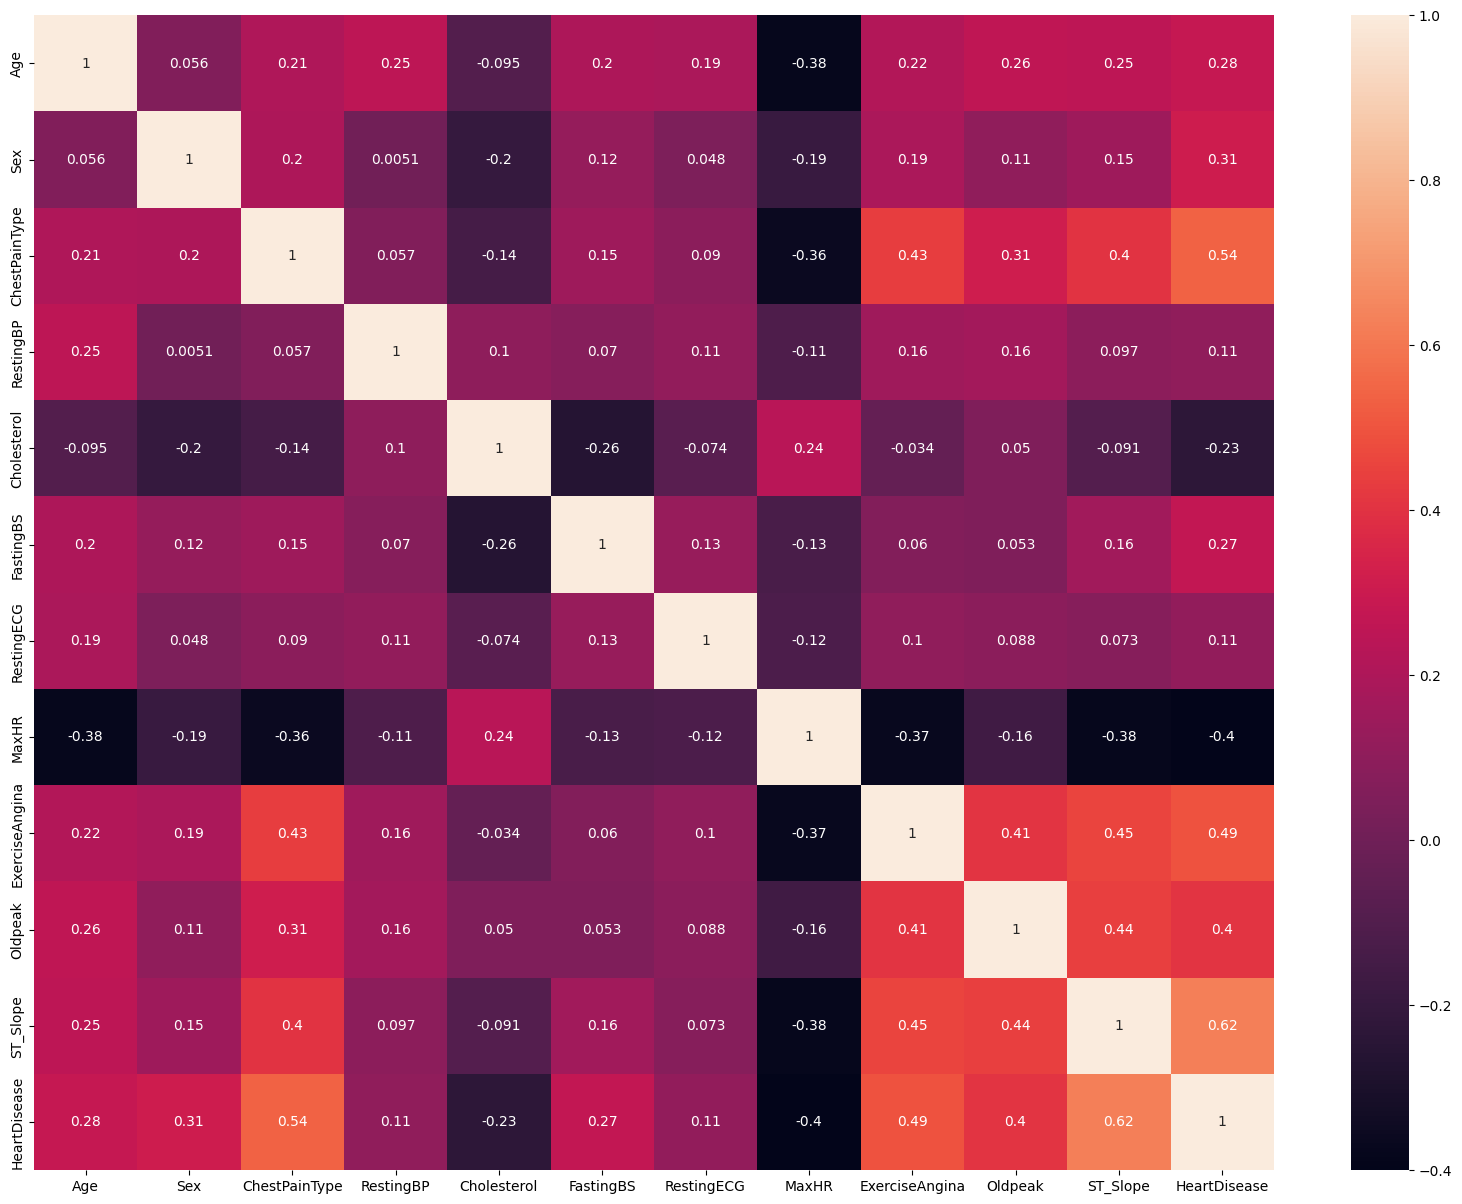

In [46]:
plt.figure(figsize=(20,15))
sns.heatmap(xy.corr(), annot=True)
plt.show()

<AxesSubplot: >

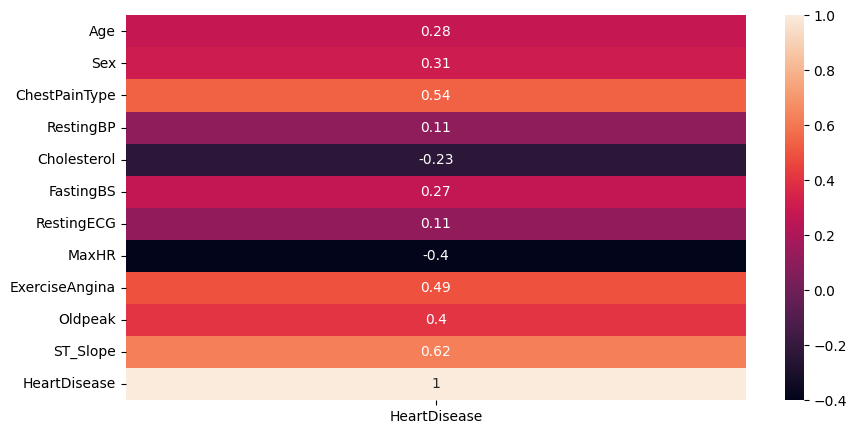

In [47]:
z="HeartDisease"
cor = xy.corr()

plt.figure(figsize=(10,5))
sns.heatmap(cor[[z]], annot=True)

In [48]:
x=df.drop(["HeartDisease","RestingECG","RestingBP"], axis=1)
y=df["HeartDisease"]

In [49]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.25, random_state=11, stratify=y)

In [50]:
train_x.reset_index(drop=True, inplace=True)
test_x.reset_index(drop=True, inplace=True)
train_y.reset_index(drop=True, inplace=True)
test_y.reset_index(drop=True, inplace=True)

In [51]:
train_cat = train_x.select_dtypes(include="object")
train_num = train_x.select_dtypes(include="number")
test_cat = test_x.select_dtypes(include="object")
test_num = test_x.select_dtypes(include="number")

In [52]:
lae = LeaveOneOutEncoder(handle_unknown="ignore")
lae.fit(train_cat, train_y)
train_cat = pd.DataFrame(lae.transform(train_cat), columns=lae.get_feature_names_out())
test_cat = pd.DataFrame(lae.transform(test_cat), columns=lae.get_feature_names_out())

In [53]:
train_x1 = pd.concat([train_num, train_cat], axis=1)
test_x1 = pd.concat([test_num, test_cat], axis=1)

In [54]:
sta = StandardScaler()
sta.fit(train_x1)
train_x1 = pd.DataFrame(sta.transform(train_x1), columns=train_x1.columns)
test_x1 = pd.DataFrame(sta.transform(test_x1), columns=test_x1.columns)

In [55]:
knn_mod = KNeighborsClassifier()
knn_mod.fit(train_x1, train_y)
pred_knn_mod = knn_mod.predict(test_x1)

print("Train score:", knn_mod.score(train_x1, train_y))
print("Test score:", knn_mod.score(test_x1, test_y))
print("")
print("Accuracy:", accuracy_score(pred_knn_mod, test_y))
print("Precision:", precision_score(pred_knn_mod, test_y))
print("Recall:", recall_score(pred_knn_mod, test_y))
print("F1 score:", f1_score(pred_knn_mod, test_y))
print("")
print("Confusion matrix:")
print(confusion_matrix(pred_knn_mod, test_y))
print("")
print(classification_report(pred_knn_mod, test_y))

Train score: 0.8793604651162791
Test score: 0.8869565217391304

Accuracy: 0.8869565217391304
Precision: 0.8346456692913385
Recall: 0.954954954954955
F1 score: 0.8907563025210083

Confusion matrix:
[[ 98  21]
 [  5 106]]

              precision    recall  f1-score   support

           0       0.95      0.82      0.88       119
           1       0.83      0.95      0.89       111

    accuracy                           0.89       230
   macro avg       0.89      0.89      0.89       230
weighted avg       0.90      0.89      0.89       230



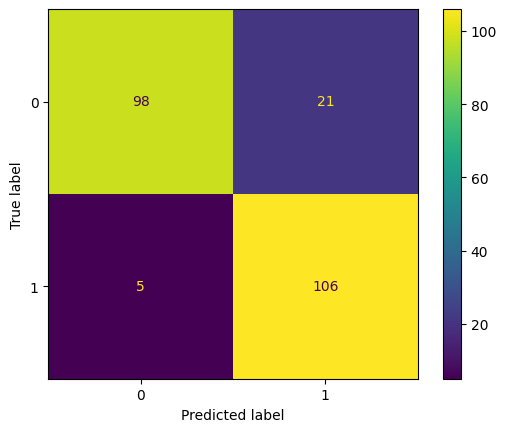

In [56]:
print(ConfusionMatrixDisplay.from_predictions(pred_knn_mod, test_y))

# Conclusion

After performing exploratory data analysis, preprocessing, and training multiple classification models,
we have successfully built and evaluated models for heart disease prediction. We selected Recall as our
evaluation metric to reduce false negatives, as it is crucial to correctly identify individuals with heart disease.
Hyperparameter tuning was performed using GridSearchCV to optimize model performance.

Among the models, the KNeighborsClassifier with feature selection achieved promising results in terms of recall.

In conclusion, our machine learning project provides a valuable tool for early detection of heart disease,
assisting healthcare professionals in making informed decisions and improving patient outcomes.